## Init

### Imports and options

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%config Application.log_level="WARN"

In [4]:
%matplotlib inline

In [6]:
import os
import sys
from glob import glob
import io
import tarfile

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [54]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (16,10) # the standard figure size

plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"]=1 

In [21]:
prefix = '/mnt/dat/ownCloud/doc/personen/jingwen/'

In [25]:
jwdat = pd.read_excel(os.path.join(prefix,"Daten.xlsx"),sheet_name="Sales")

In [28]:
jwdat[["Store"]] == "BB Store"

Store
0   False
1    True
2   False
3   False
4   False
5   False
6   False
7   False
8    True
9   False
10  False
11  False
12  False
13  False
14   True
15  False
16  False
17   True
18   True
19  False
20  False
21  False
22   True
23   True
24  False
25  False
26  False
27  False
28  False
29  False
..    ...
66  False
67  False
68  False
69  False
70  False
71  False
72  False
73  False
74  False
75  False
76  False
77  False
78  False
79  False
80  False
81  False
82  False
83  False
84  False
85  False
86  False
87  False
88  False
89  False
90   True
91  False
92  False
93  False
94  False
95  False

[96 rows x 1 columns]

In [98]:
jwdat

Month Version     Store  Channel  Product  Units  Sales  Unnamed: 7  \
0   2017-01  Actual  CC Store      NaN      NaN    NaN    NaN         NaN   
1   2017-02  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
2   2017-03  Actual  GG Store      NaN      NaN    NaN    NaN         NaN   
3   2017-04  Actual  EE Store      NaN      NaN    NaN    NaN         NaN   
4   2017-05  Actual  GG Store      NaN      NaN    NaN    NaN         NaN   
5   2017-06  Actual  EE Store      NaN      NaN    NaN    NaN         NaN   
6   2017-07  Actual  AA Store      NaN      NaN    NaN    NaN         NaN   
7   2017-08  Actual  HH Store      NaN      NaN    NaN    NaN         NaN   
8   2017-09  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
9   2017-10  Actual  EE Store      NaN      NaN    NaN    NaN         NaN   
10  2017-11  Actual  CC Store      NaN      NaN    NaN    NaN         NaN   
11  2017-12  Actual  FF Store      NaN      NaN    NaN    NaN         NaN   
12  2018-01  Actual  AA Store      NaN      NaN    NaN    NaN         NaN   
13  2018-02  Actual  GG Store      NaN      NaN    NaN    NaN         NaN   
14  2018-03  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
15  2018-04  Actual  CC Store      NaN      NaN    NaN    NaN         NaN   
16  2018-05  Actual  GG Store      NaN      NaN    NaN    NaN         NaN   
17  2018-06  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
18  2018-07  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
19  2018-08  Actual  DD Store      NaN      NaN    NaN    NaN         NaN   
20  2018-09  Actual  HH Store      NaN      NaN    NaN    NaN         NaN   
21  2018-10  Actual  DD Store      NaN      NaN    NaN    NaN         NaN   
22  2018-11  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
23  2018-12  Actual  BB Store      NaN      NaN    NaN    NaN         NaN   
24  2019-01  Actual  AA Store      NaN      NaN    NaN    NaN         NaN   
25  2019-02  Actual  HH Store      NaN      NaN    NaN    NaN         NaN   
26  2019-03  Actual  HH Store      NaN      NaN    NaN    NaN         NaN   
27  2019-04  Actual  FF Store      NaN      NaN    NaN    NaN         NaN   
28  2019-05  Actual  GG Store      NaN      NaN    NaN    NaN         NaN   
29  2019-06  Actual  GG Store      NaN      NaN    NaN    NaN         NaN   
..      ...     ...       ...      ...      ...    ...    ...         ...   
66  2018-07  Budget  EE Store      NaN      NaN    NaN    NaN         NaN   
67  2018-08  Budget  DD Store      NaN      NaN    NaN    NaN         NaN   
68  2018-09  Budget  GG Store      NaN      NaN    NaN    NaN         NaN   
69  2018-10  Budget  FF Store      NaN      NaN    NaN    NaN         NaN   
70  2018-11  Budget  AA Store      NaN      NaN    NaN    NaN         NaN   
71  2018-12  Budget  AA Store      NaN      NaN    NaN    NaN         NaN   
72  2019-01  Budget  HH Store      NaN      NaN    NaN    NaN         NaN   
73  2019-02  Budget  CC Store      NaN      NaN    NaN    NaN         NaN   
74  2019-03  Budget  FF Store      NaN      NaN    NaN    NaN         NaN   
75  2019-04  Budget  AA Store      NaN      NaN    NaN    NaN         NaN   
76  2019-05  Budget  HH Store      NaN      NaN    NaN    NaN         NaN   
77  2019-06  Budget  FF Store      NaN      NaN    NaN    NaN         NaN   
78  2019-07  Budget  CC Store      NaN      NaN    NaN    NaN         NaN   
79  2019-08  Budget  CC Store      NaN      NaN    NaN    NaN         NaN   
80  2019-09  Budget  AA Store      NaN      NaN    NaN    NaN         NaN   
81  2019-10  Budget  FF Store      NaN      NaN    NaN    NaN         NaN   
82  2019-11  Budget  DD Store      NaN      NaN    NaN    NaN         NaN   
83  2019-12  Budget  DD Store      NaN      NaN    NaN    NaN         NaN   
84  2020-01  Budget  EE Store      NaN      NaN    NaN    NaN         NaN   
85  2020-02  Budget  AA Store      NaN      NaN    NaN    NaN         NaN   
86

In [83]:
jwdat.groupby("Store").count()

Month  Version  Channel  Product  Units  Sales  Unnamed: 7  \
Store                                                                  
AA Store     14       14        0        0      0      0           0   
BB Store     12       12        0        0      0      0           0   
CC Store     12       12        0        0      0      0           0   
DD Store     13       13        0        0      0      0           0   
EE Store     12       12        0        0      0      0           0   
FF Store      9        9        0        0      0      0           0   
GG Store     14       14        0        0      0      0           0   
HH Store     10       10        0        0      0      0           0   

          Unnamed: 8  Unnamed: 9  Unnamed: 10  
Store                                          
AA Store           0           1            1  
BB Store           0           1            1  
CC Store           0           1            1  
DD Store           0           0            0  
EE Store           0           2            2  
FF Store           0           0            0  
GG Store           0           2            2  
HH Store           0           1            1

In [86]:
jwdat["Month"].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype=object)

In [89]:
jwdat["Store"].unique()

array(['CC Store', 'BB Store', 'GG Store', 'EE Store', 'AA Store',
       'HH Store', 'FF Store', 'DD Store'], dtype=object)

In [99]:
jwdat["Version"].unique()

array(['Actual', 'Budget'], dtype=object)

In [90]:
from itertools import product

In [102]:
jwproduct = pd.DataFrame(
    list(product(jwdat["Month"].unique(),jwdat["Version"].unique(),jwdat["Store"].unique())), columns=("Month","Version","Store"))

In [103]:
jwproduct.to_excel("jwproduct.xlsx","Sales")

In [31]:
prefix ='/home/jotelha/tmp/20190608_probing/sandbox'

In [36]:
forces = pd.read_csv(os.path.join(prefix,"indenter_forces.txt"),delim_whitespace=True)

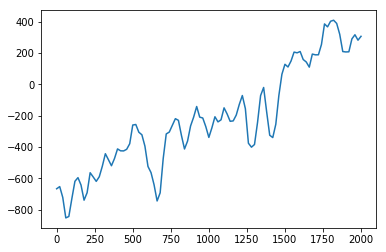

In [37]:
plt.plot(forces["forces"])

In [35]:
thermo = pd.read_csv(os.path.join(prefix,"thermo.out"),delim_whitespace=True)

In [39]:
thermo.head()

Step    TotEng     KinEng    PotEng       Temp      Press  Enthalpy  \
0     0 -18325915  372769.64 -18698684  285.04549  2482.5223 -18110635   
1    10 -18326112  374107.45 -18700219  286.06848  2443.1932 -18114243   
2    20 -18326152  376204.70 -18702357  287.67218  2327.1486 -18124346   
3    30 -18326409  378586.67 -18704996  289.49360  2216.1051 -18134233   
4    40 -18326693  379613.72 -18706306  290.27895  2181.0058 -18137560   

      E_bond    E_angle    E_dihed  E_impro    E_pair    E_vdwl     E_coul  \
0  2692.7924  24666.234  6019.4720        0 -18732063 -17322906  5527521.6   
1  2670.3303  24705.590  5986.2102        0 -18733581 -17324245  5527352.8   
2  2767.8168  24662.292  6025.1200        0 -18735812 -17327007  5527857.0   
3  2676.6742  24931.401  6001.1955        0 -18738605 -17329749  5527751.0   
4  2712.2381  24815.881  5984.4424        0 -18739819 -17330983  5527812.8   

      E_long  E_tail   Volume  
0 -6936678.3       0  5946125  
1 -6936689.7       0  5946125  
2 -6936662.4       0  5946125  
3 -6936607.2       0  5946125  
4 -6936648.4       0  5946125

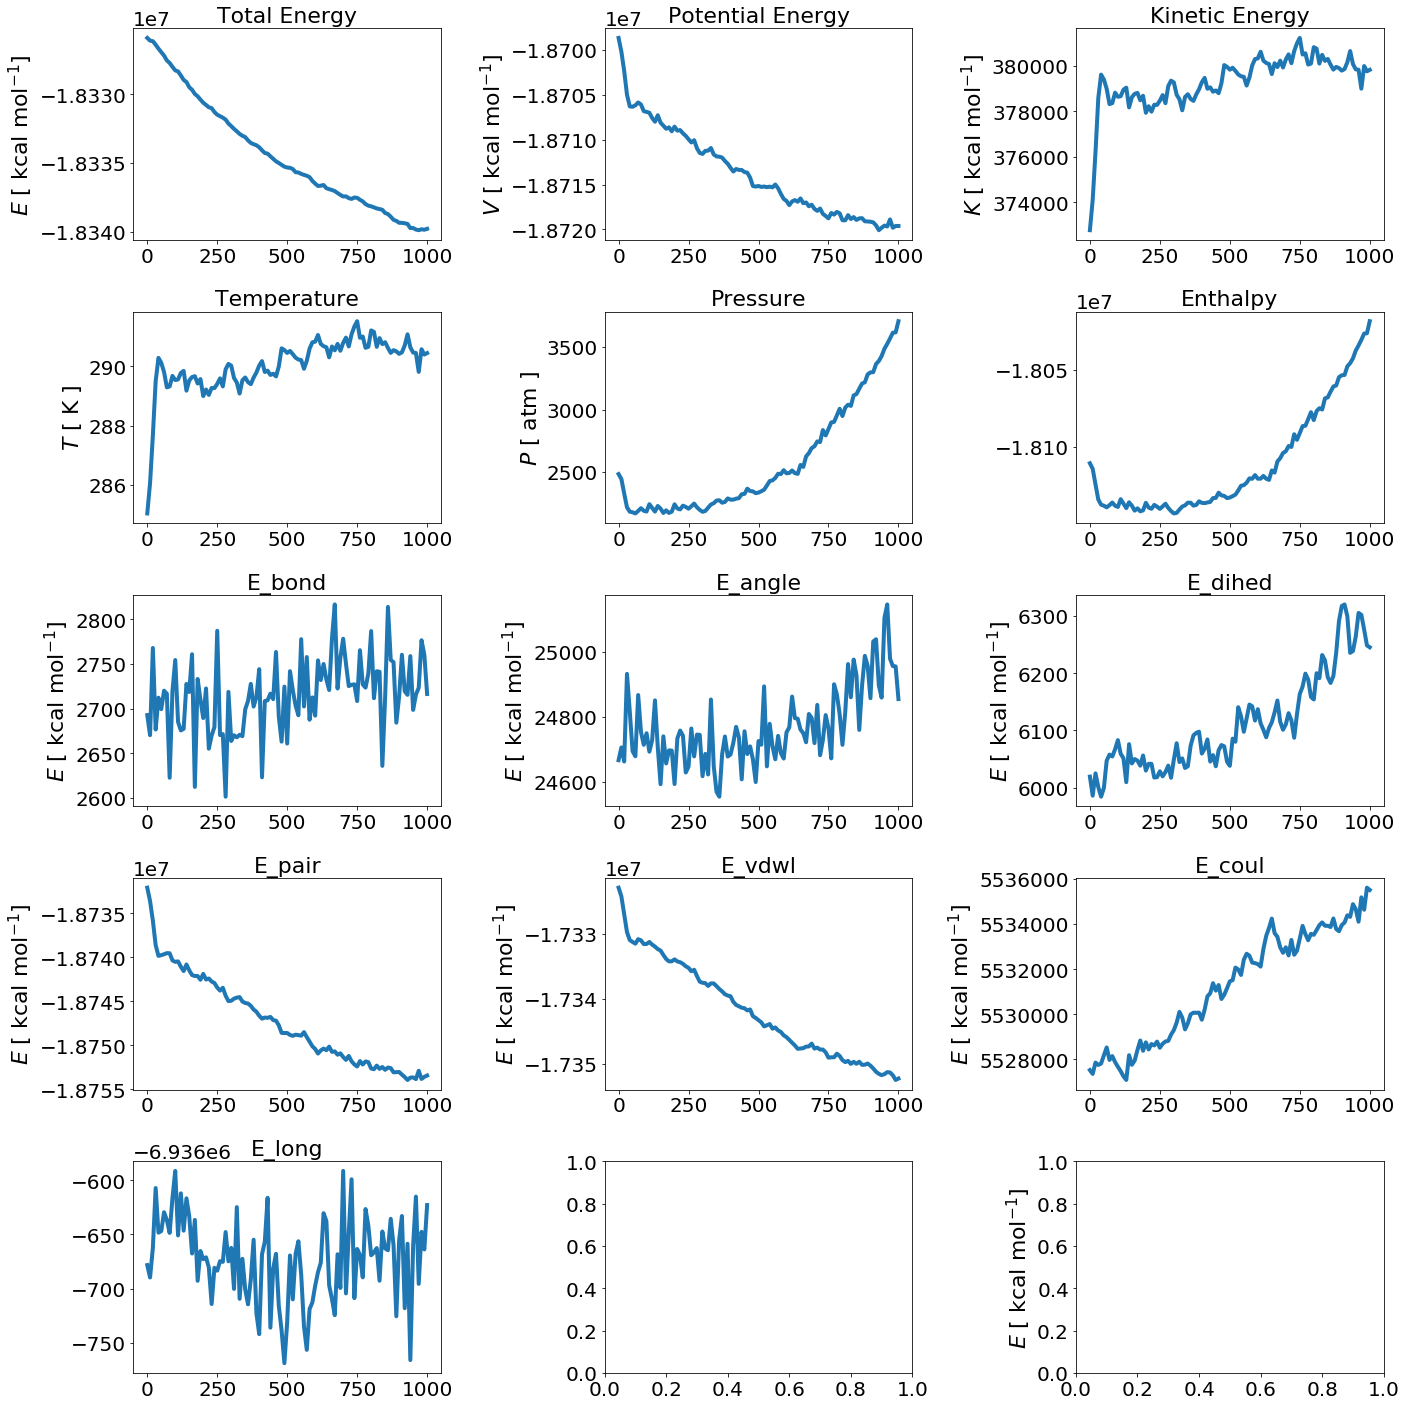

In [75]:
# Creates four polar axes, and accesses them through the returned array
#fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
fig, axes = plt.subplots(5, 3, figsize=(20,20))
axes[0, 0].plot(thermo["Step"], thermo["TotEng"])
axes[0, 1].plot(thermo["Step"], thermo["PotEng"])
axes[0, 2].plot(thermo["Step"], thermo["KinEng"])

axes[1, 0].plot(thermo["Step"], thermo["Temp"])
axes[1, 1].plot(thermo["Step"], thermo["Press"])
axes[1, 2].plot(thermo["Step"], thermo["Enthalpy"])

axes[2, 0].plot(thermo["Step"], thermo["E_bond"])
axes[2, 1].plot(thermo["Step"], thermo["E_angle"])
axes[2, 2].plot(thermo["Step"], thermo["E_dihed"])

axes[3, 0].plot(thermo["Step"], thermo["E_pair"])
axes[3, 1].plot(thermo["Step"], thermo["E_vdwl"])
axes[3, 2].plot(thermo["Step"], thermo["E_coul"])
axes[4, 0].plot(thermo["Step"], thermo["E_long"])

axes[0,0].set_title("Total Energy")
axes[0,1].set_title("Potential Energy")
axes[0,2].set_title("Kinetic Energy")

axes[1,0].set_title("Temperature")
axes[1,1].set_title("Pressure")
axes[1,2].set_title("Enthalpy")

axes[2, 0].set_title("E_bond")
axes[2, 1].set_title("E_angle")
axes[2, 2].set_title("E_dihed")

axes[3, 0].set_title("E_pair")
axes[3, 1].set_title("E_vdwl")
axes[3, 2].set_title("E_coul")
axes[4, 0].set_title("E_long")
#axes[1, 1].scatter(x, y)

axes[0,0].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[0,1].set_ylabel("$V$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[0,2].set_ylabel("$K$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")

axes[1,0].set_ylabel("$T$ [ K ]")
axes[1,1].set_ylabel("$P$ [ atm ]")
#axes[1,2].set_ylabel("$H$ [ ]")

axes[2,0].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[2,1].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[2,2].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")

axes[3,0].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[3,1].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[3,2].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")
axes[4,2].set_ylabel("$E$ [ $ \mathrm{kcal} \ \mathrm{mol}^{-1}$]")

fig.tight_layout()
#plt.plot( )

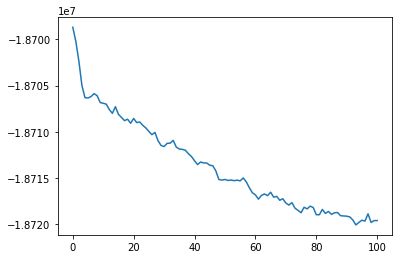

In [42]:
plt.plot( thermo["PotEng"])

In [ ]:
plt.plot(thermo[""])

In [8]:
import ase
from asap3.analysis.rdf import RadialDistributionFunction

# file formats, input - output
import ase.io
from ase.io import read
from ase.io import NetCDFTrajectory

import scipy.constants as C

ModuleNotFoundError: No module named 'ase'

In [9]:
import postprocessing

ModuleNotFoundError: No module named 'postprocessing'

In [30]:
from fireworks.utilities.filepad import FilePad 

In [31]:
fp = FilePad(
    host='localhost',
    port=27018,
    database='fireworks-jhoermann',
    username='fireworks',
    password='fireworks')

In [32]:
content, doc = fp.get_file(identifier='surfactant_on_AU_111_df_json')

In [33]:
sim_df = pd.read_json(content, orient='index')

### Poster plotting

In [34]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (16,10) # the standard figure size

plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"]=1 

### Constants and factors

### Forces

$ [F_{LMP}] = \frac{ \mathrm{kcal}}{ \mathrm{mol} \cdot \mathrm{\mathring{A}}} $

$ [F_{PLT}] = \mathrm{nN}$

$ \mathrm{kcal} = 4.184 \mathrm{kJ} = 4.184 \cdot 10^{3} \mathrm{J}$

$ J = N \cdot m$

$ N = J m^{-1} = \frac{ \mathrm{kcal}}{ 4.184 \cdot 10^3 \mathrm{m} }
    = \frac{ \mathrm{kcal}}{ 4.184 \cdot 10^{13} \mathrm{\mathring{A}} }$
    
$ [F_{PLT}] = \mathrm{nN} 
    = \frac{ 10^9 \cdot N_A^{-1}}{ 4.184 \cdot 10^{13} } 
        \frac{\mathrm{kcal}}{\mathrm{mol} \cdot \mathrm{\mathring{A}}}
    = \frac{ 10^{-4} \cdot N_A^{-1}}{ 4.184 } [F_{LMP}]
    = 0.239 \cdot 10^{-4} N_A^{-1} [F_{LMP}] $
    
    
$ \frac{\mathrm{ kcal }}{ {\mathrm{mol} \mathrm{\mathring{A}}}} = 1.66053892103219 \cdot 10^{-11} \frac{\mathrm{J}}{\mathrm{m}}$

In [35]:
C.calorie # kCal -> kJ

4.184

In [46]:
kCal_to_J = C.calorie * 1e3 # kCal -> J

In [47]:
C.angstrom

1e-10

In [48]:
kCal_per_Ang_to_J_per_m = C.calorie * 1e3 / C.angstrom # kCal / Ang -> J / m

In [49]:
kCal_per_Ang_to_nN =C.calorie * 1e3 / C.angstrom *1e9 # kCal / Ang -> n J / m = n N

In [51]:
kCal_per_Ang_to_nN

4.184e+22

In [40]:
1/(C.calorie * 1e3 / C.angstrom *1e9) # kCal / Ang -> n J / m = n N

2.3900573613766728e-23

In [41]:
4.184e13 / C.Avogadro*1e9

0.06947695345147255

In [42]:
(C.calorie * 1e3 / C.angstrom *1e9)/ C.Avogadro

0.06947695345147255

In [43]:
force_conversion_factor = C.calorie * 1e3 / C.angstrom *1e9 / C.Avogadro# kCal / (mol * Ang ) -> n N

In [53]:
force_conversion_factor

0.06947695345147255

In [44]:
1/force_conversion_factor

14.393262086520076

In [68]:
C.eV # in J (SI units)

1.6021766208e-19

In [71]:
eV_to_kCal_per_mol = (C.eV*C.Avogadro)/(C.kilo*C.calorie)

In [72]:
eV_to_kCal_per_mol

23.060548012069496

In [73]:
eV_to_kCal_per_mol

23.060548012069496

In [79]:
gamma_metal_to_gamma_real = eV_to_kCal_per_mol * C.pico / C.femto

In [81]:
gamma_metal_to_gamma_real * 0.02

461.21096024138984

In [74]:
(C.kilo*C.calorie)/C.k

3.0304599174886308e+26

In [45]:
eV_to_kcal_per_mol = C.eV

1.6021766208e-19

### Constant velocity force-distance curves

In [20]:
def constant_velocity_force_distance_curve_from_thermo_ave(
    thermo_ave_out_file = None,
    thermo_out_file = None,
    initial_distance = 7.5, # nm
    total_steps = 375000,
    averaging_steps = 1000,
    dt = 2*1e-6, # ns,
    force_label         = r'$F \ [ \mathrm{nN} ]$',
    distance_label      = r'$d \ [ \mathrm{nm} ]$',
    window = 1,
    legend_prefix = None,
    interval = slice(None) ):

    # assume LAMMPS "real" units:
    # [ force ] = Kcal/mole-Angstrom
    # conversion factor to nN (nano-Newton):
    force_conversion_factor = C.calorie * 1e3 / C.angstrom *1e9 / C.Avogadro# kCal / (mol * Ang ) -> n N
    total_time = total_steps*dt
    velocity_SI = initial_distance / total_time
    
    averaging_time = averaging_steps * dt * 1e3 # ps
    
    production_thermo_pd = None
    production_thermo_ave_pd = None
    
    if thermo_out_file:
        production_thermo_pd = pd.read_csv(thermo_out_file,delim_whitespace=True)

        production_thermo_pd["distance"] = \
            initial_distance - production_thermo_pd["Step"] * velocity_SI * dt

        production_thermo_pd.set_index('distance',inplace=True)

        production_thermo_pd["indenter_non_indenter_interaction[3]"] = \
            production_thermo_pd["c_indenter_substrate_interaction[3]"] + \
            production_thermo_pd["c_indenter_surfactant_interaction[3]"] + \
            production_thermo_pd["c_indenter_solvent_interaction[3]"] + \
            production_thermo_pd["c_indenter_ion_interaction[3]"]
        plt.plot(
        force_conversion_factor*production_thermo_pd["indenter_non_indenter_interaction[3]"],
        label = "instantaneous force")
            
    if thermo_ave_out_file:
        header = pd.read_csv(thermo_ave_out_file,delim_whitespace=True,nrows=0,skiprows=1)
        columns = header.columns[1:]
        production_thermo_ave_pd = pd.read_csv( thermo_ave_out_file, delim_whitespace=True, header=None, comment='#',
            names=columns)
        production_thermo_ave_pd["distance"] = \
            initial_distance - production_thermo_ave_pd["TimeStep"] * velocity_SI * dt

        production_thermo_ave_pd.set_index('distance',inplace=True)

        production_thermo_ave_pd["indenter_non_indenter_interaction[3]"] = \
            production_thermo_ave_pd["c_indenter_substrate_interaction[3]"] + \
            production_thermo_ave_pd["c_indenter_surfactant_interaction[3]"] + \
            production_thermo_ave_pd["c_indenter_solvent_interaction[3]"] + \
            production_thermo_ave_pd["c_indenter_ion_interaction[3]"]
        plt.plot(
        force_conversion_factor*production_thermo_ave_pd["indenter_non_indenter_interaction[3]"],
        label = "{:.1f} ps average".format(averaging_time))    
   
    plt.xlabel(distance_label)
    plt.ylabel(force_label)
    plt.legend()
    return production_thermo_pd, production_thermo_ave_pd

In [45]:
def constant_velocity_force_distance_data_from_force_file(
    force_file,
    initial_distance = 7.5, # nm
    total_steps = 375000,
    averaging_steps = 1000,
    dt = 2*1e-6, # ns,
    force_label         = r'$F \ [ \mathrm{nN} ]$',
    distance_label      = r'$d \ [ \mathrm{nm} ]$',
    window = 1,
    legend_prefix = None,
    interval = slice(None) ):

    # assume LAMMPS "real" units:
    # [ force ] = Kcal/mole-Angstrom
    # conversion factor to nN (nano-Newton):
    force_conversion_factor = C.calorie * 1e3 / C.angstrom *1e9 / C.Avogadro# kCal / (mol * Ang ) -> n N
    total_time = total_steps*dt
    velocity_SI = initial_distance / total_time
    
    averaging_time = averaging_steps * dt * 1e3 # ps
    
    indenter_forces_df = pd.read_csv(force_file,index_col=0, delim_whitespace=True) 

    indenter_forces_df["distance"] = \
        initial_distance - indenter_forces_df.index * velocity_SI * dt

    indenter_forces_df.set_index('distance',inplace=True)


    return indenter_forces_df 

In [21]:
def constant_velocity_force_distance_curve_from_force_file(
    force_file,
    initial_distance = 7.5, # nm
    total_steps = 375000,
    averaging_steps = 1000,
    dt = 2*1e-6, # ns,
    force_label         = r'$F \ [ \mathrm{nN} ]$',
    distance_label      = r'$d \ [ \mathrm{nm} ]$',
    window = 1,
    legend_prefix = None,
    interval = slice(None) ):

    # assume LAMMPS "real" units:
    # [ force ] = Kcal/mole-Angstrom
    # conversion factor to nN (nano-Newton):
    force_conversion_factor = C.calorie * 1e3 / C.angstrom *1e9 / C.Avogadro# kCal / (mol * Ang ) -> n N
    total_time = total_steps*dt
    velocity_SI = initial_distance / total_time
    
    averaging_time = averaging_steps * dt * 1e3 # ps
    
    indenter_forces_df = pd.read_csv(force_file,index_col=0, delim_whitespace=True) 

    indenter_forces_df["distance"] = \
        initial_distance - indenter_forces_df.index * velocity_SI * dt

    indenter_forces_df.set_index('distance',inplace=True)


    plt.plot(
        force_conversion_factor*indenter_forces_df["f_storeUnconstrainedForces"],
        label = "instantaneous force")

    plt.plot(
        force_conversion_factor*indenter_forces_df["f_storeUnconstrainedForcesAve"],
        label = "{:.1f} ps average".format(averaging_time))    
   
    plt.xlabel(distance_label)
    plt.ylabel(force_label)
    plt.legend()
    return indenter_forces_df 

In [22]:
averaging_time = 2.0
force_label         = r'$F \ [ \mathrm{nN} ]$'
distance_label      = r'$d \ [ \mathrm{nm} ]$'

In [23]:
query = {
    'identifier': { '$regex': '.*indenter_forces\.txt$'},
    'metadata.surfactant':     'SDS',
    'metadata.sf_nmolecules':  646,
    'metadata.sf_preassembly': 'hemicylinders',
    'metadata.indenter_dist':  7.5}

In [26]:
files = fp.get_file_by_query(query)

In [27]:
len(files)

3

In [28]:
files[1][1]

{'_id': ObjectId('5c8eaa752512e1ba87dcfd33'),
 'compressed': True,
 'gfs_id': '5c8eaa742512e1ba87dcfd31',
 'identifier': 'AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/3750000/indenter_forces.txt',
 'metadata': {'ci_preassembly': 'at polar heads',
  'counterion': 'NA',
  'indenter': 'AU',
  'indenter_dist': 7.5,
  'indenter_pdb': '50Ang_stepped',
  'pressure': 1,
  'sb_crystal_plane': 111,
  'sb_multiples': [51, 30, 2],
  'sb_name': 'AU_111_51x30x2',
  'sf_nmolecules': 646,
  'sf_preassembly': 'hemicylinders',
  'solvent': 'H2O',
  'substrate': 'AU',
  'surfactant': 'SDS',
  'sv_density': 997,
  'sv_preassembly': 'random',
  'system_name': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_75Ang_dist',
  'temperature': 298},
 'original_file_name': 'indenter_forces.txt',
 'original_file_path': '/work/ws/nemo/fr_jh1130-fw_ws_20190225-0/launchpad/launcher_2019-03-17-20-13-32-584248/indenter_forces.txt'}

In [29]:
# correction for missing entry
files[1][1]['metadata']['total_steps'] = 3750000

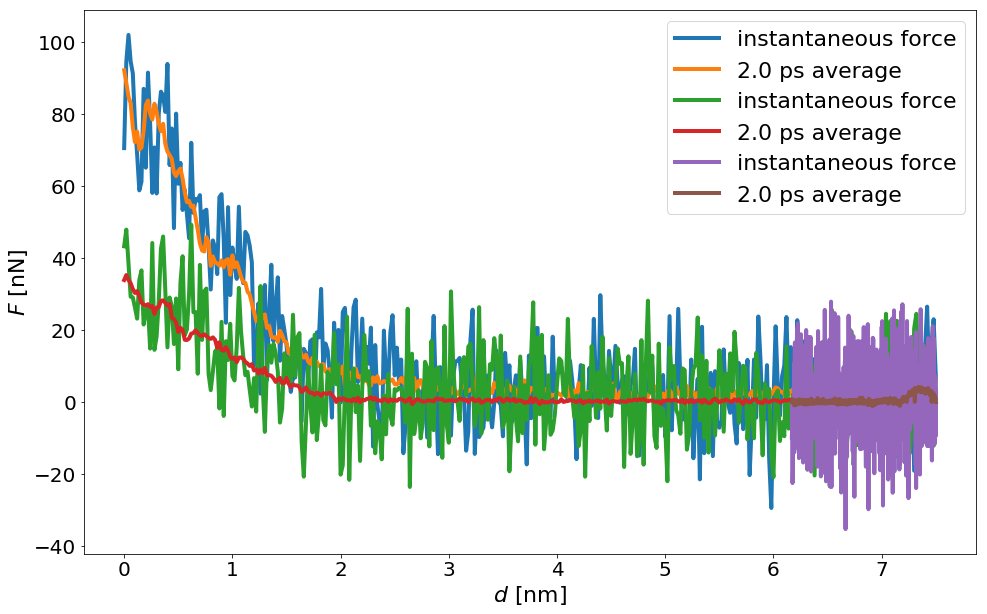

In [30]:
# force distanc) in files
plotData = []
for (cont,doc) in files:
    contStream = io.StringIO(cont.decode())
    plotData.append(
        constant_velocity_force_distance_curve_from_force_file(
            force_file = contStream,
            initial_distance = doc['metadata']['indenter_dist'], # nm
            total_steps = doc['metadata']['total_steps'],
            averaging_steps = 1000 ) )

## monolayer

In [140]:
query = {
    'identifier': { '$regex': '.*indenter_forces\.txt$'},
    'metadata.surfactant':     'SDS',
    'metadata.sf_nmolecules':  646,
    'metadata.sf_preassembly': 'monolayer'}
files = fp.get_file_by_query(query)

In [141]:
len(files)

3

In [142]:
for f in files:
    print(f[1]['identifier'],':', 'total_steps' in f[1]['metadata'])

AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/75Ang/3750000/indenter_forces.txt : False
AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/75Ang/37500000/indenter_forces.txt : True


In [144]:
files[1][1]['metadata']['total_steps'] = 15000000

In [146]:
for f in files:
    print(f[1]['identifier'],':', 'total_steps' in f[1]['metadata'])

AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/75Ang/3750000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/75Ang/37500000/indenter_forces.txt : True


In [147]:
# force distanc) in files
plotData = []
for (cont,doc) in files:
    contStream = io.StringIO(cont.decode())
    plotData.append(
        constant_velocity_force_distance_data_from_force_file(
            force_file = contStream,
            initial_distance = doc['metadata']['indenter_dist'], # nm
            total_steps = doc['metadata']['total_steps'],
            averaging_steps = 1000 ) )

In [148]:
plotData = []
(cont,doc) = files[0]
contStream = io.StringIO(cont.decode())
plotData.append(
    constant_velocity_force_distance_data_from_force_file(
        force_file = contStream,
        initial_distance = 3.0, # nm
        total_steps = 15000000,
        averaging_steps = 1000 ) )

In [149]:
(cont,doc) = files[1]
contStream = io.StringIO(cont.decode())
plotData.append(
    constant_velocity_force_distance_data_from_force_file(
        force_file = contStream,
        initial_distance = 7.5, # nm
        total_steps = 15000000,
        averaging_steps = 1000 ) )

In [150]:
(cont,doc) = files[2]
contStream = io.StringIO(cont.decode())
plotData.append(
    constant_velocity_force_distance_data_from_force_file(
        force_file = contStream,
        initial_distance = 7.5, # nm
        total_steps = 75000000,
        averaging_steps = 1000 ) )

In [151]:
plotData[0]

forces  f_storeAnteSHAKEForces  f_storeAnteStatForces  \
distance                                                             
3.000    -102.36600              -102.36600             -102.36600   
2.998    -121.68000              -121.68000             -121.68000   
2.996    -281.90900              -281.90900             -281.90900   
2.994      25.62190                25.62190               25.62190   
2.992     -26.87730               -26.87730              -26.87730   
2.990      58.41750                58.41750               58.41750   
2.988     192.55200               192.55200              192.55200   
2.986    -231.49300              -231.49300             -231.49300   
2.984      29.84490                29.84490               29.84490   
2.982    -108.03800              -108.03800             -108.03800   
2.980     -82.84910               -82.84910              -82.84910   
2.978      95.18630                95.18630               95.18630   
2.976      22.83250                22.83250               22.83250   
2.974      91.58260                91.58260               91.58260   
2.972     -32.85600               -32.85600              -32.85600   
2.970     123.20300               123.20300              123.20300   
2.968     206.22600               206.22600              206.22600   
2.966      12.44010                12.44010               12.44010   
2.964     215.66700               215.66700              215.66700   
2.962     -11.82200               -11.82200              -11.82200   
2.960       5.07755                 5.07755                5.07755   
2.958      57.13110                57.13110               57.13110   
2.956     -53.26590               -53.26590              -53.26590   
2.954     126.94900               126.94900              126.94900   
2.952      85.87120                85.87120               85.87120   
2.950     254.04000               254.04000              254.04000   
2.948     -40.11530               -40.11530              -40.11530   
2.946       6.63789                 6.63789                6.63789   
2.944    -124.59400              -124.59400             -124.59400   
2.942    -138.81900              -138.81900             -138.81900   
...             ...                     ...                    ...   
0.058     642.88400               642.88400              642.88400   
0.056      44.19260                44.19260               44.19260   
0.054     633.98500               633.98500              633.98500   
0.052     602.50000               602.50000              602.50000   
0.050     623.67000               623.67000              623.67000   
0.048      48.64050                48.64050               48.64050   
0.046     472.74200               472.74200              472.74200   
0.044     401.62800               401.62800              401.62800   
0.042     225.23300               225.23300              225.23300   
0.040     654.93400               654.93400              654.93400   
0.038     434.61300               434.61300              434.61300   
0.036     518.87900               518.87900              518.87900   
0.034     387.08600               387.08600              387.08600   
0.032     905.60500               905.60500              905.60500   
0.030     522.85600               522.85600              522.85600   
0.028     377.03000               377.03000              377.03000   
0.026     786.33800               786.33800              786.33800   
0.024     372.88200               372.88200              372.88200   
0.022     238.93200               238.93200              238.93200   
0.020     426.89300               426.89300              426.89300   
0.018     573.10600               573.10600              573.10600   
0.016     400.01800               400.01800              400.01800   
0.014     647.43600               647.43600              647.43600   
0.012     582.08600               582.08600              582.08600   
0.010     709.61300    

In [152]:
labels =  [ 
    r'$1 \mathrm{\ m \ s^{-1}}$',        
    r'$0.1 \mathrm{\ m \ s^{-1}}$']   

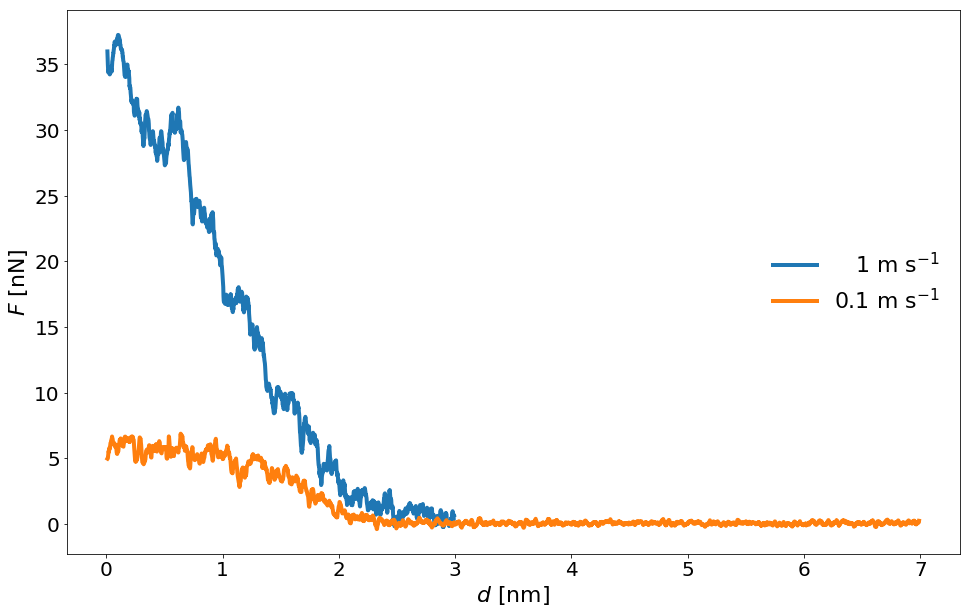

In [153]:
figure = plt.figure()
windows = np.array([10,10]) # do average on the same scale, i.e. 2ps
for (dat,lab,win) in zip([plotData[0],plotData[2]],labels,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
                (0.0 < dat.index) & (dat.index < 7.0)].rolling(window=win,center=True).mean(),
        label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='center right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

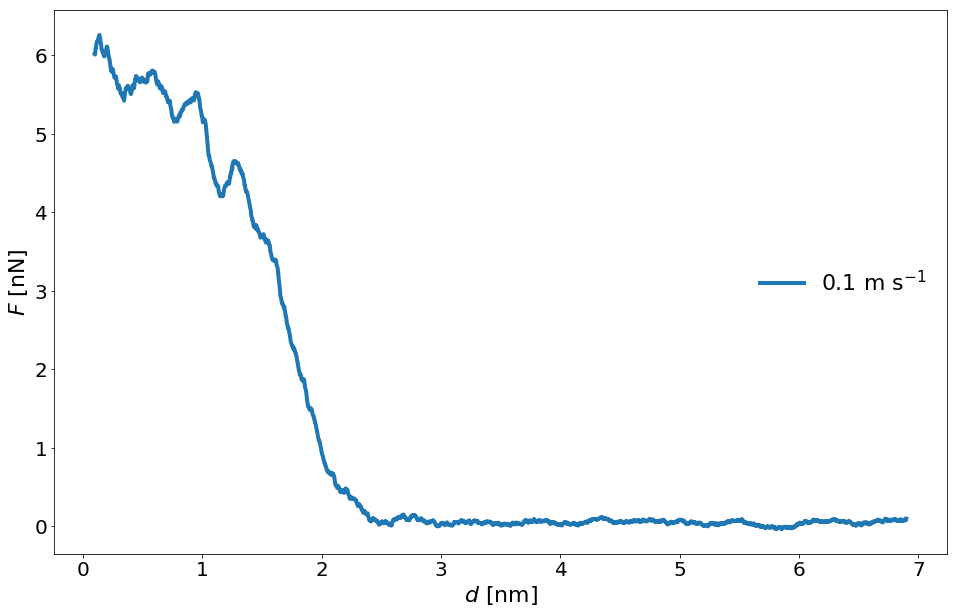

In [157]:
figure = plt.figure()
(dat,lab,win) = (plotData[2],labels[1],100)
plt.plot(
    force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
            (0.0 < dat.index) & (dat.index < 7.0)].rolling(window=win,center=True).mean(),
    label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='center right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

## monolayer & hemicylinders

In [159]:
query = {
    'identifier': { '$regex': '.*indenter_forces\.txt$'},
    'metadata.surfactant':     'SDS',
    'metadata.sf_nmolecules':  646,
    'metadata.sf_preassembly': 'hemicylinders'}
files = fp.get_file_by_query(query)

In [160]:
len(files)

4

In [161]:
for f in files:
    print(f[1]['identifier'],':', 'total_steps' in f[1]['metadata'])

AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/30Ang/1500000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/375000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/3750000/indenter_forces.txt : False
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/37500000/indenter_forces.txt : True


In [162]:
files[2][1]['metadata']['total_steps'] = 3750000

In [163]:
for f in files:
    print(f[1]['identifier'],':', 'total_steps' in f[1]['metadata'])

AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/30Ang/1500000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/375000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/3750000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/37500000/indenter_forces.txt : True


In [164]:
# force distanc) in files
# plotData = []
for (cont,doc) in files:
    contStream = io.StringIO(cont.decode())
    plotData.append(
        constant_velocity_force_distance_data_from_force_file(
            force_file = contStream,
            initial_distance = doc['metadata']['indenter_dist'], # nm
            total_steps = doc['metadata']['total_steps'],
            averaging_steps = 1000 ) )

In [177]:
plotDict = {
    'hemicylinders, 10 m/s': plotData[4],
    'monolayer, 1 m/s': plotData[0],
    'hemicylinders, 1 m/s': plotData[5],
    'monolayer, 0.1 m/s': plotData[2] }
    #'hemicylinders, 0.1 m/s': plotData[6] }

In [181]:
windows = np.array([1,10,1,10]) # do average on the same scale, i.e. 2ps

In [182]:
labels =  [ 
    r'hemicylinders, $10 \mathrm{\ m \ s^{-1}}$',        
    r'monolayer, $1 \mathrm{\ m \ s^{-1}}$',        
    r'hemicylinders, $1 \mathrm{\ m \ s^{-1}}$',        
    r'monolayer, $0.1 \mathrm{\ m \ s^{-1}}$',]   

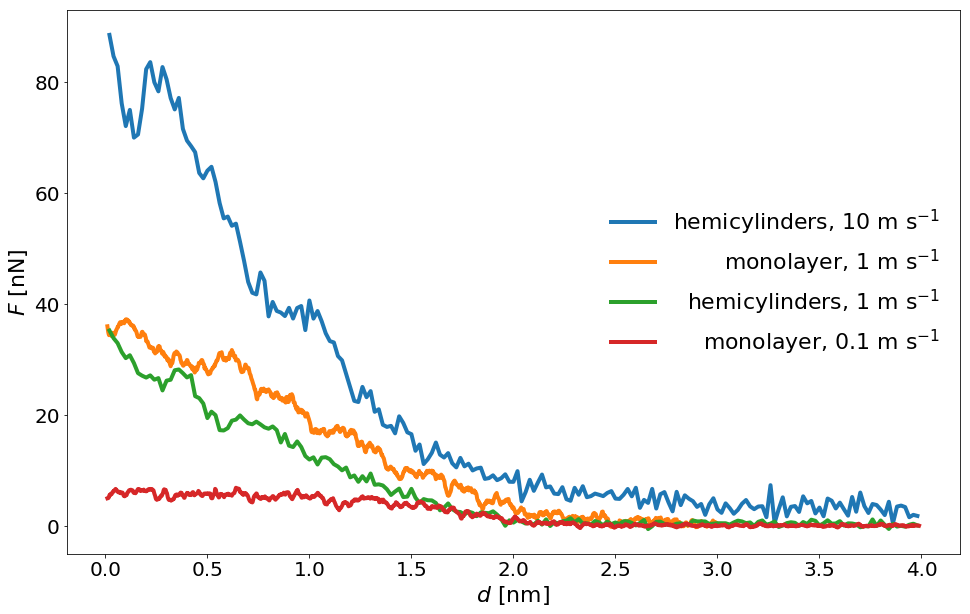

In [183]:
figure = plt.figure()
for (dat,lab,win) in zip(plotDict.values(),labels,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
                (0.0 < dat.index) & (dat.index < 4.0)].rolling(window=win,center=True).mean(),
        label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='center right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

In [187]:
plotDict = {
    'monolayer, 1 m/s': plotData[0],
    'hemicylinders, 1 m/s': plotData[5],
    'monolayer, 0.1 m/s': plotData[2] }
    #'hemicylinders, 0.1 m/s': plotData[6] }

In [194]:
windows = np.array([100,10,100]) # do average on the same scale, i.e. 2ps

In [195]:
labels =  [ 
    r'monolayer, $1 \mathrm{\ m \ s^{-1}}$',        
    r'hemicylinders, $1 \mathrm{\ m \ s^{-1}}$',        
    r'monolayer, $0.1 \mathrm{\ m \ s^{-1}}$',]   

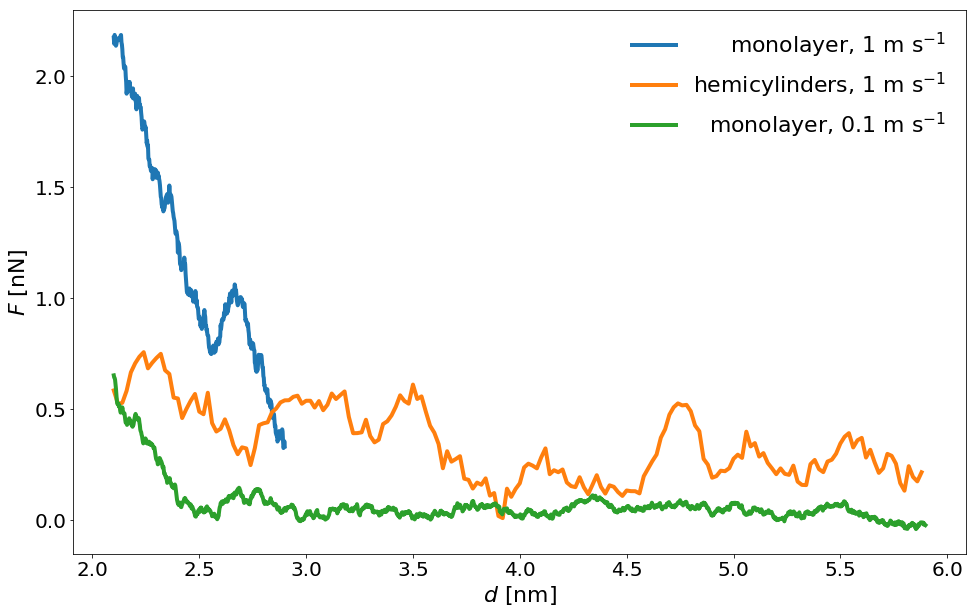

In [197]:
figure = plt.figure()
for (dat,lab,win) in zip(plotDict.values(),labels,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
                (2.0 < dat.index) & (dat.index < 6.0)].rolling(window=win,center=True).mean(),
        label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='upper right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

## 3 nm dist

In [24]:
query = {
    'identifier': { '$regex': '.*indenter_forces\.txt$'},
    'metadata.surfactant':     'SDS',
    'metadata.sf_nmolecules':  646}
files = fp.get_file_by_query(query)

In [119]:
len(files)

6

In [147]:
files[5][1]

{'_id': ObjectId('5c8f9d842512e1ffbc97927f'),
 'compressed': True,
 'gfs_id': '5c8f9d842512e1ffbc97927d',
 'identifier': 'AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt',
 'metadata': {'ci_preassembly': 'at polar heads',
  'counterion': 'NA',
  'indenter': 'AU',
  'indenter_dist': 3,
  'indenter_dist_unit': 'nm',
  'indenter_pdb': '50Ang_stepped',
  'indenter_vel': 1,
  'indenter_vel_unit': 'm / s',
  'pressure': 1,
  'pressure_unit': 'atm',
  'sb_crystal_plane': 111,
  'sb_multiples': [51, 30, 2],
  'sb_name': 'AU_111_51x30x2',
  'sf_nmolecules': 646,
  'sf_preassembly': 'monolayer',
  'solvent': 'H2O',
  'substrate': 'AU',
  'surfactant': 'SDS',
  'sv_density': 997,
  'sv_density_unit': 'kg / m**3',
  'sv_preassembly': 'random',
  'system_name': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped_30Ang_dist_1500000',
  'temperature': 298,
  'temperature_unit': 'K',
  'total_steps': 15000000},
 'original_file_name': 'indenter_forces

In [122]:
for f in files:
    print(f[1]['identifier'],':', 'total_steps' in f[1]['metadata'])

AFM/SDS/646/AU/111/52x30x2/bilayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt : False
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/30Ang/1500000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/375000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/3750000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/37500000/indenter_forces.txt : True
AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt : True


In [121]:
files[3][1]['metadata']['total_steps'] = 3750000

In [123]:
# wrong step size in input files
files[0][1]['metadata']['total_steps'] = 15000000
# files[4][1]['metadata']['total_steps'] = 15000000
files[5][1]['metadata']['total_steps'] = 15000000

In [124]:
for f in files:
    print(f[1]['identifier'],':', f[1]['metadata']['total_steps'])

AFM/SDS/646/AU/111/52x30x2/bilayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt : 15000000
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/30Ang/1500000/indenter_forces.txt : 1500000
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/375000/indenter_forces.txt : 375000
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/3750000/indenter_forces.txt : 3750000
AFM/SDS/646/AU/111/52x30x2/hemicylinders/50Ang/stepped/75Ang/37500000/indenter_forces.txt : 37500000
AFM/SDS/646/AU/111/52x30x2/monolayer/50Ang/stepped/30Ang/1500000/indenter_forces.txt : 15000000


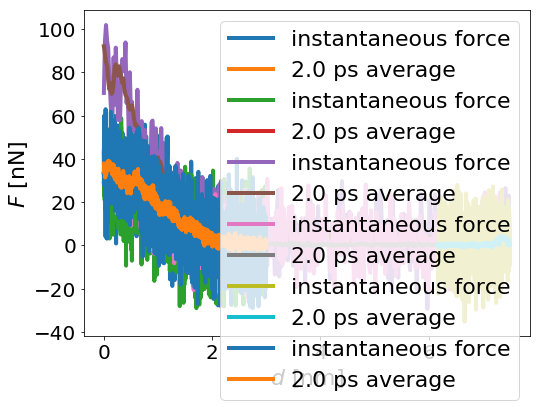

In [125]:
# force distanc) in files
plotData = []
for (cont,doc) in files:
    contStream = io.StringIO(cont.decode())
    plotData.append(
        constant_velocity_force_distance_curve_from_force_file(
            force_file = contStream,
            initial_distance = doc['metadata']['indenter_dist'], # nm
            total_steps = doc['metadata']['total_steps'],
            averaging_steps = 1000 ) )

In [126]:
files_hemicylinders = files[1:5]

In [127]:
files_1m_per_s = [ files[5], files[0], files[1] ] 

In [128]:
plotData_hemicylinders = plotData[2:5]

In [129]:
plotData_hemicylinders_1m_per_s = [ plotData[1], plotData[3] ]

In [130]:
plotData_1m_per_s = [ plotData[5], plotData[0], plotData[1] ] 

In [131]:
labels =  [ 
    r'$1 \mathrm{\ m \ s^{-1}}$, bilayer',
    r'$10 \mathrm{\ m \ s^{-1}}$, hemicylinder',    
    r'$1 \mathrm{\ m \ s^{-1}}$, hemicylinder',
    r'$0.1 \mathrm{\ m \ s^{-1}}$, hemicylinder',
    r'$1 \mathrm{\ m \ s^{-1}}$, bilayer']   

In [133]:
labels_hemicylinders =  [ 
    r'$10 \mathrm{\ m \ s^{-1}}$',
    r'$1 \mathrm{\ m \ s^{-1}}$',    
    #r'$1 \mathrm{\ m \ s^{-1}}$',
    r'$0.1 \mathrm{\ m \ s^{-1}}$']   

In [134]:
labels_hemicylinders_1m_per_s =  [ 
    r'$3.0 \mathrm{\ nm}$',
    r'$7.5 \mathrm{\ nm}$']   

In [135]:
labels_1m_per_s = [ 
    'monolayer',    
    'bilayer',
    'hemicylinder' ]

In [136]:
plt.rcParams["figure.figsize"] = (8,6) # the standard figure size

## hemicylindrical systems

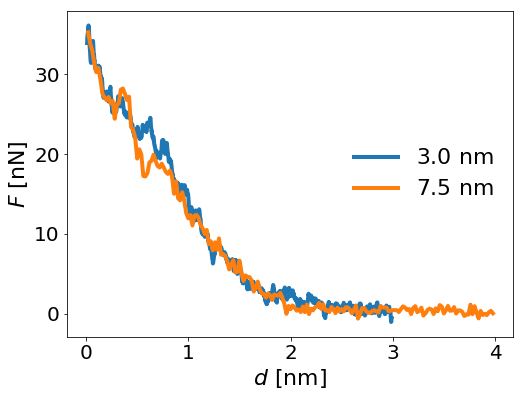

In [137]:
figure = plt.figure()
windows = np.array([10,1]) # do average on the same scale, i.e. 2ps
for (dat,lab,win) in zip(plotData_hemicylinders_1m_per_s,labels_hemicylinders_1m_per_s,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
                (0.0 < dat.index) & (dat.index < 4.0)].rolling(window=win,center=True).mean(),
        label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='center right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

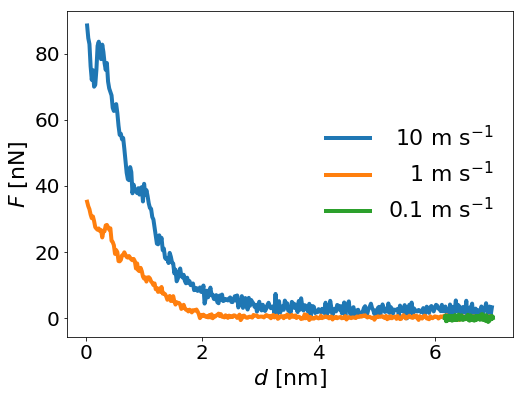

In [141]:
figure = plt.figure()
windows = np.array([1,1,1,1]) # do average on the same scale, i.e. 2ps
for (dat,lab,win) in zip(plotData_hemicylinders,labels_hemicylinders,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
                (0.0 < dat.index) & (dat.index < 7.0)].rolling(window=win,center=True).mean(),
        label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='center right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

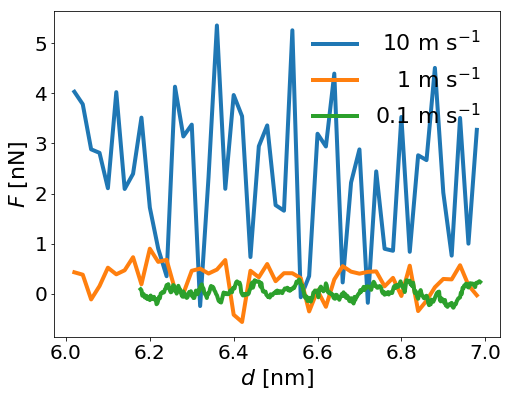

In [155]:
figure = plt.figure()
windows = np.array([1,1,10,1]) # do average on the same scale, i.e. 2ps
for (dat,lab,win) in zip(plotData_hemicylinders,labels_hemicylinders,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"][
                (6.0 < dat.index) & (dat.index < 7.0)].rolling(window=win,center=True).mean(),
        label = lab) 
plt.xlabel(distance_label)
plt.ylabel(force_label)
#plt.legend(frameon=False,ncol=2)
#plt.tight_layout(pad=1)
legend = plt.legend(frameon=False,loc='upper right')
renderer = figure.canvas.get_renderer()
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

In [104]:
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right

shift = max([t.get_window_extent().width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

In [105]:
legend.get_texts()[0].get_window_extent().width

77.57414731445311

In [106]:
# get the width of your widest label, since every label will need 
# to shift by this amount after we align to the right
shift = max([t.get_window_extent().width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift,0))

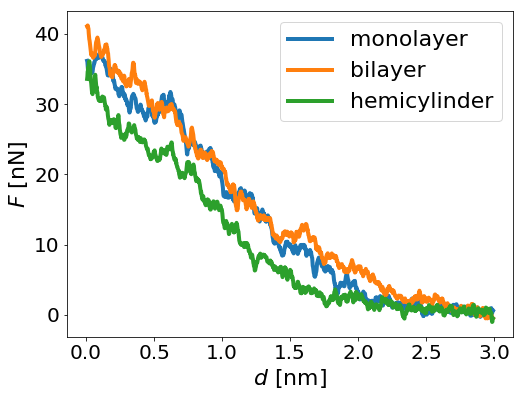

In [107]:
windows = np.array([10,10,10,]) # do average on the same scale, i.e. 2ps
for (dat,lab,win) in zip(plotData_1m_per_s,labels_1m_per_s,windows):
    plt.plot(
        force_conversion_factor*dat["f_storeUnconstrainedForcesAve"].rolling(window=win,center=True).mean(),
        label = lab) 

plt.xlabel(distance_label)
plt.ylabel(force_label)
plt.legend()

In [110]:
# force distanc
indenter_forces_10_m_per_s = constant_velocity_force_distance_curve_from_force_file(
    force_file = './sandbox/10_m_per_s/indenter_z_forces.txt',
    initial_distance = 7.5, # nm
    total_steps = 375000,
    averaging_steps = 1000 )

FileNotFoundError: File b'./sandbox/10_m_per_s/indenter_z_forces.txt' does not exist

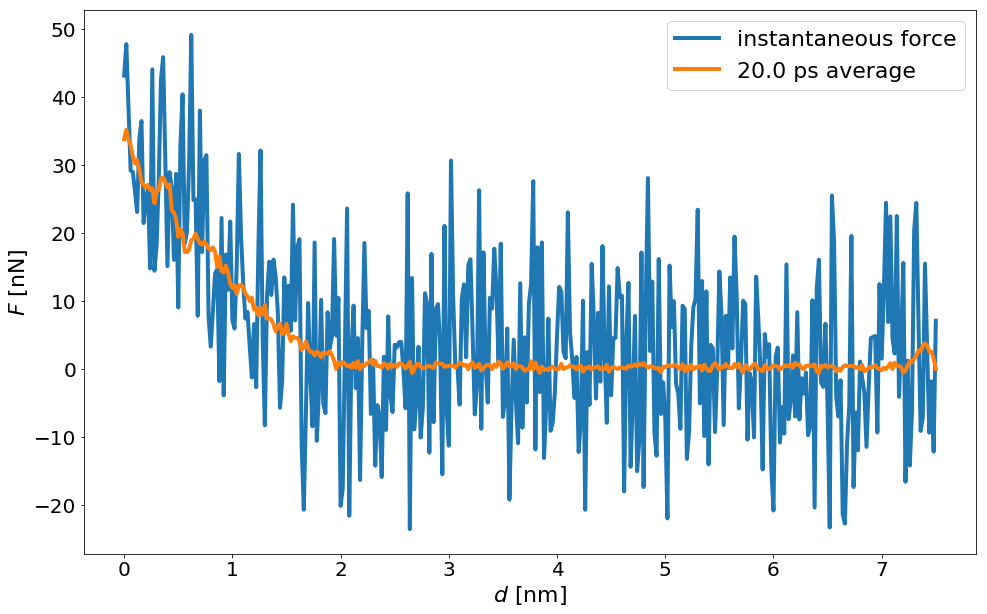

In [32]:
# force distanc
indenter_forces_1_m_per_s = constant_velocity_force_distance_curve_from_force_file(
    force_file = './sandbox/1_m_per_s/indenter_z_forces.txt',
    initial_distance = 7.5, # nm
    total_steps = 3750000,
    averaging_steps = 10000 )

In [33]:
indenter_forces_1_m_per_s.head()

forces  f_storeAnteSHAKEForces  f_storeAnteStatForces  \
distance                                                            
7.50      102.2570                102.2570               102.2570   
7.48     -174.9440               -174.9440              -174.9440   
7.46      -26.2528                -26.2528               -26.2528   
7.44     -134.9060               -134.9060              -134.9060   
7.42       45.3743                 45.3743                45.3743   

          f_storeUnconstrainedForces  f_storeAnteSHAKEForcesAve  \
distance                                                          
7.50                        102.2570                     0.0000   
7.48                       -174.9440                    22.8667   
7.46                        -26.2528                    36.4658   
7.44                       -134.9060                    37.3810   
7.42                         45.3743                    49.5057   

          f_storeAnteStatForcesAve  f_storeUnconstrainedForcesAve  
distance                                                           
7.50                        0.0000                         0.0000  
7.48                       22.8667                        22.8667  
7.46                       36.4658                        36.4658  
7.44                       37.3810                        37.3810  
7.42                       49.5057                        49.5057

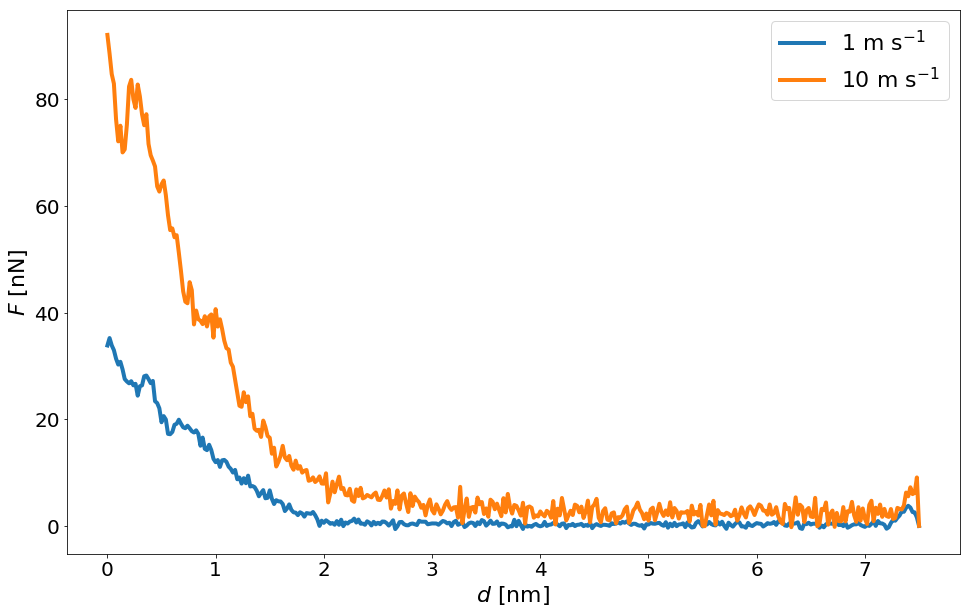

In [37]:
plt.plot(force_conversion_factor*indenter_forces_1_m_per_s["f_storeUnconstrainedForcesAve"],
        label = r'$1 \mathrm{\ m \ s^{-1}}$') 
plt.plot(force_conversion_factor*indenter_forces_10_m_per_s["f_storeUnconstrainedForcesAve"],
        label = r'$10 \mathrm{\ m \ s^{-1}}$')       
plt.xlabel(distance_label)
plt.ylabel(force_label)
plt.legend()

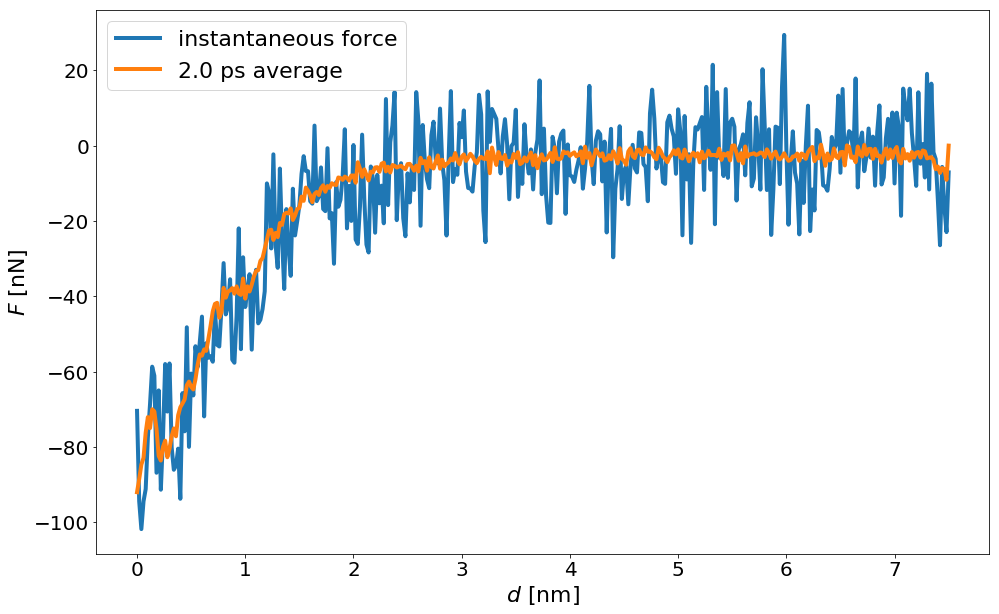

In [44]:
# force distanc
nonindenter_forces_10_m_per_s = constant_velocity_force_distance_curve_from_force_file(
    force_file = './sandbox/10_m_per_s/nonindenter_z_forces.txt',
    initial_distance = 7.5, # nm
    total_steps = 375000,
    averaging_steps = 1000 )

In [67]:
thermo_ave_df_1_m_per_s = [None]*2

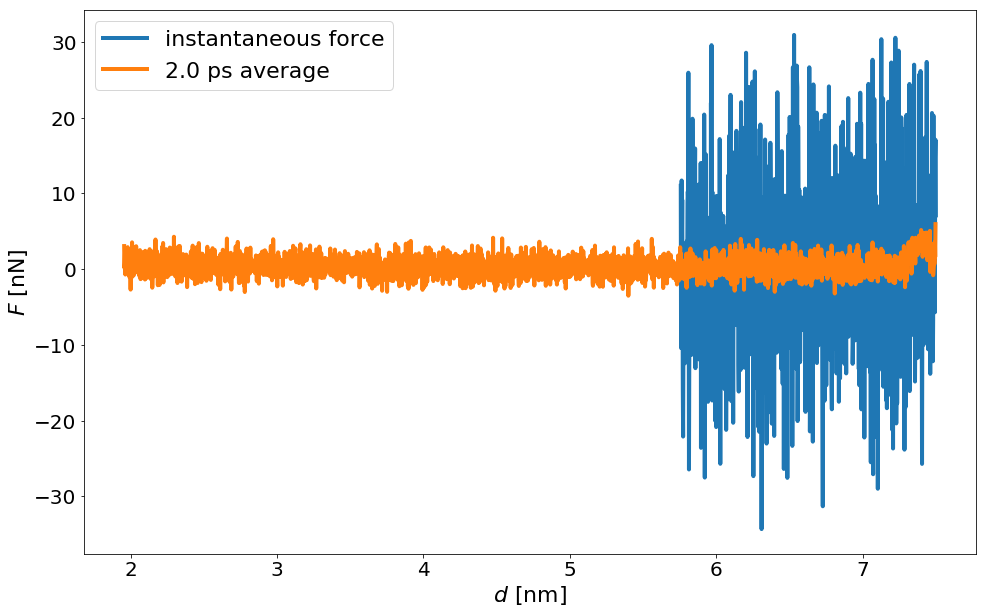

In [46]:
 thermo_df_1_m_per_s, thermo_ave_df_1_m_per_s = constant_velocity_force_distance_curve_from_thermo_ave(
    thermo_ave_out_file = 'sandbox/1_m_per_s/thermo_ave.out',
    thermo_out_file = 'sandbox/1_m_per_s/thermo.out',
    initial_distance = 7.5, # nm
    total_steps = 3750000,
    averaging_steps = 1000 )

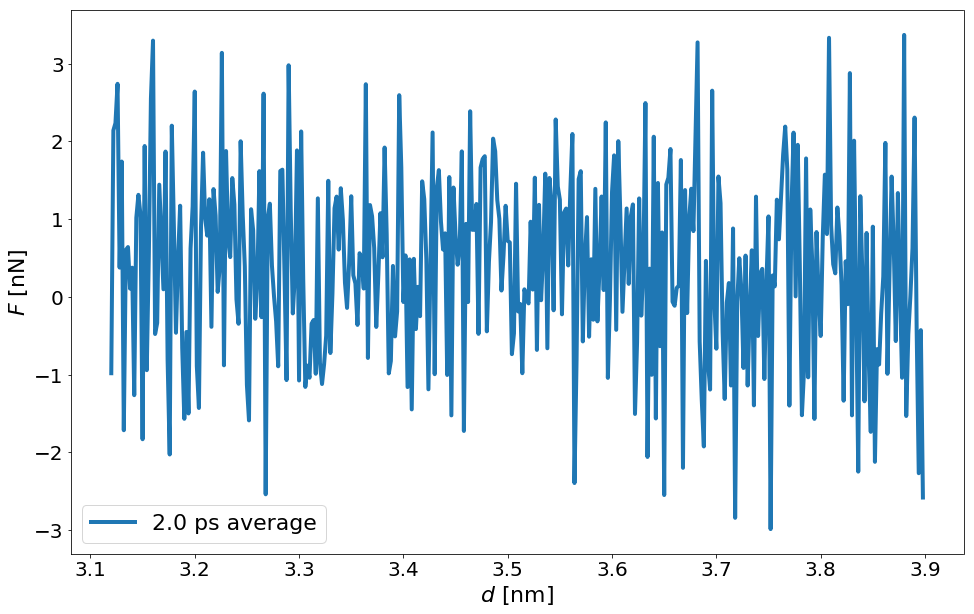

In [69]:
_, thermo_ave_df_1_m_per_s[1] = constant_velocity_force_distance_curve(
    thermo_ave_out_file = 'sandbox/1_m_per_s/thermo_ave.out.3',
    initial_distance = 7.5, # nm
    total_steps = 3750000,
    averaging_steps = 1000 )

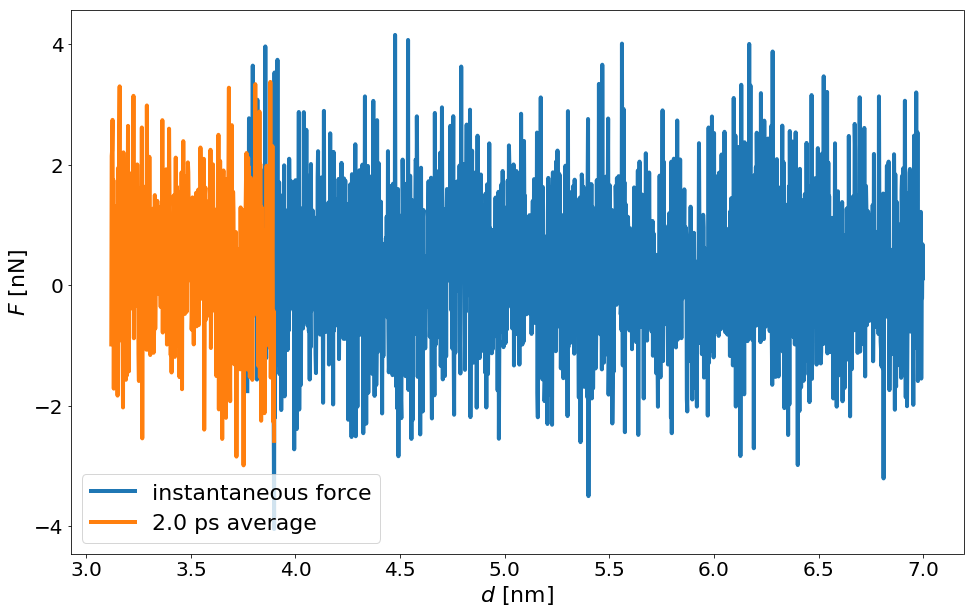

In [100]:
plt.plot(force_conversion_factor*thermo_ave_df_1_m_per_s[0]["indenter_non_indenter_interaction[3]"].loc[ thermo_ave_df_1_m_per_s[0].index < 7],
        label='instantaneous force')
plt.plot(force_conversion_factor*thermo_ave_df_1_m_per_s[1]["indenter_non_indenter_interaction[3]"],
        label = "{:.1f} ps average".format(averaging_time))    
   
plt.xlabel(distance_label)
plt.ylabel(force_label)
plt.legend()


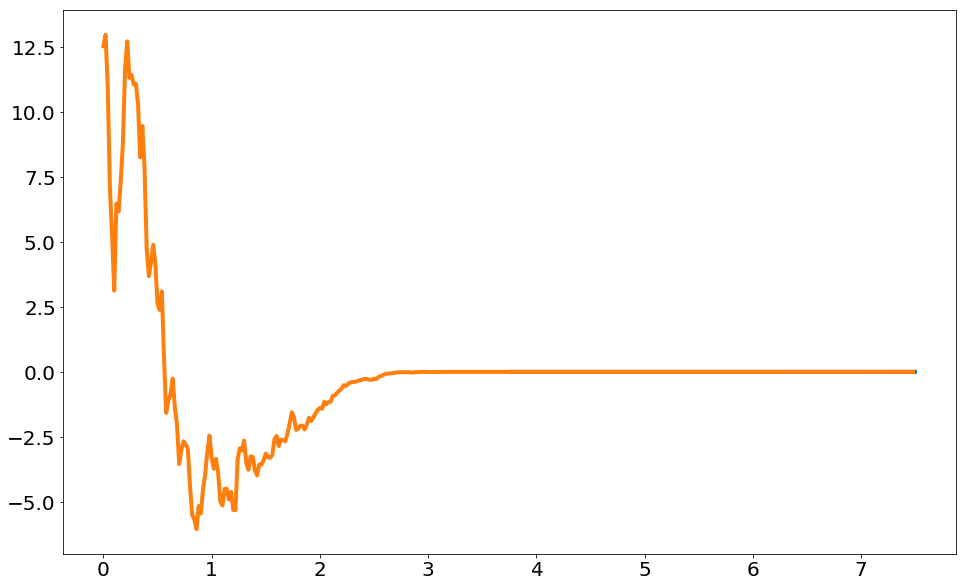

In [115]:
plt.plot(force_conversion_factor*thermo_ave_df_1_m_per_s[0]["c_indenter_surfactant_interaction[3]"])
plt.plot(force_conversion_factor*thermo_ave_df_10_m_per_s["c_indenter_surfactant_interaction[3]"] )

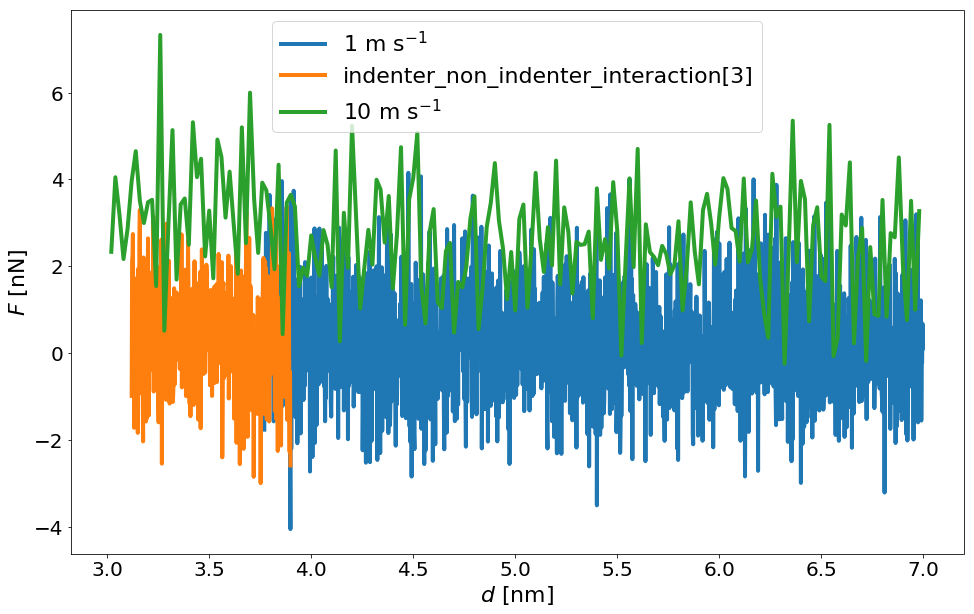

In [121]:
plt.plot(force_conversion_factor*thermo_ave_df_1_m_per_s[0]["indenter_non_indenter_interaction[3]"].loc[ thermo_ave_df_1_m_per_s[0].index < 7 ],
        label = r'$1 \mathrm{\ m \ s^{-1}}$') 
plt.plot(force_conversion_factor*thermo_ave_df_1_m_per_s[1]["indenter_non_indenter_interaction[3]"].loc[ thermo_ave_df_1_m_per_s[1].index < 7 ])
plt.plot(force_conversion_factor*thermo_ave_df_10_m_per_s["indenter_non_indenter_interaction[3]"].loc[ (7 > thermo_ave_df_10_m_per_s.index) & (thermo_ave_df_10_m_per_s.index > 3) ],
                label = r'$10 \mathrm{\ m \ s^{-1}}$')    
   
plt.xlabel(distance_label)
plt.ylabel(force_label)
plt.legend()

### Drag force away from surface

in nN

#### 1 m / s

In [126]:
(force_conversion_factor*thermo_ave_df_1_m_per_s[0]["indenter_non_indenter_interaction[3]"].loc[ 
        (thermo_ave_df_1_m_per_s[0].index > 4) & (thermo_ave_df_1_m_per_s[0].index < 7) ]).mean()

0.26009859871139096

#### 10 m / s

In [127]:
(force_conversion_factor*thermo_ave_df_10_m_per_s["indenter_non_indenter_interaction[3]"].loc[
        (thermo_ave_df_10_m_per_s.index > 4) & (thermo_ave_df_10_m_per_s.index < 7) ]).mean()

2.470797203694911

### File system

In [526]:
lmplab_prefix = os.getcwd()

In [527]:
lmplab_prefix

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab'

In [528]:
sds_sys_subdir = os.sep.join(('sds','201810','sys'))

In [529]:
sds_sys_subdir

'sds/201810/sys'

In [530]:
ctab_sys_subdir = os.sep.join(('ctab','201809','sys'))

In [531]:
ctab_sys_subdir

'ctab/201809/sys'

In [532]:
ctab_absolute_prefix = os.sep.join((lmplab_prefix,ctab_sys_subdir))

In [533]:
sds_absolute_prefix = os.sep.join((lmplab_prefix,sds_sys_subdir))

In [534]:
sds_absolute_prefix

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys'

In [535]:
indenter_system_suffix = '_50Ang_stepped'

In [536]:
ctab_system_glob_pattern = ''.join((
    ctab_absolute_prefix,os.sep,'*',indenter_system_suffix))

In [537]:
sds_system_glob_pattern = ''.join((
    sds_absolute_prefix,os.sep,'*',indenter_system_suffix))

In [538]:
ctab_system_glob_pattern = ''.join((
    ctab_absolute_prefix,os.sep,'*',indenter_system_suffix))

In [539]:
sds_system_glob_pattern

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/*_50Ang_stepped'

In [540]:
ctab_system_glob_pattern

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/*_50Ang_stepped'

In [541]:
# os.chdir(absolute_prefix)

In [542]:
sds_indenter_system_absolute_prefix_lst = sorted(glob(sds_system_glob_pattern))

In [543]:
ctab_indenter_system_absolute_prefix_lst = sorted(glob(ctab_system_glob_pattern))

In [544]:
sds_indenter_system_lst = [ 
    os.path.basename(
        indenter_system_absolute_prefix) for indenter_system_absolute_prefix
            in sds_indenter_system_absolute_prefix_lst ]

In [545]:
ctab_indenter_system_lst = [ 
    os.path.basename(
        indenter_system_absolute_prefix) for indenter_system_absolute_prefix
            in ctab_indenter_system_absolute_prefix_lst ]

In [588]:
ctab_indenter_system_lst

['1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '415_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '415_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped',
 '515_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '515_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped']

In [589]:
sds_indenter_system_lst

['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped']

In [548]:
system_lst = [*sds_indenter_system_lst, *ctab_indenter_system_lst]

In [549]:
system_absolute_prefix_lst = [*sds_indenter_system_absolute_prefix_lst, 
                              *ctab_indenter_system_absolute_prefix_lst]

In [550]:
system_absolute_prefix_dict = dict(zip( system_lst, system_absolute_prefix_lst))

In [551]:
sorted(system_absolute_prefix_dict)

['1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '415_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '415_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped',
 '515_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '515_CTAB_on_AU_11

In [552]:
production_steps = [500000, 1000000]

In [590]:
production_steps

[500000, 1000000]

In [554]:
production_subdir_lst = [ 'production_{:d}'.format(steps) for steps in production_steps]

In [591]:
production_subdir_lst

['production_500000', 'production_1000000']

In [556]:
production_dict = dict( zip(production_steps, production_subdir_lst) )

In [592]:
production_dict

{500000: 'production_500000', 1000000: 'production_1000000'}

In [594]:
system_names = system_lst

In [595]:
system_names

['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36

In [596]:
os.getcwd()

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab'

In [597]:
indenter_dict = {system: [] for system in system_names}

### Extract colvars tar files

In [598]:
# unpack all tar files
for system_name in system_names:
    system_absolute_prefix = system_absolute_prefix_dict[system_name]
    print("{:s}: {:s}".format(system_name, system_absolute_prefix))
    
    for steps, production_subdir in production_dict.items():
        production_absolute_prefix = os.sep.join((
            system_absolute_prefix, production_subdir))
        if os.path.isdir(production_absolute_prefix):
            print("  {:s}/{:s} exists.".format(system_name, production_subdir))
            tarfile_glob_pattern = os.sep.join((
                production_absolute_prefix,'*.tar.gz'))
            tarfiles = glob(tarfile_glob_pattern)
            if len(tarfiles) > 0:
                print("    {:s}/{:s} has {:s}.".format(
                    system_name, production_subdir, tarfiles[0]))
                colvars_tar = tarfile.open(tarfiles[0], 'r')
                print("    Content: {}".format(colvars_tar.getnames()))
                colvars_tar.extractall(path=production_absolute_prefix)
                print("    Extracted.")
                indenter_dict[system_name].append(steps)

1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped
  1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000 exists.
    1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000 has /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000/colvars.tar.gz.
    Content: ['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped.colvars.traj', '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped.colvars.state', '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped.restart1.colvars.state', '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped.indenter_pulled.ti.count', '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped.indenter_pulled.ti.grad', '1107_SDS_on_

    Content: ['646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped.colvars.traj', '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped.colvars.state', '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped.restart1.colvars.state', '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped.indenter_pulled.ti.count', '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped.indenter_pulled.ti.grad', '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped.indenter_pulled.ti.pmf']
    Extracted.
646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped
646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped
  646_SDS_on_AU_111_51x30x2_monolayer_wit

    Extracted.
415_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/415_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped
415_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/415_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped
515_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/515_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped
515_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/515_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped
653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped
 

In [600]:
indenter_dict

{'1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [1000000],
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': [1000000],
 '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '377_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped': [],
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '415_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [],
 '415_CTAB_on_AU_111_63x36x2_hemicylinders_with_count

In [864]:
indenter_dict

{'1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [1000000],
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': [1000000],
 '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': [500000],
 '377_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped': [],
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': [500000],
 '415_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [],
 '415_CTAB_on_AU_111_63x36x2_hemicylinders_with_count

## Batch

In [601]:
system_names = [ system_name for system_name, run_list \
                 in indenter_dict.items() if len(run_list) > 0 ]

In [602]:
set(system_names) & set(sds_indenter_system_lst)

{'1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped'}

In [603]:
set(system_names) & set(ctab_indenter_system_lst)

{'1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped'}

### Read data files

In [994]:
# read all systems
i = 0
#df_dict = {}
for system_name in system_names:
    system_absolute_prefix = system_absolute_prefix_dict[system_name]
    print("{:s}: {:s}".format(system_name, system_absolute_prefix))

    #df_dict[system_name] = {}
    if system_name not in df_dict:
        df_dict[system_name] = {}
        
    for total_steps in indenter_dict[system_name]:
        if exclude_dict and system_name in exclude_dict and total_steps in exclude_dict[system_name]:
            continue # skip system
            
        production_absolute_prefix = os.sep.join((
            system_absolute_prefix, production_dict[total_steps]))
        #os.chdir( production_dict[total_steps] )
        print("{:3d}: {:s}".format(i,production_absolute_prefix))
        
        df_dict[system_name][total_steps] = {}
        df_dict[system_name][total_steps]['colvars'] = \
            postprocessing.read_colvars_traj(
                prefix = production_absolute_prefix )
            
        ( df_dict[system_name][total_steps]['ti.pmf'],
          df_dict[system_name][total_steps]['ti.grad'],
          df_dict[system_name][total_steps]['ti.count'] ) = \
            postprocessing.read_colvars_ti( 
                prefix = production_absolute_prefix )
            
        df_dict[system_name][total_steps]['thermo'] = \
            postprocessing.read_production_thermo(
                prefix = production_absolute_prefix )

        i+=1

1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped
  0: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000
129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped
  1: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped/production_500000
220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped
  2: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/p

### Read forces from netcdf

In [569]:
force_keys = [
    'forces', 
    'f_storeAnteSHAKEForces', 
    'f_storeAnteStatForces', 
    'f_storeUnconstrainedForces', 
    'f_storeAnteSHAKEForcesAve', 
    'f_storeAnteStatForcesAve', 
    'f_storeUnconstrainedForcesAve' ]

In [570]:
t2n_array_dict = { system_name: postprocessing.sds_t2n_array for system_name
                      in sds_indenter_system_lst }

In [571]:
t2n_array_dict.update( 
    { system_name: postprocessing.ctab_t2n_array for system_name
                      in ctab_indenter_system_lst } )

In [882]:
# 
exclude_dict = {'1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': [1000000],
                '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': [1000000],
                '653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': [1000000],
                '653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped': [1000000],}
               #'653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped':[1000000]} # done, but not fully concatenated yet
# 1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped/production_1000000

In [884]:
indenter_dict['653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped']

[500000, 1000000]

In [885]:
constant_offset = 7.0637 # Ang, half thickness of substrate

In [1005]:
# RUN AGAIN
# read all systems
i = 0
# update df_dict
for system_name in system_names:
    system_absolute_prefix = system_absolute_prefix_dict[system_name]
    print("{:s}: {:s}".format(system_name, system_absolute_prefix))

    if system_name not in df_dict: # this should never be the case if data files have been read precedingly
        df_dict[system_name] = {}
        
    t2n_array = t2n_array_dict[system_name]
    
    for total_steps in indenter_dict[system_name]:
        if exclude_dict and system_name in exclude_dict and total_steps in exclude_dict[system_name]:
            continue # skip system
            
        production_absolute_prefix = os.sep.join((
            system_absolute_prefix, production_dict[total_steps]))
        #os.chdir( production_dict[total_steps] )
        print("{:3d}: {:s}".format(i,production_absolute_prefix))
        
        # check whether has been processed before:
        system_prefix = system_name + '_' + production_dict[total_steps]
        indenter_z_forces_json_name = system_prefix + '_indenter_z_forces.json'
        nonindenter_z_forces_json_name = system_prefix + '_nonindenter_z_forces.json'
        indenter_z_forces_json_absolute_file_name = os.sep.join((
            production_absolute_prefix,indenter_z_forces_json_name))
        nonindenter_z_forces_json_absolute_file_name = os.sep.join((
            production_absolute_prefix,nonindenter_z_forces_json_name))
    
        
        netcdf_glob_pattern = os.sep.join((
            production_absolute_prefix, '*.nc'))

        netcdf = glob(netcdf_glob_pattern)[0]

        tmp_traj = NetCDFTrajectory(netcdf, 'r', 
            types_to_numbers = list( t2n_array ),
            keep_open=True )
        
        # use first frame to crudely identify indenter
        solid_selection = (
            tmp_traj[0].get_atomic_numbers() == ase.data.atomic_numbers['Au'])
        indenter_selection = (
            solid_selection & (tmp_traj[0].get_positions()[:,2] > 20 ) ) 
        # 20 some arbitrary xy-plane seperating substrate & indenter
        
        print("solid: {: 9d} atoms, therof indenter: {: 9d} atoms.".format(
            np.count_nonzero(solid_selection),
            np.count_nonzero(indenter_selection) ) )
        
        # derive z dist offset
        # (COM-COM distance is stored, we want surface-apex distance)
        #pmf_df = df_dict[system_name][total_steps]['ti.pmf']
        colvars_traj_df = df_dict[system_name][total_steps]['colvars']
        #thermo_df = df_dict[system_name][total_steps]['thermo']
        
        # initial apex position at frame 0:
        apex_z0 = tmp_traj[0][indenter_selection].get_positions()[:,2].min()

        # initial substrate surface position at frame 0:
        surface_z0 = tmp_traj[0][solid_selection # in order to have a standardized width
            & ~indenter_selection].get_positions()[:,2].mean() + constant_offset

        extents_dist_0 = apex_z0 - surface_z0
        com_com_dist_0 = colvars_traj_df.loc[0,'com_com_dist_z']
        dist_offset = com_com_dist_0 - extents_dist_0
        
        print("initial com-com dist:        {:8.3f}".format(com_com_dist_0) )
        print("initial apex-surface dist:   {:8.3f}".format(extents_dist_0) )
        print("resulting positional offset: {:8.3f}".format(dist_offset) )
        
        
        # sum forces on all indenter atoms for all frames
        if os.path.isfile(indenter_z_forces_json_absolute_file_name) and \
            os.path.isfile(nonindenter_z_forces_json_absolute_file_name):
            print("Has been processed before, reading json files {:s} and {:s}.".format(
                indenter_z_forces_json_absolute_file_name,
                nonindenter_z_forces_json_absolute_file_name))
            indenter_force_z_sum_df = pd.read_json(
                indenter_z_forces_json_absolute_file_name, orient='index')
            nonindenter_force_z_sum_df = pd.read_json(
                nonindenter_z_forces_json_absolute_file_name, orient='index')
        else:
            print("Reading NetCDF.")
            indenter_force_sum_dict = { key: [] for key in force_keys }
            nonindenter_force_sum_dict = { key: [] for key in force_keys }
            for key in force_keys:    
                if key in tmp_traj[0].arrays:
                    indenter_force_sum_dict[key] = np.array(
                        [ f[indenter_selection].arrays[key].sum(axis=0) 
                             for f in tmp_traj ] )
                    nonindenter_force_sum_dict[key] = np.array(
                        [ f[~indenter_selection].arrays[key].sum(axis=0) 
                             for f in tmp_traj ] )
                else:
                    print("Warning: key '{:s}' not in NetCDF".format(key))

            # only keep z forces and create data frames
            indenter_force_z_sum_dict = { key: value[:,2] for key, value 
                            in indenter_force_sum_dict.items() }

            nonindenter_force_z_sum_dict = { key: value[:,2] for key, value 
                                    in nonindenter_force_sum_dict.items() }

            indenter_force_z_sum_df = pd.DataFrame.from_dict(
                indenter_force_z_sum_dict, dtype=float)

            nonindenter_force_z_sum_df = pd.DataFrame.from_dict(
                nonindenter_force_z_sum_dict, dtype=float)

            # make indices agree
            netcdf_output_interval = colvars_traj_df.index[-1]/(len(tmp_traj)-1)
            print("netcdf stores every {:d}th of {:d} frames in total.".format(
                int(netcdf_output_interval), int(colvars_traj_df.index[-1]) ) )

            indenter_force_z_sum_df.set_index(
                (indenter_force_z_sum_df.index*netcdf_output_interval).astype(int),
                inplace=True )
            nonindenter_force_z_sum_df.set_index(
                (nonindenter_force_z_sum_df.index*netcdf_output_interval).astype(int),
                inplace=True )
        
            # store z forces in json files
            indenter_force_z_sum_df.to_json(
                indenter_z_forces_json_absolute_file_name,  orient='index')

            nonindenter_force_z_sum_df.to_json(
                nonindenter_z_forces_json_absolute_file_name,  orient='index')

        # keep forces in data frame dict
        if total_steps not in df_dict[system_name]: 
            # this should never be the case if data files have been read precedingly
            df_dict[system_name][total_steps] = {}
        
        df_dict[system_name][total_steps]['indenter_forces_z'] = \
            indenter_force_z_sum_df
            
        df_dict[system_name][total_steps]['nonindenter_forces_z'] = \
            nonindenter_force_z_sum_df
            
        df_dict[system_name][total_steps]['dist_offset'] = dist_offset

        i+=1

1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped
  0: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000
solid:     21901 atoms, therof indenter:      3541 atoms.
initial com-com dist:         127.183
initial apex-surface dist:     97.459
resulting positional offset:   29.724
Has been processed before, reading json files /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped_production_500000_indenter_z_forces.json and /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped/production_500000/1107_SDS_on_AU_111_51x30x2_bilayer_with_counter

solid:     21901 atoms, therof indenter:      3541 atoms.
initial com-com dist:         127.233
initial apex-surface dist:     97.517
resulting positional offset:   29.716
Has been processed before, reading json files /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped/production_500000/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped_production_500000_indenter_z_forces.json and /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped/production_500000/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped_production_500000_nonindenter_z_forces.json.
75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped
  9: /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/75_SDS_on_AU_111_51x

solid:     30145 atoms, therof indenter:      2934 atoms.
initial com-com dist:         145.102
initial apex-surface dist:    119.140
resulting positional offset:   25.962
Has been processed before, reading json files /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped/production_500000/653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped_production_500000_indenter_z_forces.json and /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201809/sys/653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped/production_500000/653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped_production_500000_nonindenter_z_forces.json.


In [893]:
tmp_traj[1]

IndexError: Trajectory index out of range.

In [766]:
df_dict['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'][500000].keys()

dict_keys(['colvars', 'ti.pmf', 'ti.grad', 'ti.count', 'thermo', 'indenter_forces_z', 'nonindenter_forces_z', 'dist_offset'])

### Make plots

In [863]:
system_names

['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_

In [621]:
import re

In [623]:
bilayer_regex = re.compile('.*bilayer.*')

In [633]:
monolayer_regex = re.compile('.*monolayer.*')

In [648]:
cylinders_regex = re.compile('(?!hemi)*cylinders.*')

In [695]:
hemicylinders_regex = re.compile('.*hemicylinders.*')

In [696]:
sds_regex = re.compile('.*SDS.*')

In [697]:
ctab_regex = re.compile('.*CTAB.*')

In [698]:
ctab_653_regex = re.compile('653_CTAB.*')

In [850]:
sds_646_regex = re.compile('646_SDS.*')

In [851]:
sds_377_regex = re.compile('377_SDS.*')

In [1107]:
sds_220_regex = re.compile('220_SDS.*')

In [1108]:
sds_75_regex = re.compile('75_SDS.*')

In [631]:
ctab_bilayer_systems = list(
    set( filter(bilayer_regex.match, system_names) ) \
    & set( filter( ctab_regex.match, system_names ) ) )

In [637]:
ctab_monolayer_systems = list(
    set( filter(monolayer_regex.match, system_names) ) \
    & set( filter( ctab_regex.match, system_names ) ) )

In [650]:
ctab_hemicylindrical_systems = list( # attention cylinders & hemicylinders swicthed accidentially
    set( filter(cylinders_regex.match, system_names) ) \
    & set( filter( ctab_regex.match, system_names ) ) )

In [651]:
ctab_cylindrical_systems = list( # attention cylinders & hemicylinders swicthed accidentially
    set( filter(hemicylinders_regex.match, system_names) ) \
    & set( filter( ctab_regex.match, system_names ) ) )

In [660]:
ctab_653_systems = list( set( filter( ctab_653_regex.match, system_names ) ) )

In [639]:
ctab_monolayer_systems

['653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped']

In [638]:
ctab_bilayer_systems

['1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped']

In [652]:
ctab_hemicylindrical_systems

[]

In [654]:
ctab_cylindrical_systems

['653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped']

In [661]:
ctab_653_systems

['653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped']

In [862]:
system_names

['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_

In [844]:
sds_bilayer_systems = list(
    set( filter(bilayer_regex.match, system_names) ) \
    & set( filter( sds_regex.match, system_names ) ) )

In [846]:
sds_monolayer_systems = list(
    set( filter(monolayer_regex.match, system_names) ) \
    & set( filter( sds_regex.match, system_names ) ) )

In [858]:
sds_hemicylindrical_systems = list(
    set( filter(hemicylinders_regex.match, system_names) ) \
    & set( filter( sds_regex.match, system_names ) ) )

In [859]:
sds_cylindrical_systems = list( 
    set( filter(cylinders_regex.match, system_names) ) \
    & set( filter( sds_regex.match, system_names ) ) )

In [852]:
sds_646_systems = list( set( filter( sds_646_regex.match, system_names ) ) )

In [853]:
sds_377_systems = list( set( filter( sds_377_regex.match, system_names ) ) )

In [1109]:
sds_220_systems = list( set( filter( sds_220_regex.match, system_names ) ) )

In [1110]:
sds_75_systems = list( set( filter( sds_75_regex.match, system_names ) ) )

In [1111]:
system_names

['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '367_CTAB_on_AU_111_63x36x2_

In [854]:
sds_monolayer_systems

['646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped']

In [855]:
sds_bilayer_systems

['220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped']

In [663]:
shape_labels = ['monolayer','bilayer', 'cylinders']

In [682]:
shape_labels

['monolayer', 'bilayer', 'cylinders']

In [664]:
shape_label_dict = dict(zip(system_names, shape_labels))

In [699]:
def shape_label_assigner(system_name):
    if monolayer_regex.match(system_name):
        return 'monolayer'
    elif bilayer_regex.match(system_name):
        return 'bilayer'
    elif hemicylinders_regex.match(system_name) and sds_regex.match(system_name):
        return 'hemicylinder'
    elif cylinders_regex.match(system_name) and ctab_regex.match(system_name):
        return 'hemicylinder'
    else:
        return 'cylinder'

In [700]:
shape_label_dict = {
    system_name: shape_label_assigner(system_name) for system_name in system_names
}

In [701]:
shape_label_dict

{'1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': 'bilayer',
 '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': 'monolayer',
 '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': 'bilayer',
 '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped': 'bilayer',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': 'monolayer',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': 'bilayer',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': 'monolayer',
 '367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped': 'monolayer',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': 'bilayer',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped': 'monolayer',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped': 'bilayer',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped': 'cylinder',
 '646_SDS_on_AU_111_5

In [702]:
np.array(production_steps) * postprocessing.fs

array([  5.00000000e-10,   1.00000000e-09])

In [703]:
distance_covered = 100 # rough estimate

In [704]:
rate_labels = distance_covered * postprocessing.AA / ( 
    2* np.array(production_steps) * postprocessing.fs ) # labels in m/s or nm/ns

In [705]:
rate_labels

array([ 10.,   5.])

In [706]:
production_dict

{500000: 'production_500000', 1000000: 'production_1000000'}

In [707]:
rate_labels_str = [ 
    r'$' + '{:>2d}'.format(int(vel)) + r' \mathrm{m} \mathrm{s}^{-1}$' \
                   for vel in rate_labels ]

In [708]:
rate_labels_str

['$10 \\mathrm{m} \\mathrm{s}^{-1}$', '$ 5 \\mathrm{m} \\mathrm{s}^{-1}$']

In [709]:
rate_label_dict = dict(zip(production_steps,rate_labels_str))

In [996]:
data_tags = ['thermo', 'colvars', 'ti.pmf', 'ti.grad', 'ti.count']
fig_tags =  ['thermo', 'colvars', 'groupgroup', 'pmf' ]

In [711]:
system_selection = ctab_653_systems

In [906]:
dist_interval = slice(20,80)

In [743]:
df_dict.keys()

dict_keys(['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped', '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped', '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped', '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped', '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped', '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped', '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped', '1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped', '1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped', '367_CTAB_on_AU_111_63x36x2_mono

In [744]:
df_dict['377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'].keys()

dict_keys([500000])

#### Thermo- & group interaction plots

In [1138]:
system_lst

['1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '1010_CTAB_on_AU_111_63x36

In [1045]:
indenter_system_suffix = '_50Ang_stepped'

In [1049]:
original_system_lst = [ s[:-len(indenter_system_suffix)] for s in system_lst ]

In [1058]:
molecules_per_area = 1e-18/sim_df.loc[original_system_lst,'sb_area_per_sf_molecule'] # in nm**2

In [1139]:
shape_label_dict = dict( zip( system_lst, [ '${: 4.2f} \mathrm{{nm}}^{{-2}}$'.format(gamma) for gamma in molecules_per_area]))

In [1140]:
n_surfactant_regexp = re.compile('^([0-9]+)_.*')

In [1141]:
n_surfactant = [ int(n_surfactant_regexp.match(s).group(1)) for s in system_lst ]

In [1157]:
system_selection = ctab_hemicylindrical_systems

In [1154]:
system_selection = sorted(system_selection,key=lambda s: dict(zip(system_lst,n_surfactant))[s])

In [1155]:
system_selection = sorted(system_selection)

In [1158]:
system_selection

[]

In [1096]:
shape_label_dict = dict( zip( system_selection, ['bilayer', 'monolayer', 'cylinders']))

In [1131]:
shape_label_dict = dict( zip( system_selection, ['bilayer', 'hemicylinders', 'monolayer']))

In [1124]:
shape_label_dict = dict( zip( system_selection, ['bilayer','monolayer']))

In [1028]:
window = 3

367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped             500000
653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped             500000
Finished after 2 loops


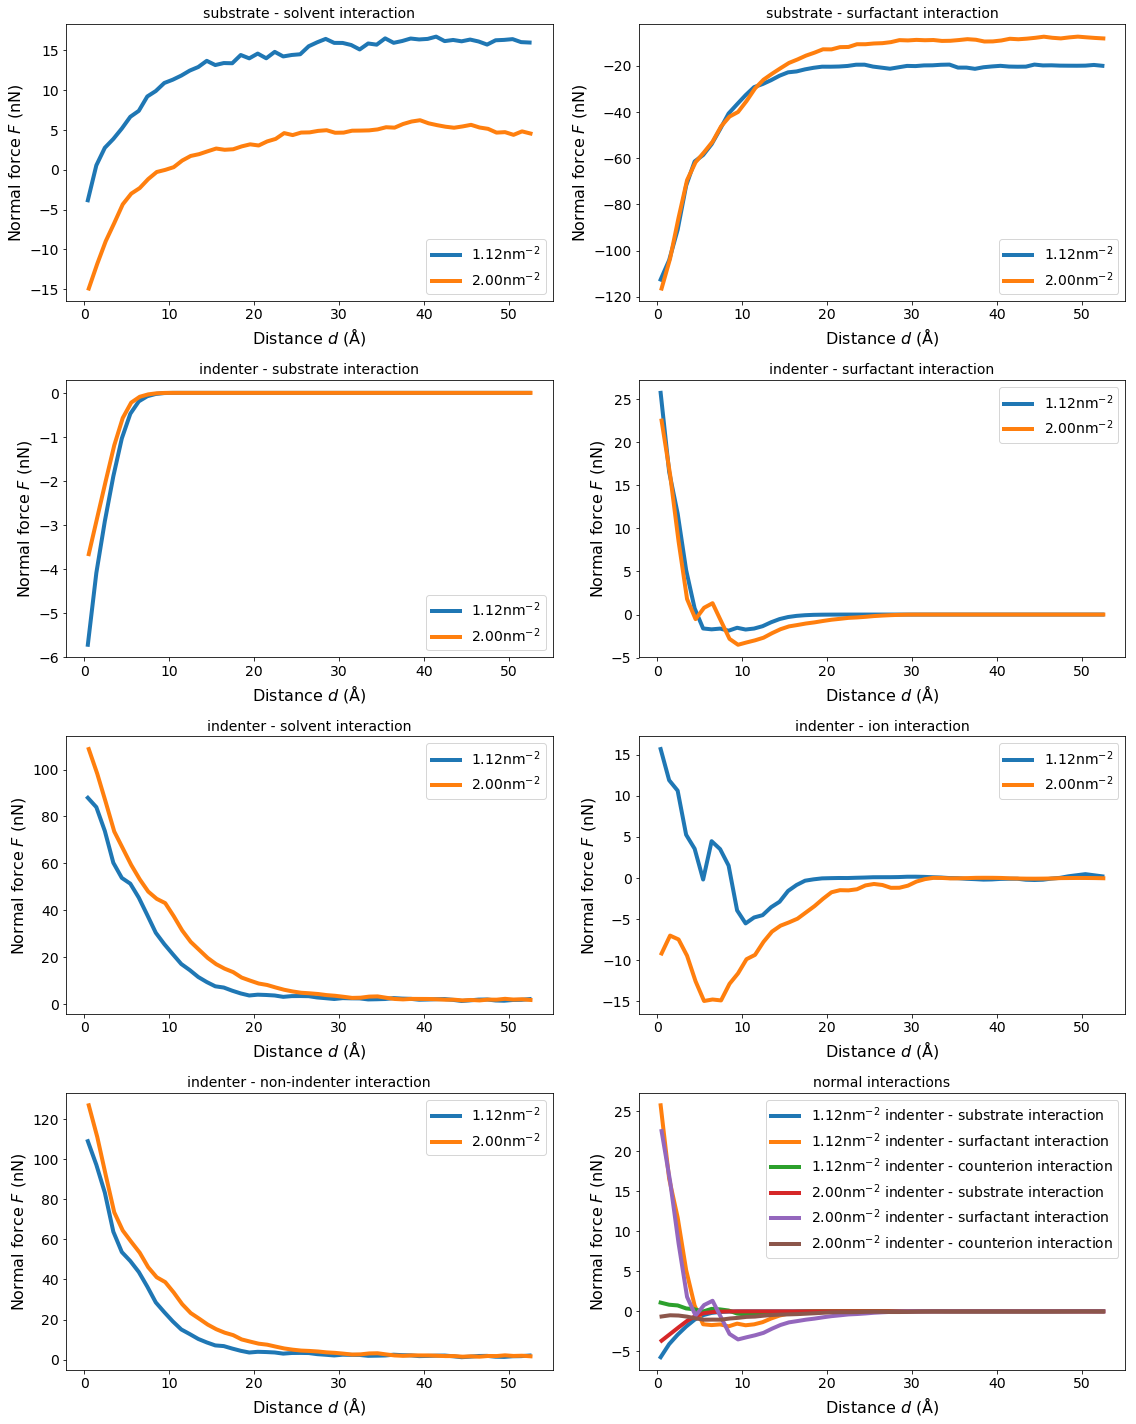

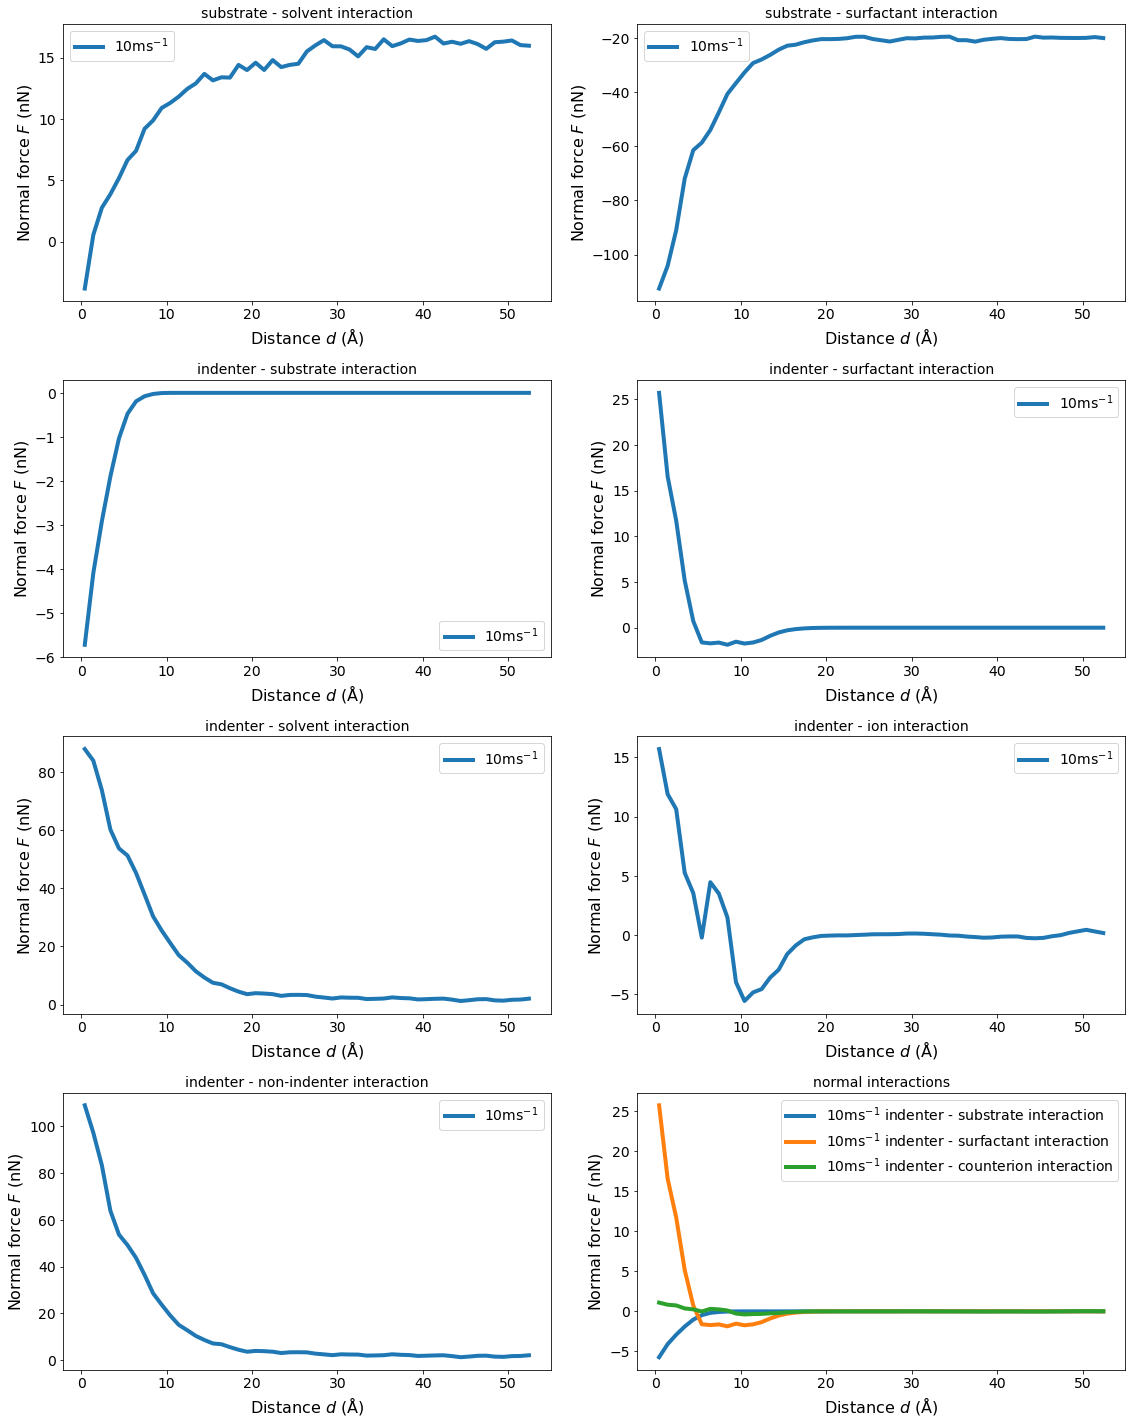

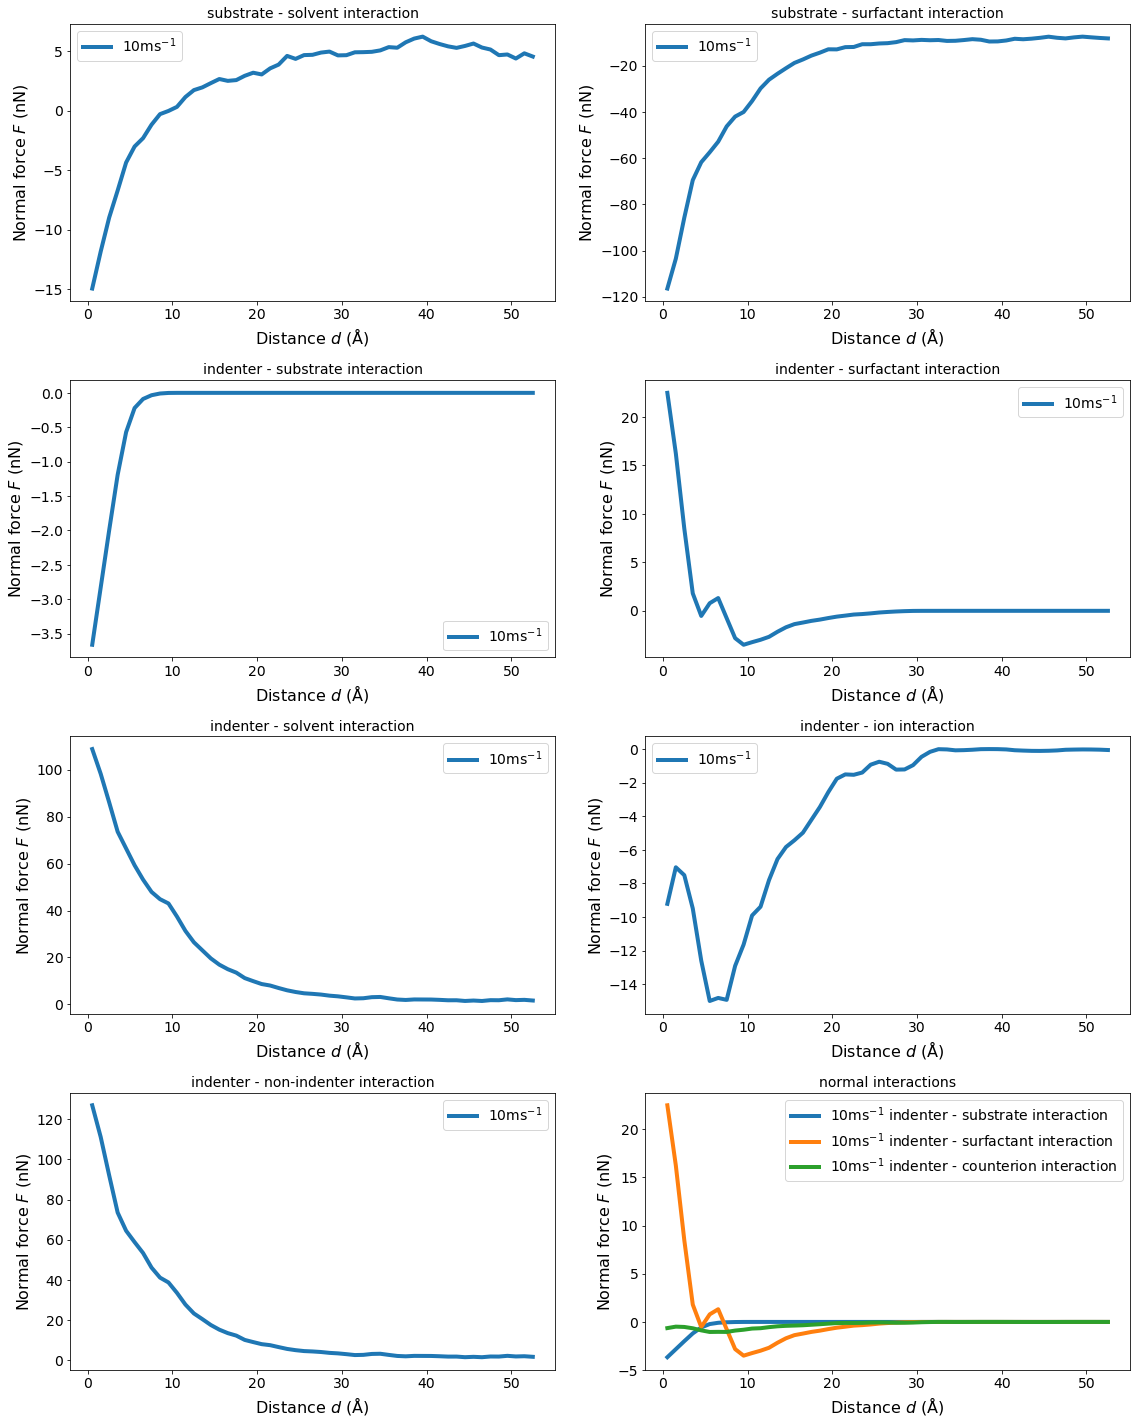

In [1151]:
# plot all
i = 0
rate_fig_dict = {} # same shape, different rates
shape_fig_dict = {} # same rate, different shapes

# plots_of_interest = ''
# for system_name, steps_df_dict in df_dict.items():
for system_name in system_selection:
    steps_df_dict = df_dict[system_name]          
    for total_steps, data_df_dict in steps_df_dict.items():
        if system_name in exclude_dict and total_steps in exclude_dict[system_name]:
            continue
            
        print("{:<72s} {:>12d}".format(system_name, total_steps))
        
        if total_steps not in shape_fig_dict:
            shape_fig_dict[total_steps] = {}
            for tag in fig_tags:
                shape_fig_dict[total_steps][tag] = {}
                shape_fig_dict[total_steps][tag]['fig']  = None
                shape_fig_dict[total_steps][tag]['axes'] = None
    
        if system_name not in rate_fig_dict:
            rate_fig_dict[system_name] = {}
            for tag in fig_tags:
                rate_fig_dict[system_name][tag] = {}
                rate_fig_dict[system_name][tag]['fig']  = None
                rate_fig_dict[system_name][tag]['axes'] = None
        #for df_name, df in data_df_dict.items():
        #    if df_name 
        #    print(df_name)
        ( shape_fig_dict[total_steps]['groupgroup']['fig'],
          shape_fig_dict[total_steps]['groupgroup']['axes'] ) = \
            postprocessing.makeGroupGroupInteractionsByDistPlot( 
                data_df_dict['thermo'], 
                data_df_dict['colvars'], 
                data_df_dict['ti.pmf'],
                fig  = shape_fig_dict[total_steps]['groupgroup']['fig'],
                axes = shape_fig_dict[total_steps]['groupgroup']['axes'],
                legend_prefix = shape_label_dict[system_name], 
                interval = dist_interval, window = window,
                x_offset = - data_df_dict['dist_offset'],
                force_factor = force_conversion_factor,
                distance_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
                force_label=r'Normal force $ F \ \left( \mathrm{nN} \right)$')

        ( rate_fig_dict[system_name]['groupgroup']['fig'],
          rate_fig_dict[system_name]['groupgroup']['axes'] ) = \
            postprocessing.makeGroupGroupInteractionsByDistPlot( 
                data_df_dict['thermo'], 
                data_df_dict['colvars'], 
                data_df_dict['ti.pmf'],
                fig  = rate_fig_dict[system_name]['groupgroup']['fig'],
                axes = rate_fig_dict[system_name]['groupgroup']['axes'],
                legend_prefix = rate_label_dict[total_steps], 
                interval = dist_interval, window = window,
                x_offset = - data_df_dict['dist_offset'],
                force_factor = force_conversion_factor,
                distance_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
                force_label=r'Normal force $ F \ \left( \mathrm{nN} \right)$')
        i+=1
    
print("Finished after {:d} loops".format(i))

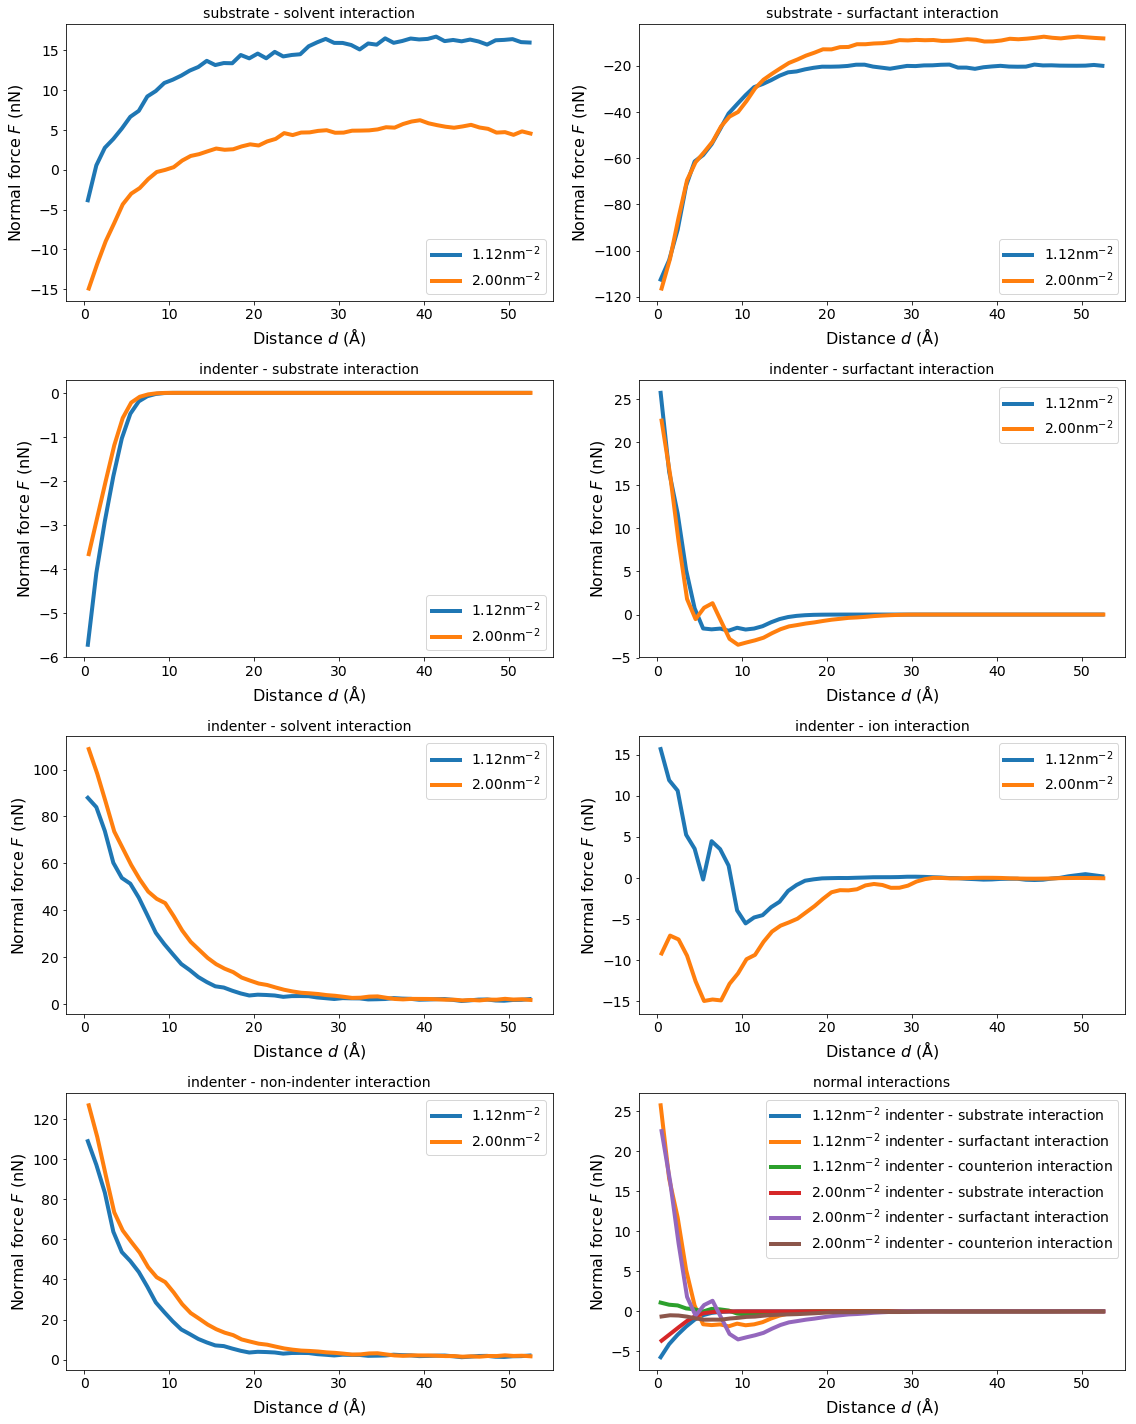

In [1152]:
shape_fig_dict[500000]['groupgroup']['fig']

In [1068]:
rate_fig_dict.keys()

dict_keys(['75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped', '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped'])

In [1072]:
system_selection

['75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped']

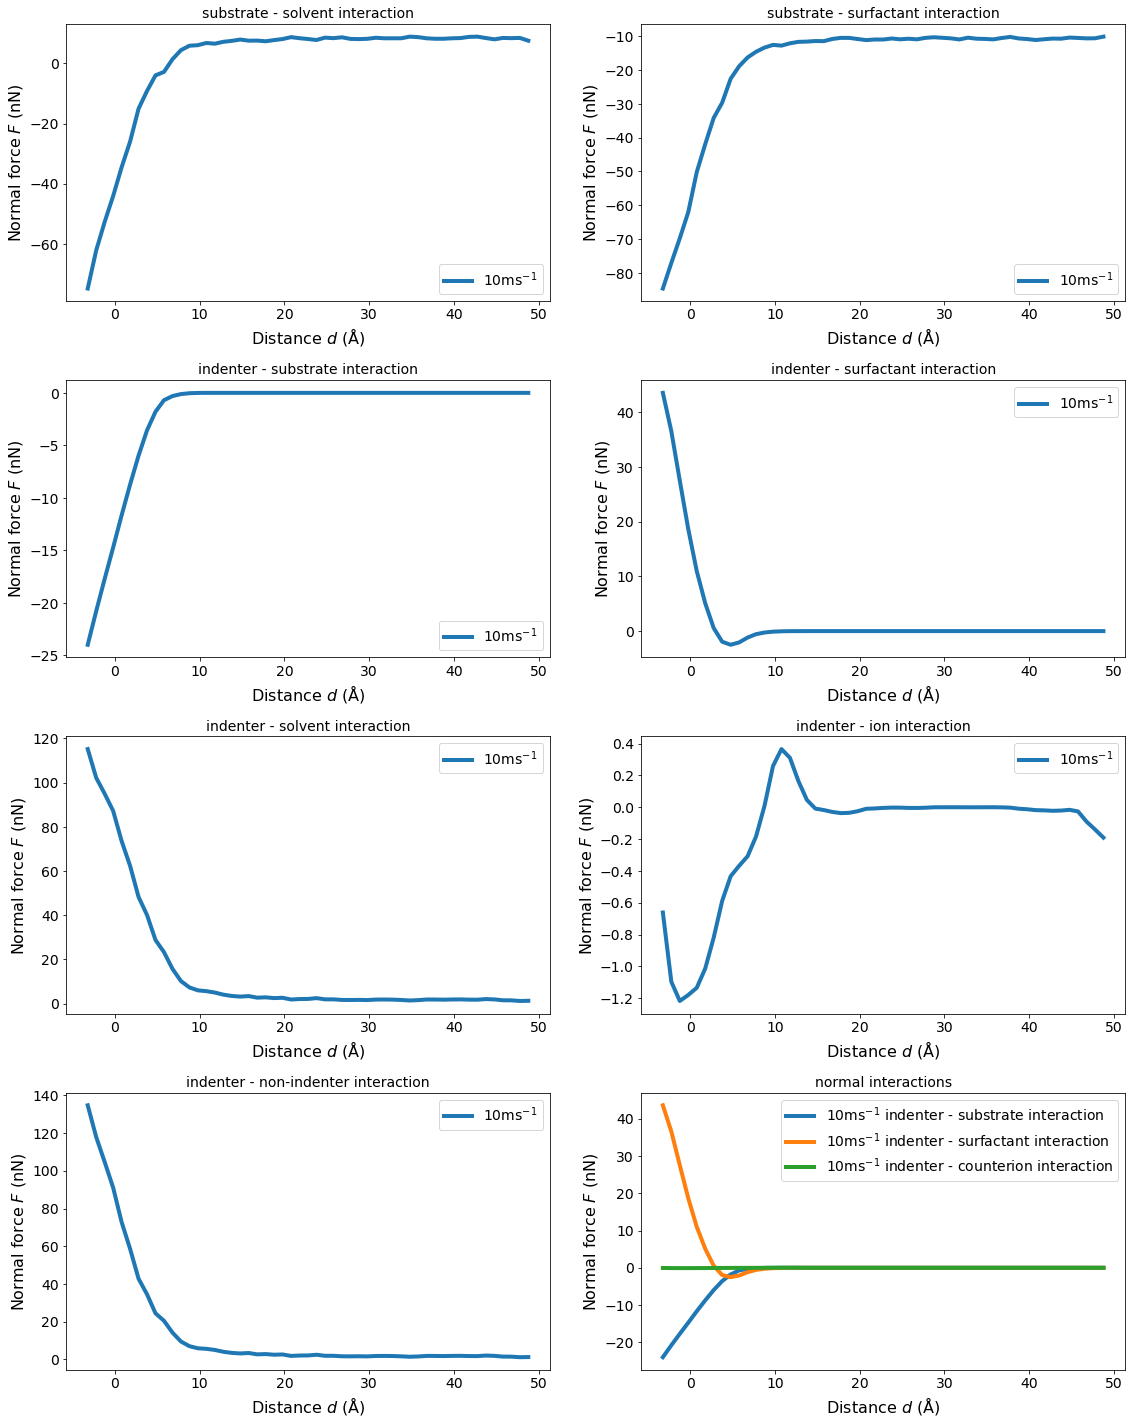

In [1073]:
rate_fig_dict['75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped']['groupgroup']['fig']

In [1030]:
for ax in shape_fig_dict[500000]['groupgroup']['axes']:
    ax.legend().set_visible(False)

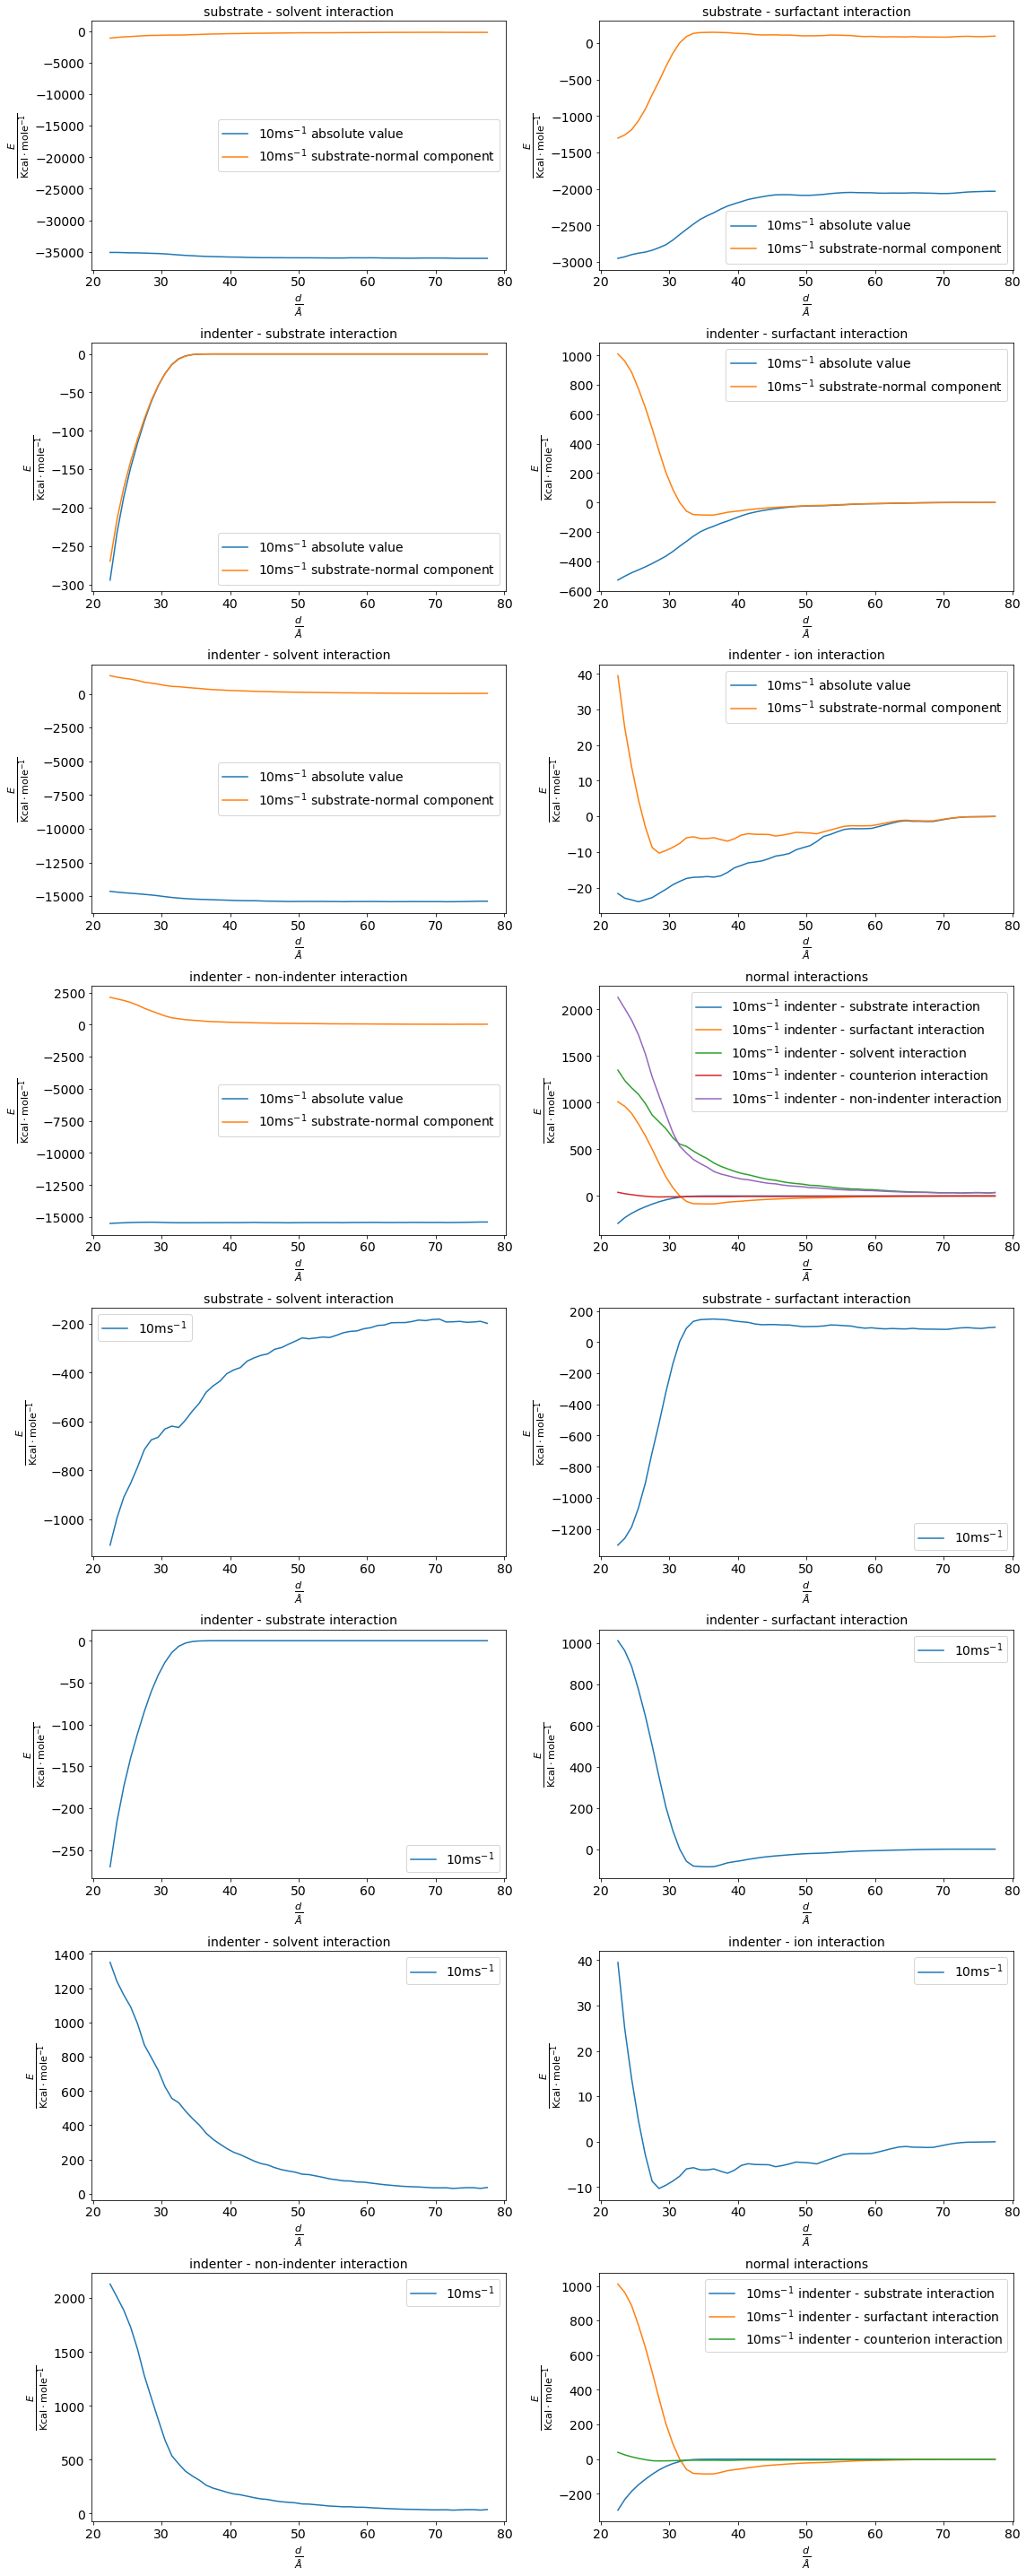

In [717]:
rate_fig_dict['653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped']['groupgroup']['fig']

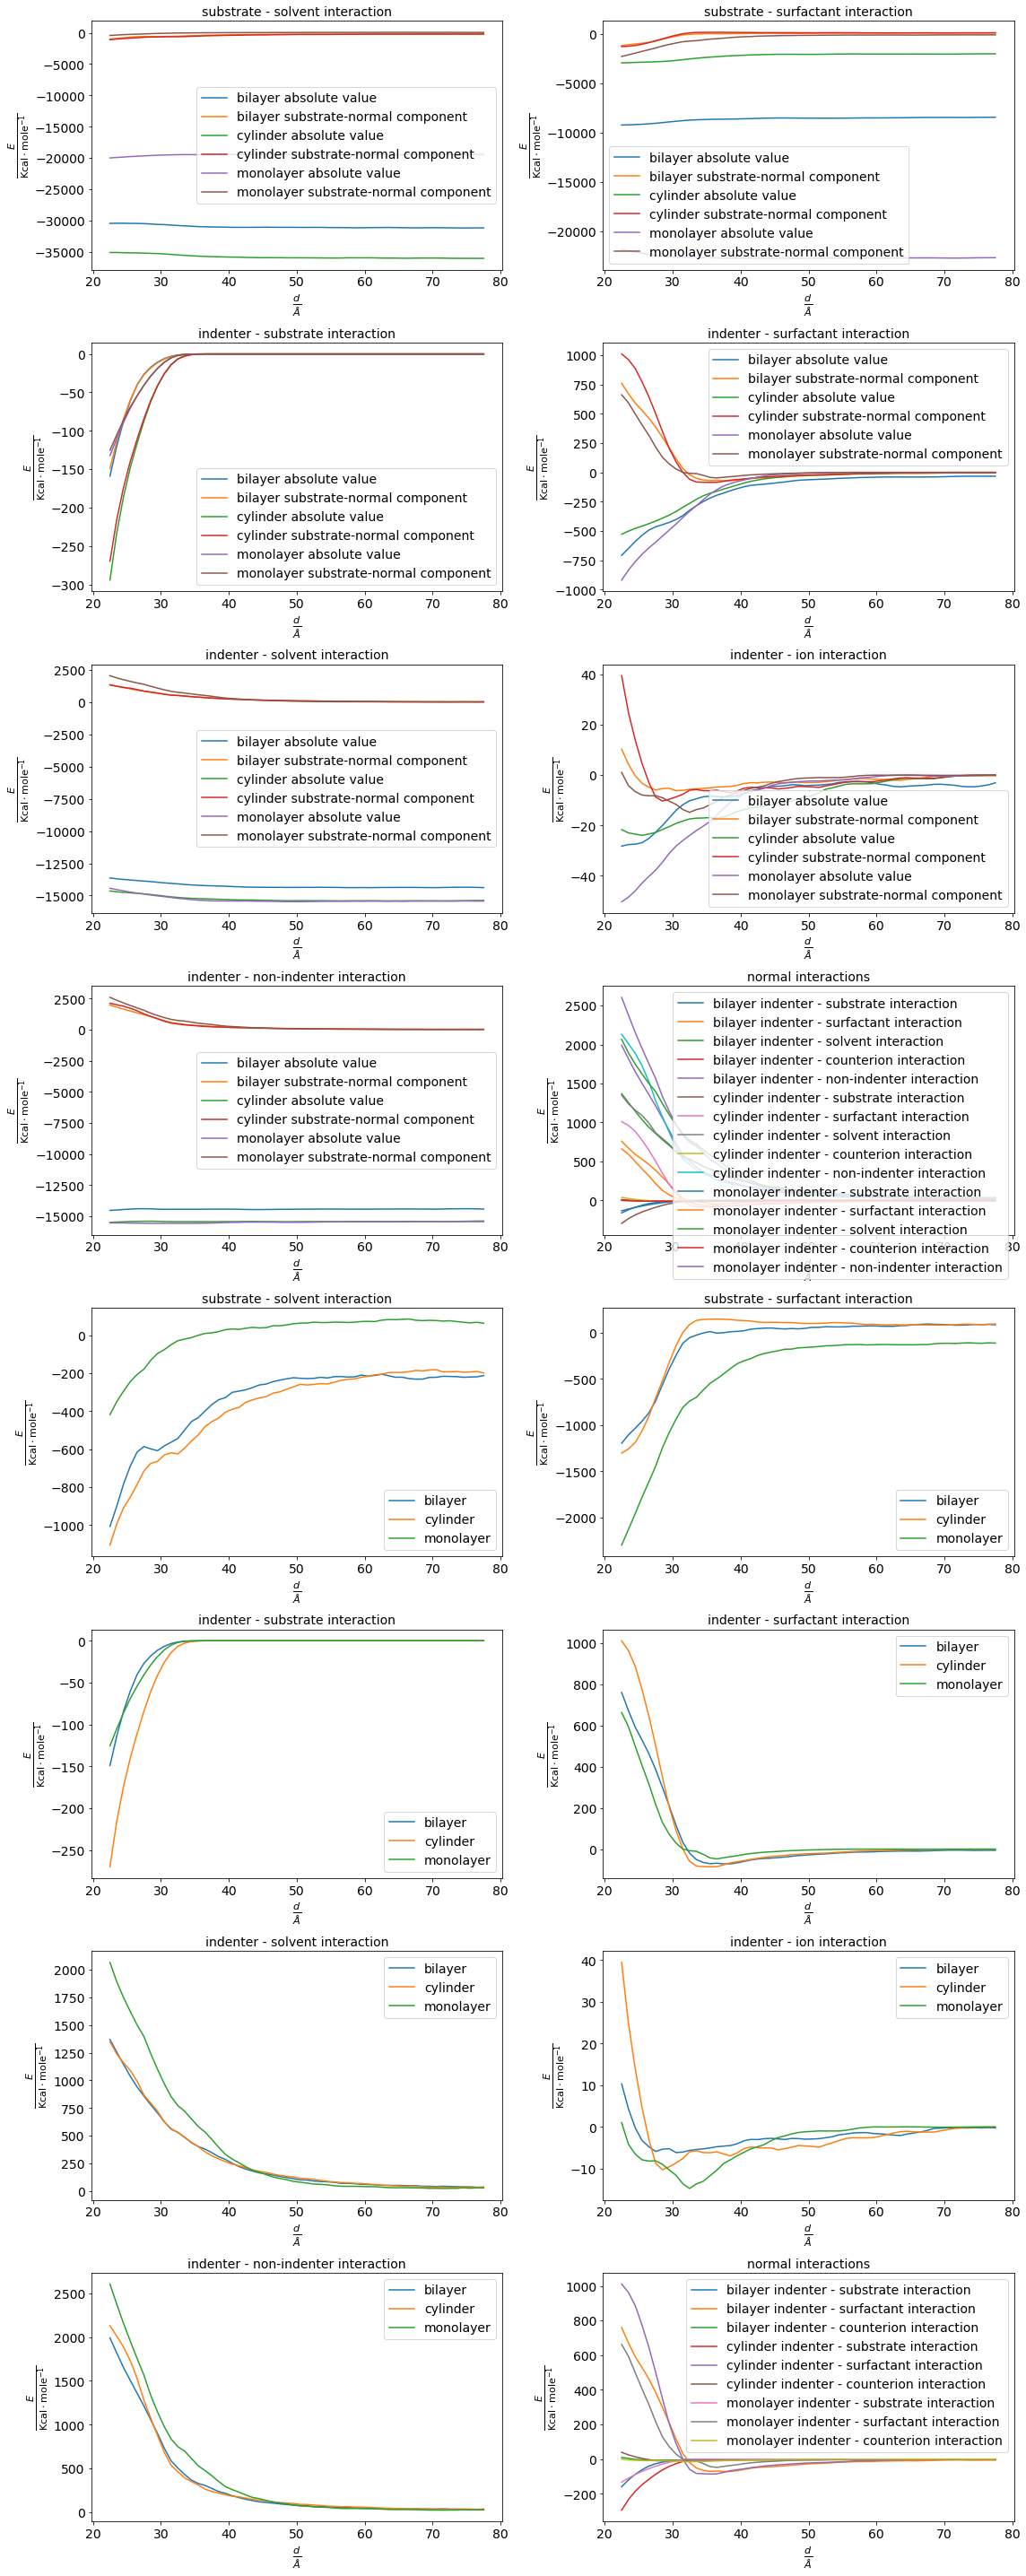

In [718]:
shape_fig_dict[500000]['groupgroup']['fig']

In [719]:
fig_tags

['thermo', 'colvars', 'groupgroup', 'pmf']

In [753]:
fig_tags = ['indenter_forces_z', 'nonindenter_forces_z']

In [754]:
dist_interval = slice(25,80)

#### Netcdf force plots

In [1003]:
data_df_dict.keys()

dict_keys(['colvars', 'ti.pmf', 'ti.grad', 'ti.count', 'thermo'])

In [1004]:
# plot all
i = 0
rate_fig_dict = {} # same shape, different rates
shape_fig_dict = {} # same rate, different shapes

# plots_of_interest = ''
for system_name, steps_df_dict in df_dict.items():
    # rate_fig_dict[system_name] = {}
    # shape_fig_dict[system_name] = {}
    
    if system_name not in system_selection:
        continue
          
    for total_steps, data_df_dict in steps_df_dict.items():
        if system_name in exclude_dict and total_steps in exclude_dict[system_name]:
            continue
            
        print("{:<72s} {:>12d}".format(system_name, total_steps))
        
        if total_steps not in shape_fig_dict:
            shape_fig_dict[total_steps] = {}
            for tag in fig_tags:
                shape_fig_dict[total_steps][tag] = {}
                shape_fig_dict[total_steps][tag]['fig']  = None
                shape_fig_dict[total_steps][tag]['axes'] = None
    
#         if system_name not in rate_fig_dict:
#             rate_fig_dict[system_name] = {}
#             for tag in fig_tags:
#                 rate_fig_dict[system_name][tag] = {}
#                 rate_fig_dict[system_name][tag]['fig']  = None
#                 rate_fig_dict[system_name][tag]['axes'] = None
        
        
        ( shape_fig_dict[total_steps]['indenter_forces_z']['fig'],
          shape_fig_dict[total_steps]['indenter_forces_z']['axes'] ) = \
            postprocessing.makeVariableByDistPlot( 
                data_df_dict['indenter_forces_z'][["f_storeUnconstrainedForcesAve"]]*force_conversion_factor,
                data_df_dict['colvars'], 
                data_df_dict['ti.pmf'],
                fig  = shape_fig_dict[total_steps]['indenter_forces_z']['fig'],
                axes = shape_fig_dict[total_steps]['indenter_forces_z']['axes'],
                #legend_prefix = shape_label_dict[system_name], 
                legend = shape_label_dict[system_name],
                interval = dist_interval, window = 5,
                x_offset = data_df_dict['dist_offset'],
                x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
                y_label=r'Normal force $ F \ \left( \mathrm{nN} \right)$')

#         ( shape_fig_dict[total_steps]['nonindenter_forces_z']['fig'],
#           shape_fig_dict[total_steps]['nonindenter_forces_z']['axes'] ) = \
#             postprocessing.makeVariableByDistPlot( 
#                 data_df_dict['nonindenter_forces_z'][["f_storeUnconstrainedForcesAve"]], 
#                 data_df_dict['colvars'], 
#                 data_df_dict['ti.pmf'],
#                 fig  = shape_fig_dict[total_steps]['nonindenter_forces_z']['fig'],
#                 axes = shape_fig_dict[total_steps]['nonindenter_forces_z']['axes'],
#                 #legend_prefix = shape_label_dict[system_name], 
#                 legend = shape_label_dict[system_name],
#                 interval = dist_interval, window = 5,
#                 x_offset = data_df_dict['dist_offset'],
#                 x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
#                 y_label=r'Normal force $ F \ \left( \mathrm{nN} \ \mathrm{mol}^{-1} \right)$')
            
        #for tag in fig_tags:
        #    shape_fig_dict[total_steps][tag]['fig'].legend()
        i+=1
    
print("Finished after {:d} loops".format(i))

129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped              500000


KeyError: 'indenter_forces_z'

In [832]:
label_dict = dict( zip( system_lst, system_lst))

In [895]:
ctab_653_systems

['653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped']

In [896]:
system_selection = ['653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped']

In [990]:
sds_cylindrical_systems

[]

In [975]:
nsds_lst = [646,75,129,377,220]

In [973]:
system_selection = sds_monolayer_systems

In [987]:
system_selection

['377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped']

In [985]:
system_selection

['377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped',
 '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped']

In [ ]:
system_selection = sorted(system_selection,key=lambda s: dict(zip(sds_bilayer_systems,nsds_lst))[s])

In [979]:
sys

<module 'sys' (built-in)>

In [947]:
rate_label_dict

{500000: '$10 \\mathrm{m} \\mathrm{s}^{-1}$',
 1000000: '$ 5 \\mathrm{m} \\mathrm{s}^{-1}$'}

In [942]:
window = 1

In [965]:
dist_interval = slice(25,80)

In [982]:
system_selection = sds_377_systems

377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped              500000
377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped                500000
Finished after 2 loops


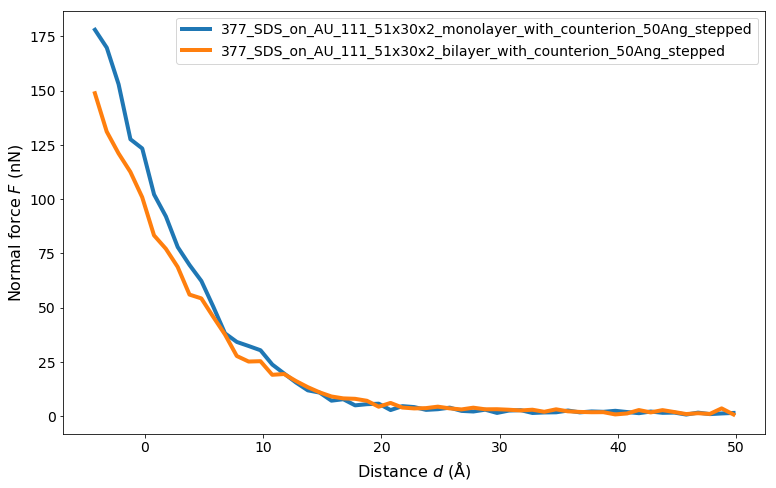

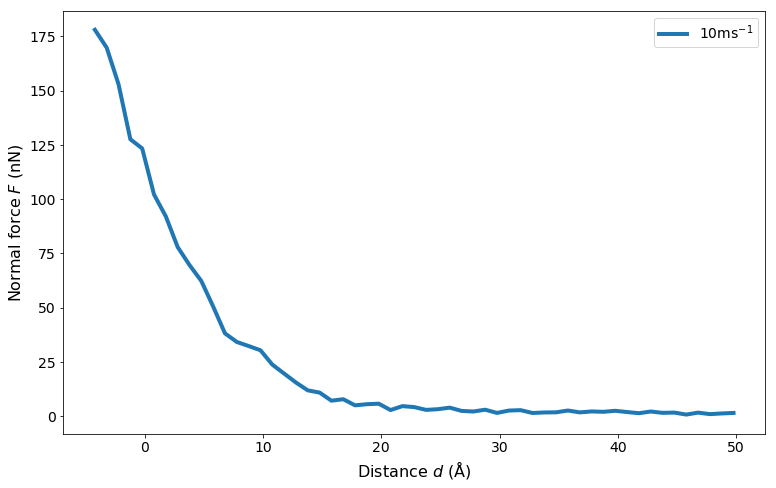

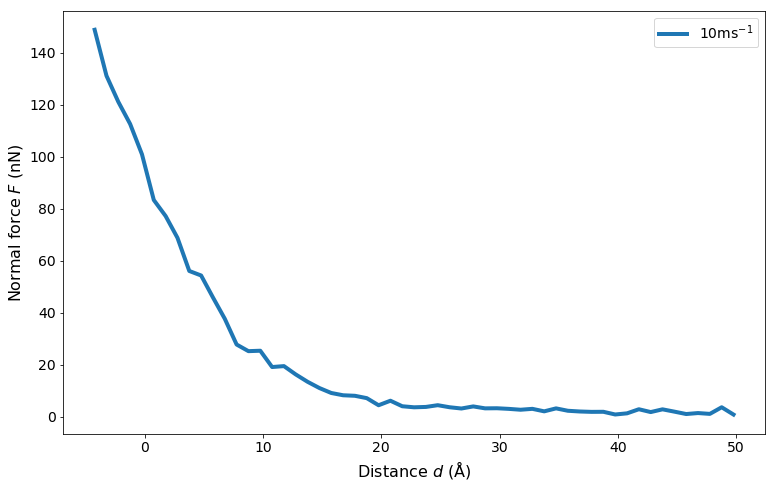

In [984]:
# plot all
i = 0
rate_fig_dict = {} # same shape, different rates
shape_fig_dict = {} # same rate, different shapes

# plots_of_interest = ''
# for system_name, steps_df_dict in df_dict.items():
for system_name in system_selection:
    steps_df_dict = df_dict[system_name]
    # rate_fig_dict[system_name] = {}
    # shape_fig_dict[system_name] = {}
    
    if system_name not in system_selection:
        continue
          
    for total_steps, data_df_dict in steps_df_dict.items():
        if system_name in exclude_dict and total_steps in exclude_dict[system_name]:
            continue
            
        print("{:<72s} {:>12d}".format(system_name, total_steps))
        
        if total_steps not in shape_fig_dict:
            shape_fig_dict[total_steps] = {}
            for tag in fig_tags:
                shape_fig_dict[total_steps][tag] = {}
                shape_fig_dict[total_steps][tag]['fig']  = None
                shape_fig_dict[total_steps][tag]['axes'] = None
    
        if system_name not in rate_fig_dict:
            rate_fig_dict[system_name] = {}
            for tag in fig_tags:
                rate_fig_dict[system_name][tag] = {}
                rate_fig_dict[system_name][tag]['fig']  = None
                rate_fig_dict[system_name][tag]['axes'] = None
        
        
        ( shape_fig_dict[total_steps]['indenter_forces_z']['fig'],
          shape_fig_dict[total_steps]['indenter_forces_z']['axes'] ) = \
            postprocessing.makeVariableByDistPlot( 
                data_df_dict['indenter_forces_z'][["f_storeUnconstrainedForcesAve"]]*force_conversion_factor,
                data_df_dict['colvars'], 
                data_df_dict['ti.pmf'],
                fig  = shape_fig_dict[total_steps]['indenter_forces_z']['fig'],
                axes = shape_fig_dict[total_steps]['indenter_forces_z']['axes'],
                #legend_prefix = shape_label_dict[system_name], 
                legend = label_dict[system_name],
                interval = dist_interval, window = window,
                x_offset = data_df_dict['dist_offset'],
                x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
                y_label=r'Normal force $ F \ \left( \mathrm{nN} \right)$')

#         ( shape_fig_dict[total_steps]['nonindenter_forces_z']['fig'],
#           shape_fig_dict[total_steps]['nonindenter_forces_z']['axes'] ) = \
#             postprocessing.makeVariableByDistPlot( 
#                 data_df_dict['nonindenter_forces_z'][["f_storeUnconstrainedForcesAve"]], 
#                 data_df_dict['colvars'], 
#                 data_df_dict['ti.pmf'],
#                 fig  = shape_fig_dict[total_steps]['nonindenter_forces_z']['fig'],
#                 axes = shape_fig_dict[total_steps]['nonindenter_forces_z']['axes'],
#                 #legend_prefix = shape_label_dict[system_name], 
#                 legend = shape_label_dict[system_name],
#                 interval = dist_interval, window = 5,
#                 x_offset = data_df_dict['dist_offset'],
#                 x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
#                 y_label=r'Normal force $ F \ \left( \mathrm{nN} \ \mathrm{mol}^{-1} \right)$')

        ( rate_fig_dict[system_name]['indenter_forces_z']['fig'],
          rate_fig_dict[system_name]['indenter_forces_z']['axes'] ) = \
            postprocessing.makeVariableByDistPlot( 
                data_df_dict['indenter_forces_z'][["f_storeUnconstrainedForcesAve"]]*force_conversion_factor,
                data_df_dict['colvars'], 
                data_df_dict['ti.pmf'],
                fig  = rate_fig_dict[system_name]['indenter_forces_z']['fig'],
                axes = rate_fig_dict[system_name]['indenter_forces_z']['axes'],
                #legend_prefix = shape_label_dict[system_name], 
                legend = rate_label_dict[total_steps], #label_dict[system_name],
                interval = dist_interval, window = window,
                x_offset = data_df_dict['dist_offset'],
                x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
                y_label=r'Normal force $ F \ \left( \mathrm{nN} \right)$')
            
        #for tag in fig_tags:
        #    shape_fig_dict[total_steps][tag]['fig'].legend()
        i+=1
    
print("Finished after {:d} loops".format(i))

In [914]:
ctab_653_systems

['653_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped',
 '653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped']

In [920]:
df_dict[ctab_653_systems[0]][500000]['dist_offset']

25.961959207147274

In [919]:
df_dict[ctab_653_systems[1]][500000]['dist_offset']

25.070358975210553

In [921]:
df_dict[ctab_653_systems[2]][500000]['dist_offset']

26.245008260148126

In [922]:
ave_offset = np.sum( [df_dict[ctab_653_systems[i]][500000]['dist_offset'] for i in range(3) ] ) / 3

In [950]:
ave_offset

25.759108814168652

In [784]:
nonindenter_force_z_sum_df.index = indenter_force_z_sum_df.index

(<matplotlib.figure.Figure at 0x7f44cc76a748>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f44b81b34e0>])

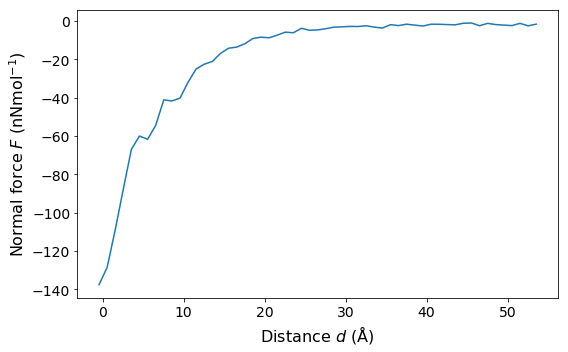

In [811]:
postprocessing.makeVariableByDistPlot(
    nonindenter_force_z_sum_df[['f_storeUnconstrainedForcesAve']]*force_conversion_factor, 
    colvars_traj_df, pmf_df,
    x_offset = dist_offset,
    interval=d_interval, window=1,
    x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
    y_label=r'Normal force $ F \ \left( \mathrm{nN} \mathrm{mol}^{-1} \right)$')

In [739]:
data_df_dict.keys()

dict_keys(['colvars', 'ti.pmf', 'ti.grad', 'ti.count', 'thermo'])

In [742]:
data_df_dict.keys()

dict_keys(['colvars', 'ti.pmf', 'ti.grad', 'ti.count', 'thermo'])

## Colvars

In [129]:
df_dict['646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'][500000].keys()

dict_keys(['colvars', 'ti.pmf', 'ti.grad', 'ti.count', 'thermo'])

In [130]:
colvars_traj_df = df_dict['646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'][500000]['colvars']

In [132]:
pmf_df = df_dict['646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'][500000]['ti.pmf']

In [154]:
grad_df = df_dict['646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'][500000]['ti.grad']

In [155]:
count_df = df_dict['646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped'][500000]['ti.count']

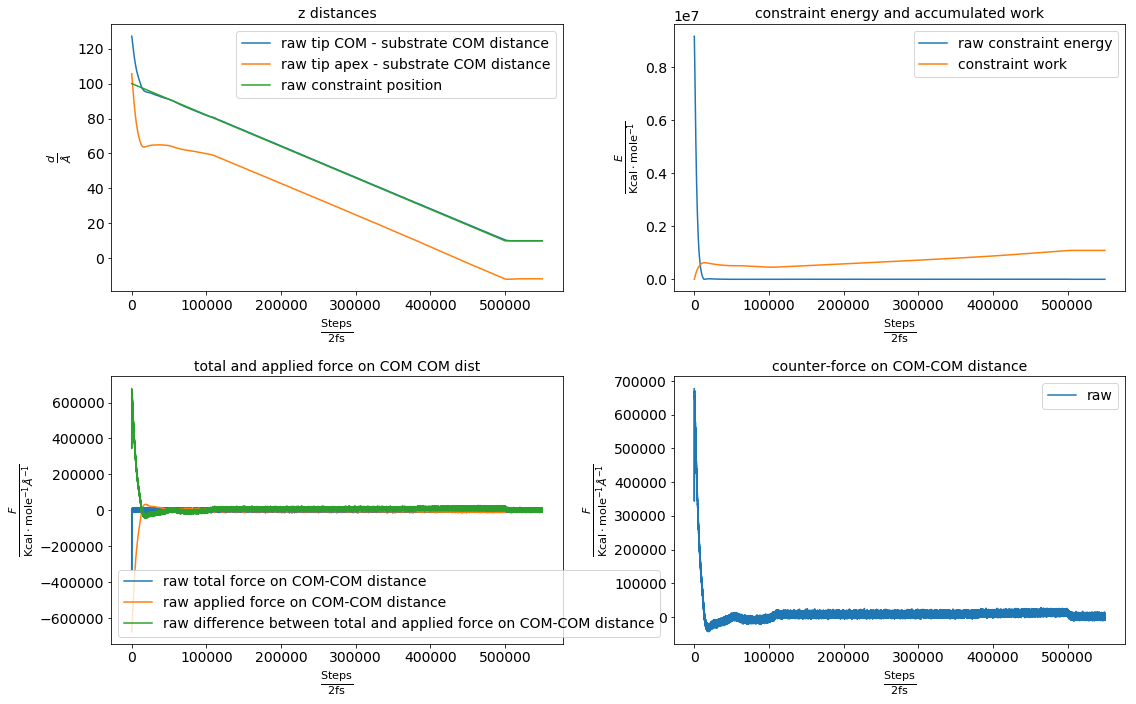

In [133]:
fig, axes = postprocessing.makeColvarsPlots(
    colvars_traj_df, #interval=slice(5000,None), 
    legend_prefix = 'raw');

In [134]:
fig, axes = postprocessing.makeColvarsPlots(
    colvars_traj_df, #interval=slice(5000,None), 
    window = 100,
    fig = fig, axes = axes, legend_prefix = 'ave' );

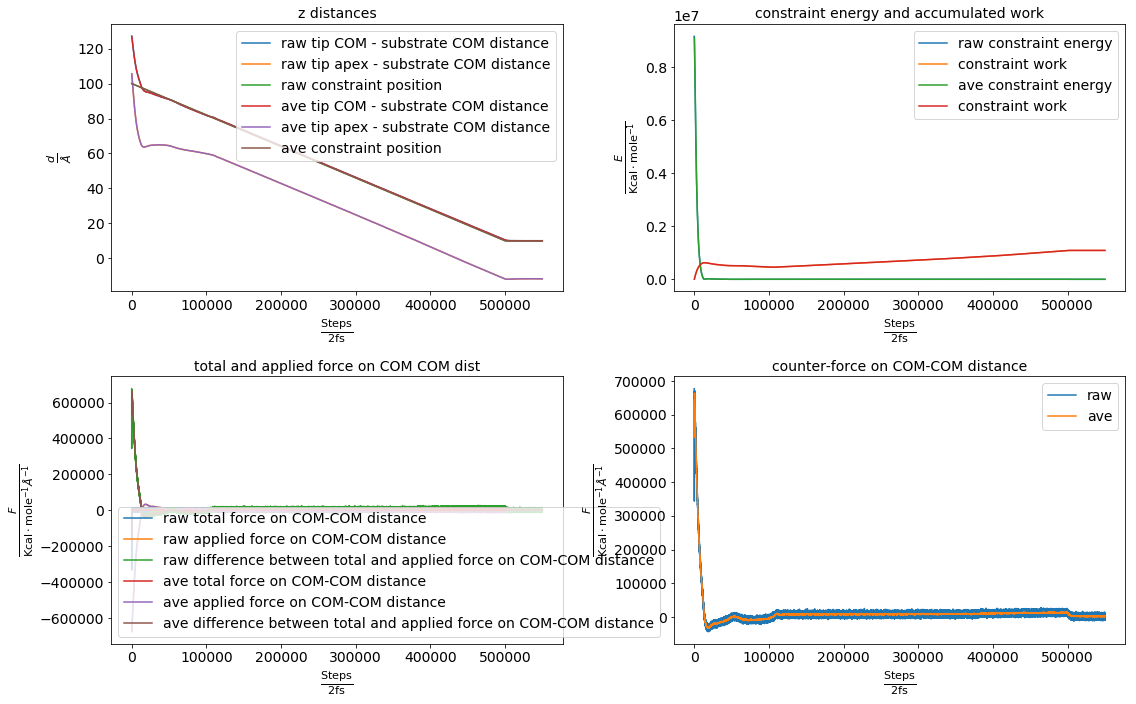

In [135]:
fig

In [150]:
dist_interval=slice(20,60)

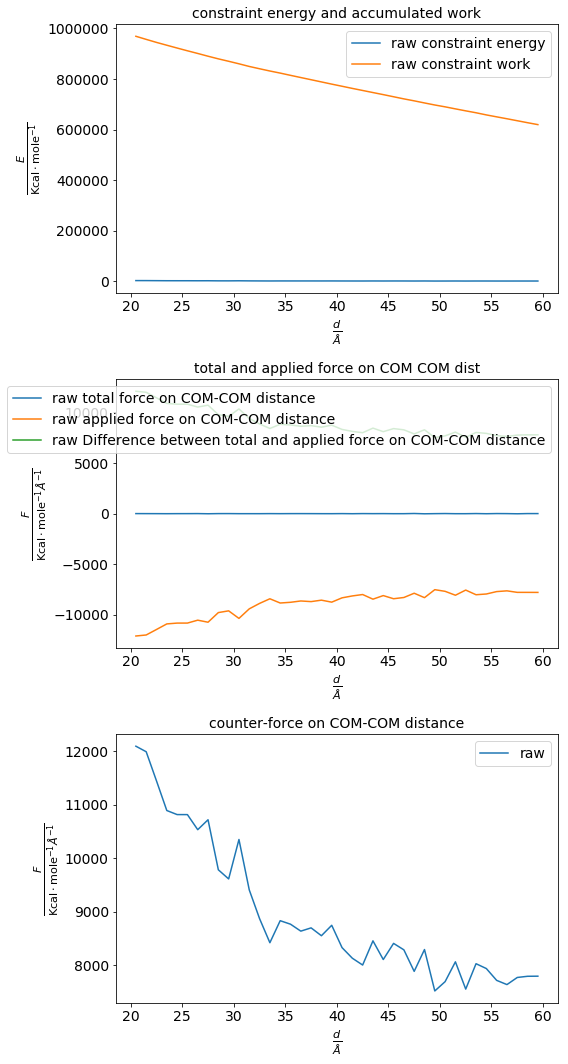

In [151]:
fig, axes = postprocessing.makeColvarsPlotsByDist(
    colvars_traj_df, pmf_df, legend_prefix = 'raw',
    interval=dist_interval);

In [152]:
fig, axes = postprocessing.makeColvarsPlotsByDist(
    colvars_traj_df, pmf_df, legend_prefix = 'ave', window = 5,
    fig = fig, axes = axes, interval=dist_interval );

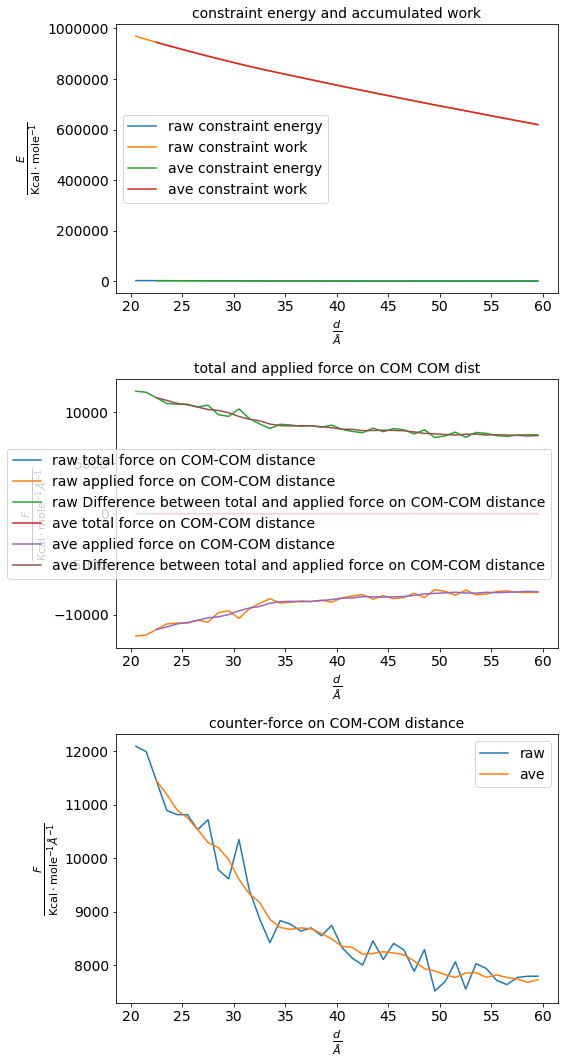

In [153]:
fig

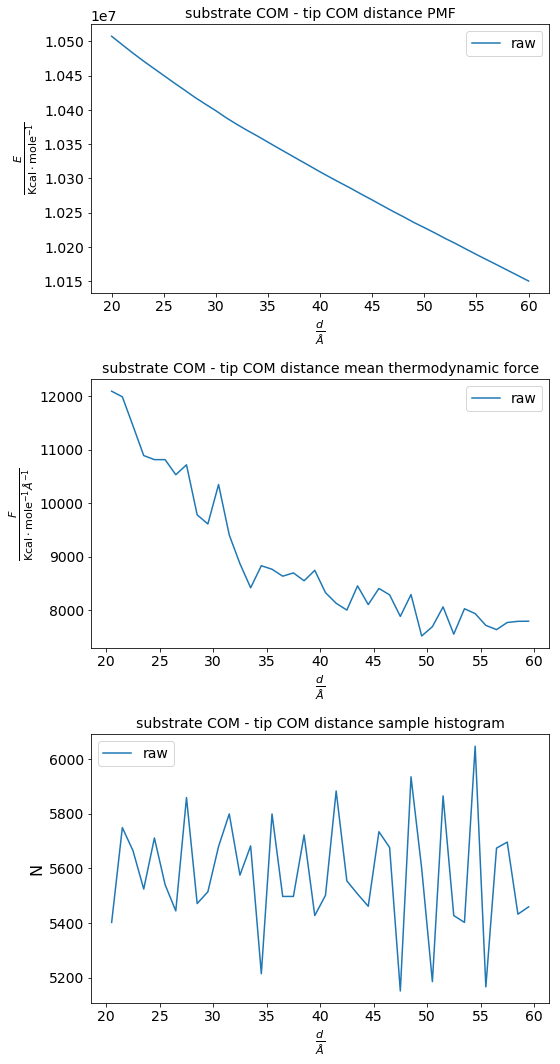

In [156]:
fig, axes = postprocessing.makePMEPlots(
    pmf_df, grad_df, count_df, 
    interval = dist_interval,
    legend_prefix ='raw');

In [638]:
fig, axes = postprocessing.makePMEPlots(
    pmf_df, grad_df, count_df, 
    interval = slice(40,100),
    legend_prefix ='ave', window = 5,
    fig = fig, axes = axes);

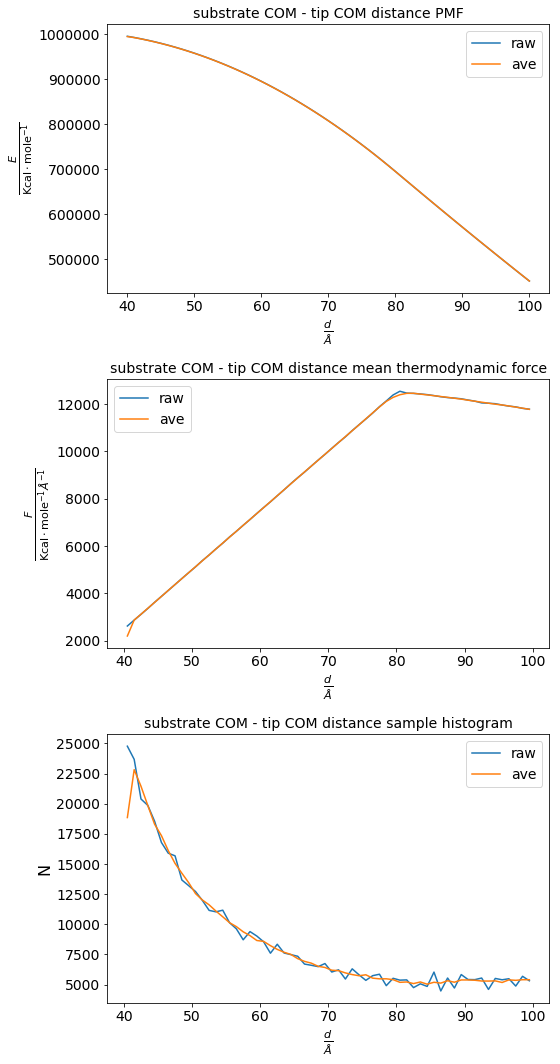

In [639]:
fig

## Thermo output

In [ ]:
postprocessing.read_production_thermo()

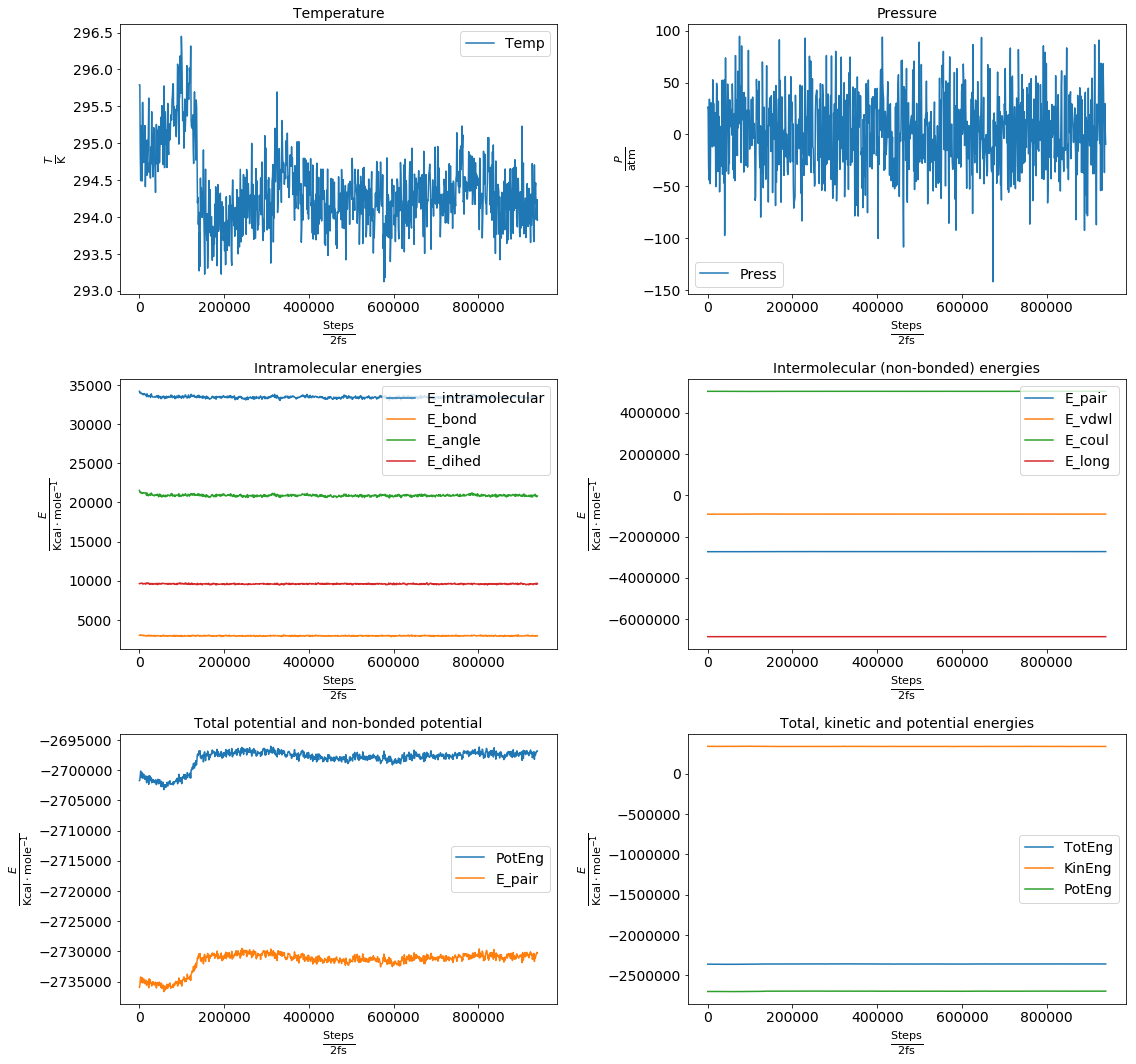

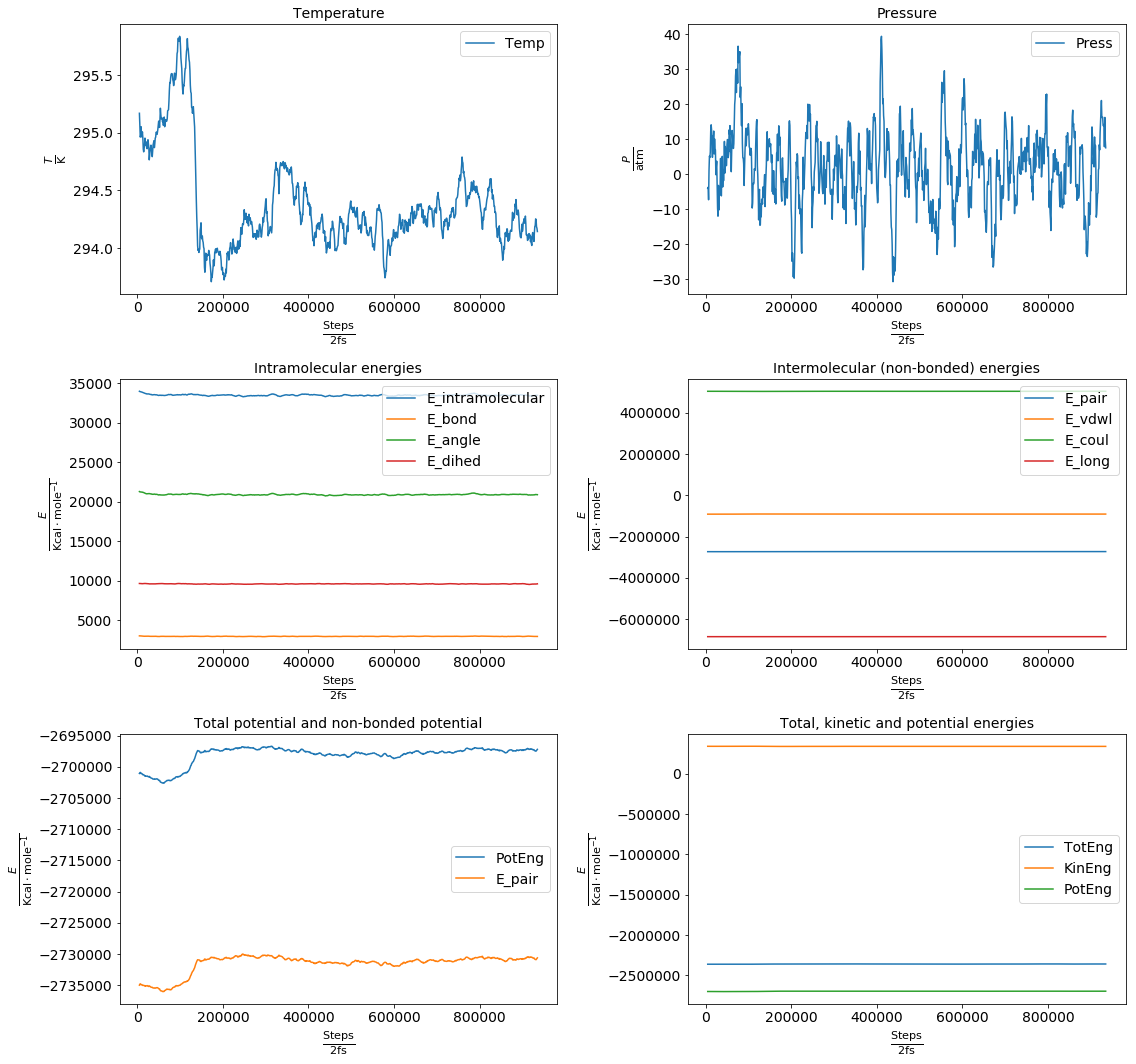

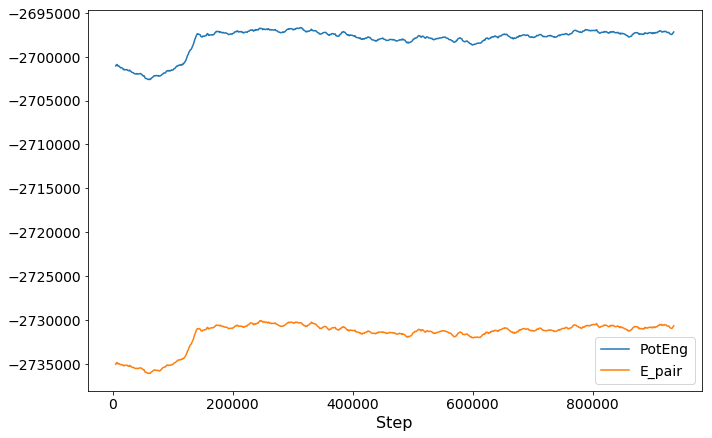

In [476]:
thermo_df = postprocessing.evaluate_production();

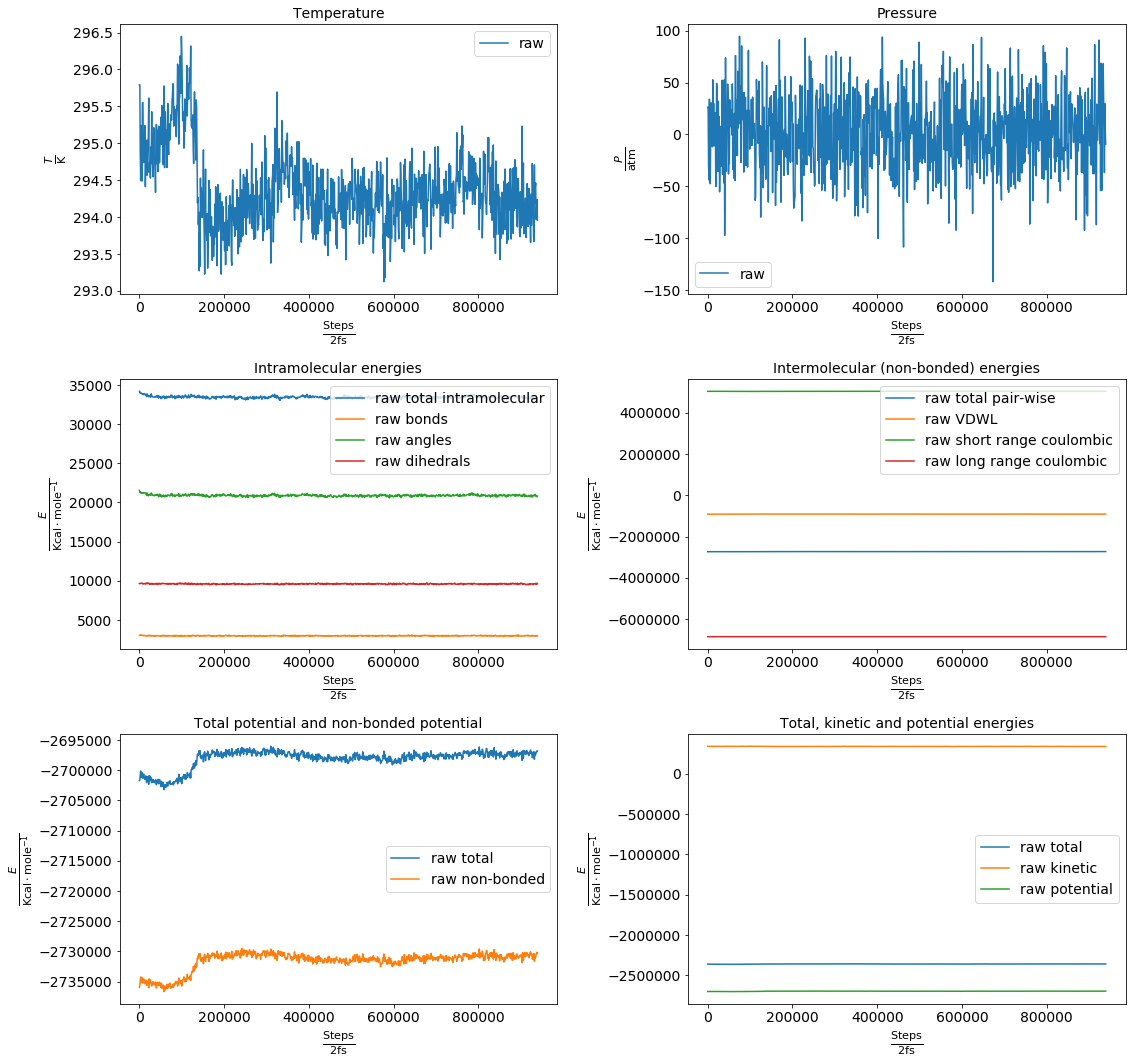

In [555]:
fig, axes = postprocessing.makeThermoPlotsFromDataFrame(
    thermo_df, legend_prefix = 'raw');

In [556]:
fig, axes = postprocessing.makeThermoPlotsFromDataFrame(
    thermo_df, fig = fig, axes = axes, window=50, 
    legend_prefix='ave');

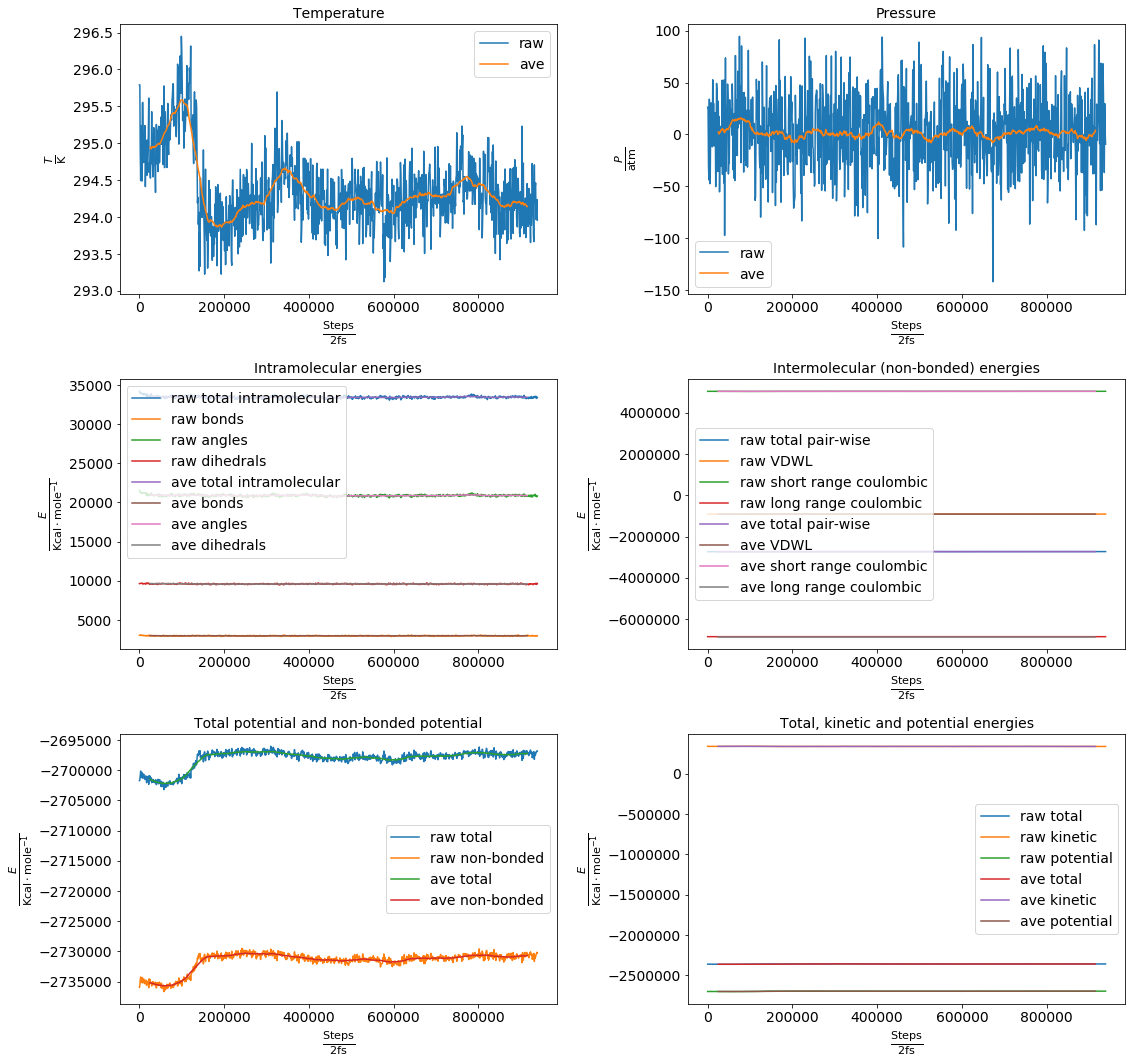

In [558]:
fig

## Group - Group interactions

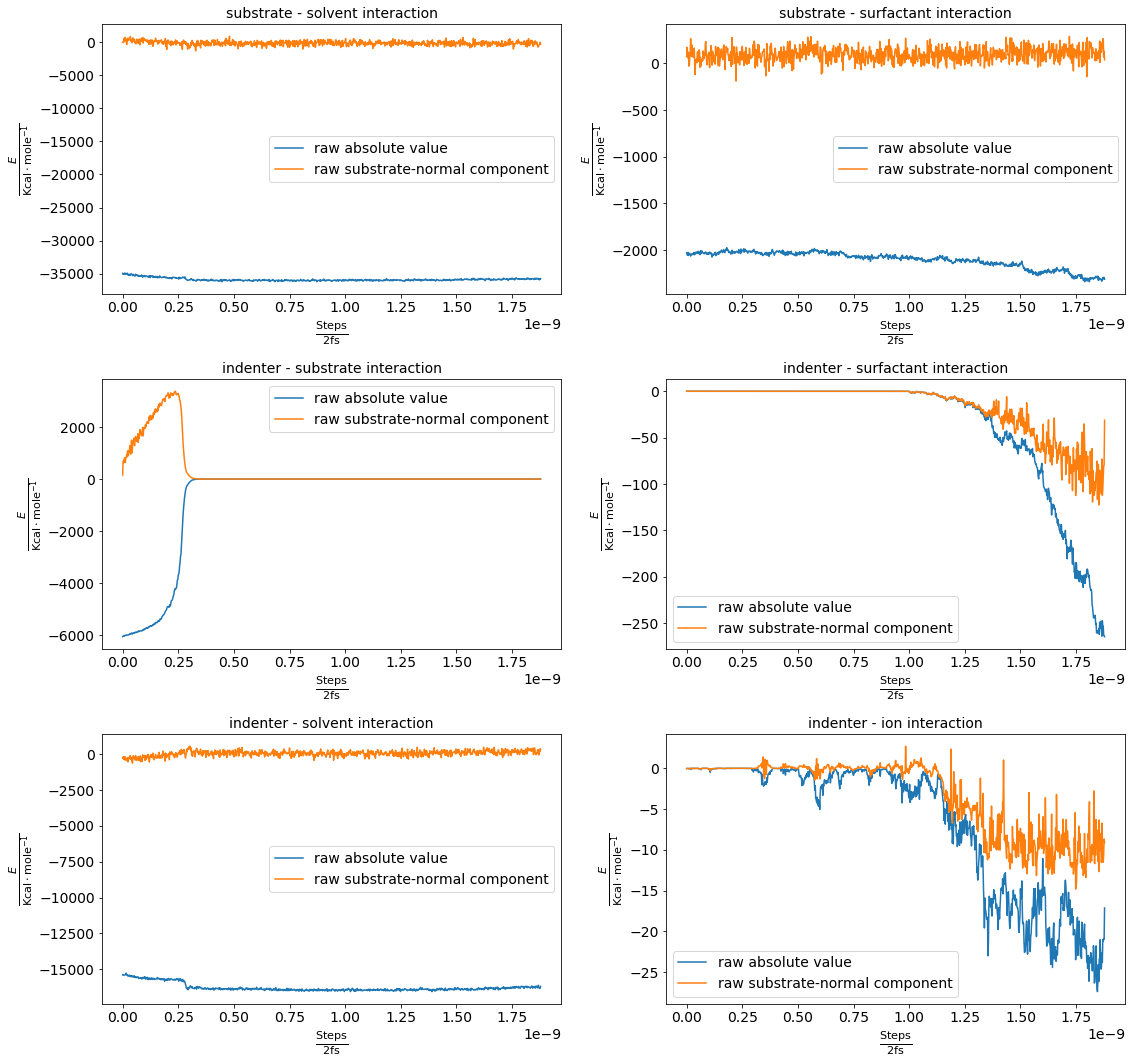

In [584]:
fig, axes = postprocessing.makeGroupGroupInteractionsPlot(thermo_df,legend_prefix='raw')

In [585]:
fig, axes = postprocessing.makeGroupGroupInteractionsPlot(
    thermo_df,legend_prefix='ave', window=50,
    fig = fig, axes = axes)

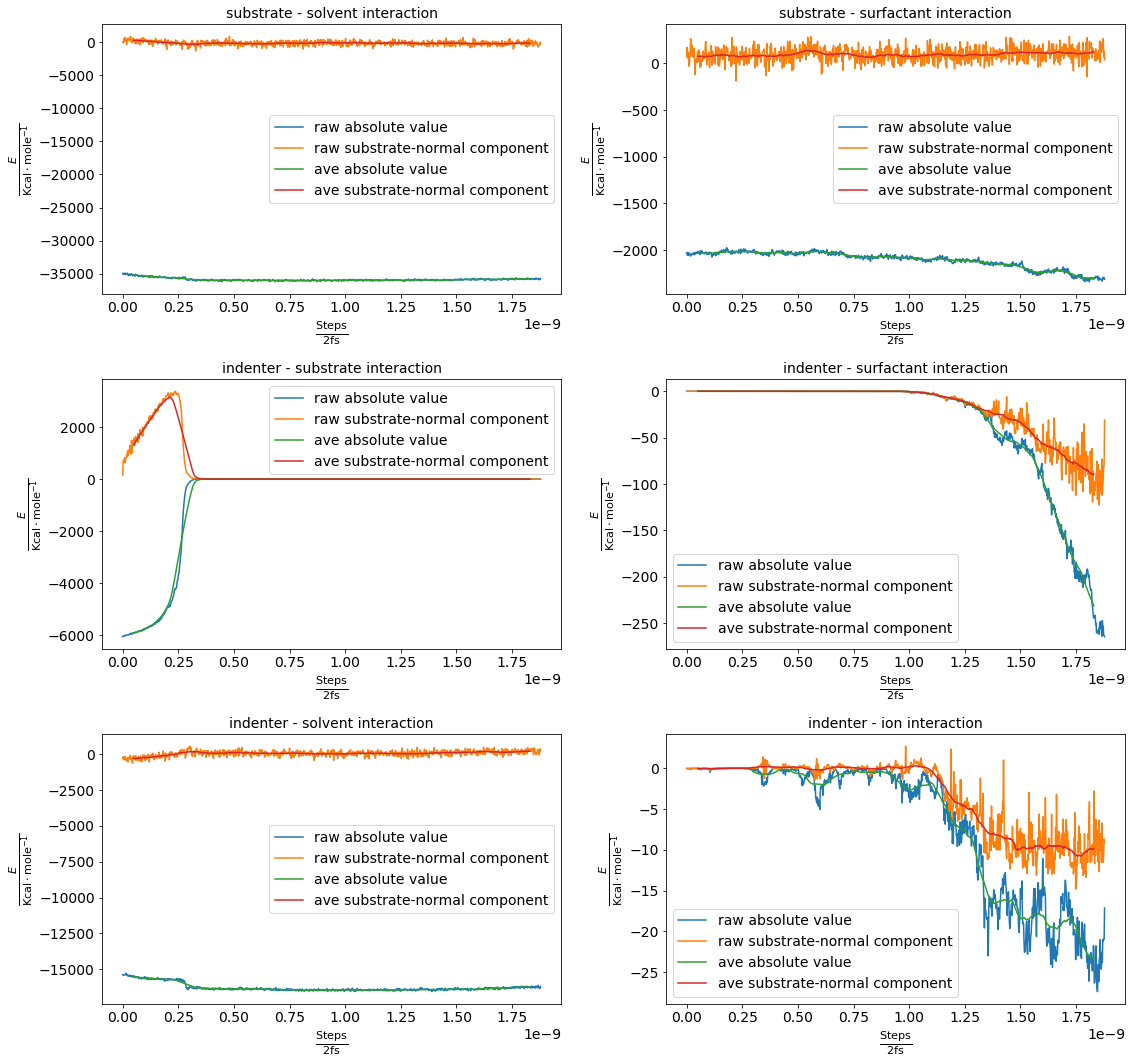

In [586]:
fig

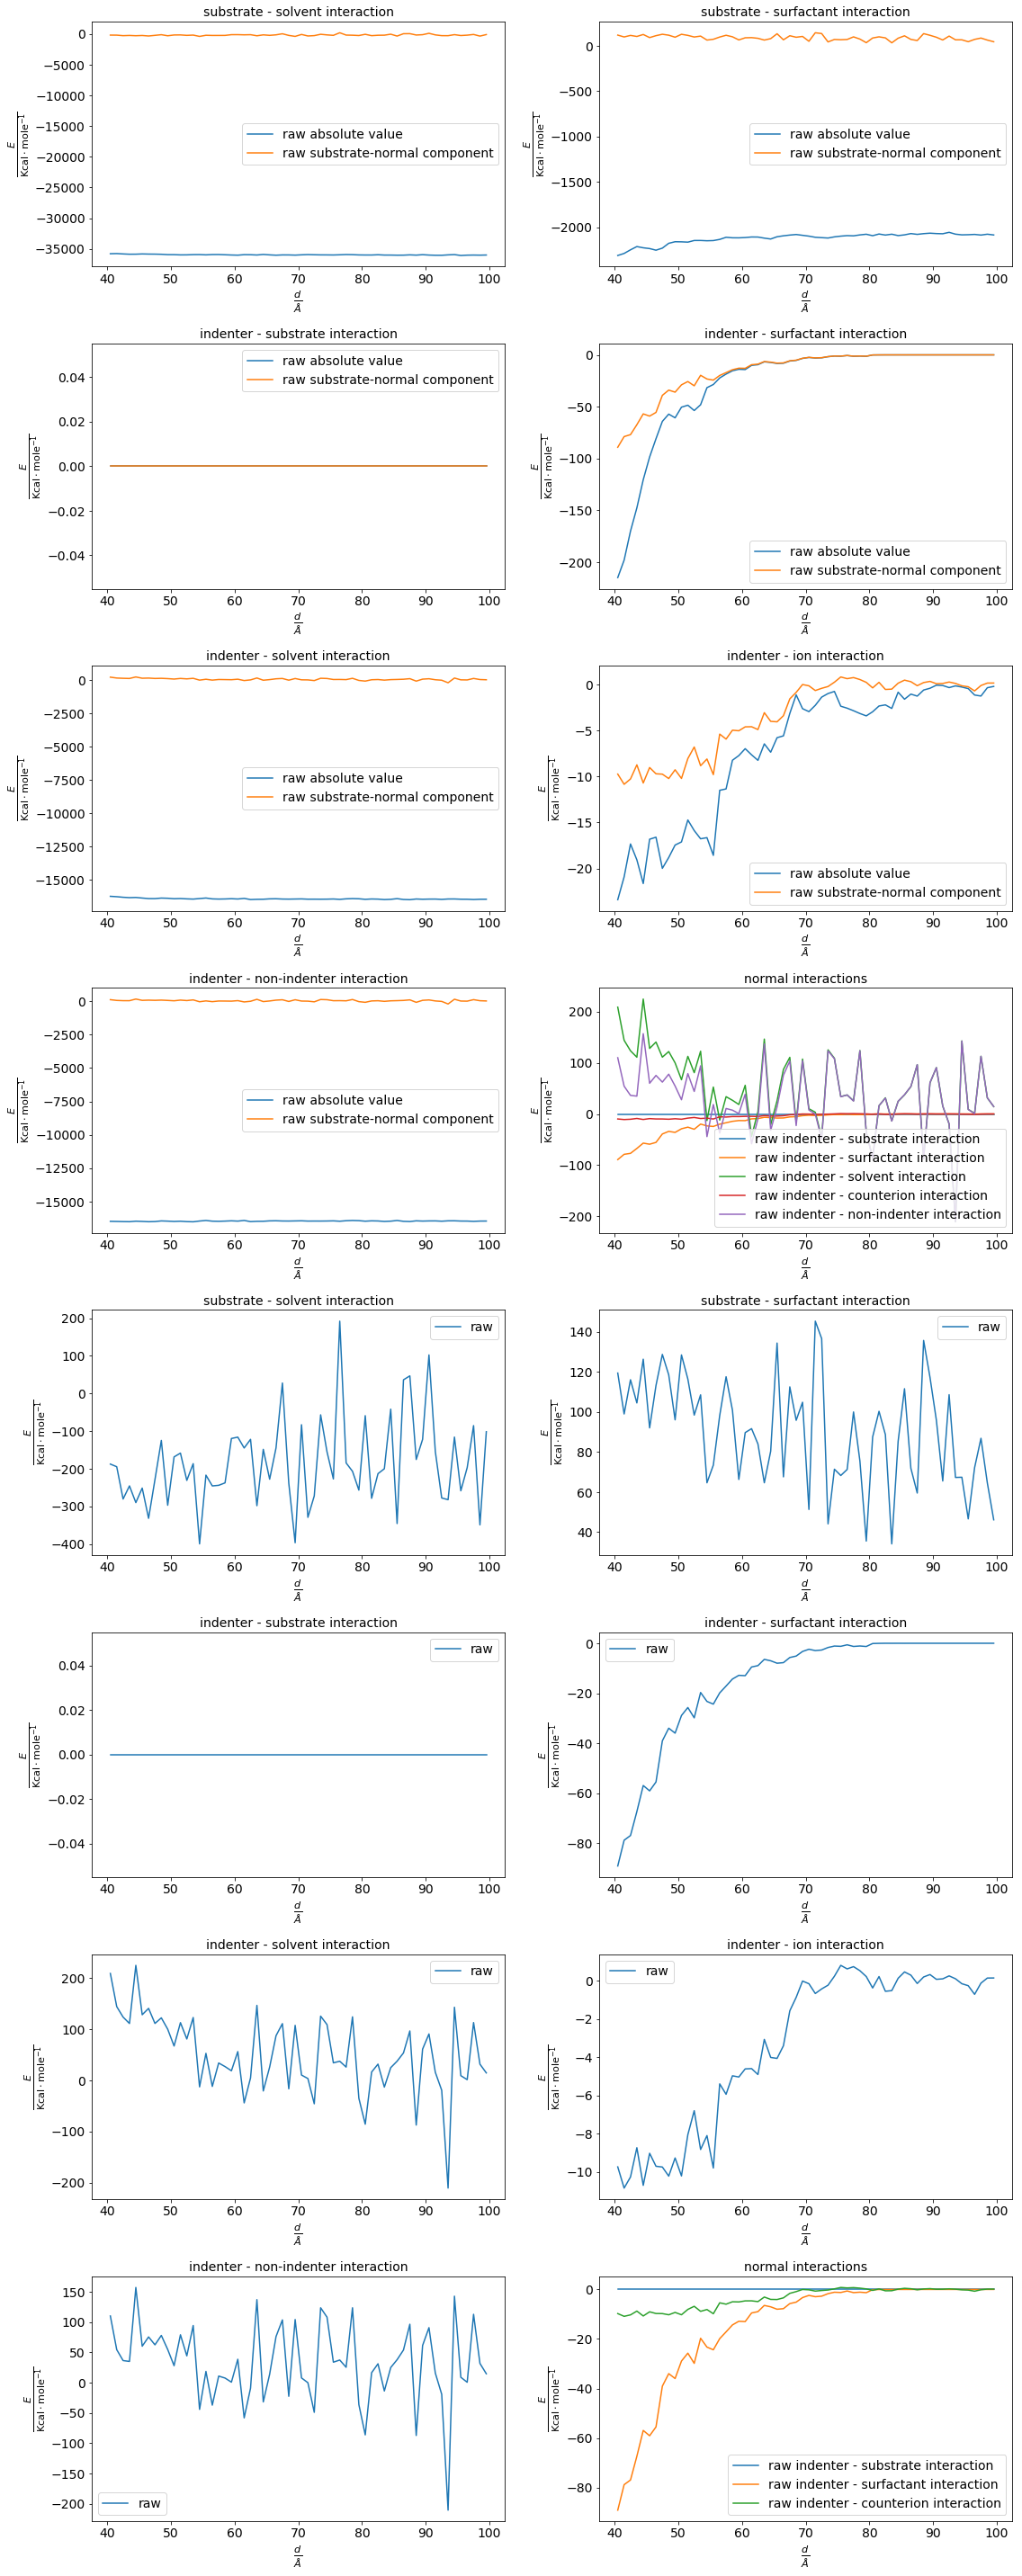

In [591]:
fig, axes = postprocessing.makeGroupGroupInteractionsByDistPlot(
    thermo_df, colvars_traj_df, pmf_df, legend_prefix = 'raw');

In [592]:
fig, axes = postprocessing.makeGroupGroupInteractionsByDistPlot(
    thermo_df, colvars_traj_df, pmf_df, legend_prefix = 'ave', window=5,
    fig = fig, axes = axes );

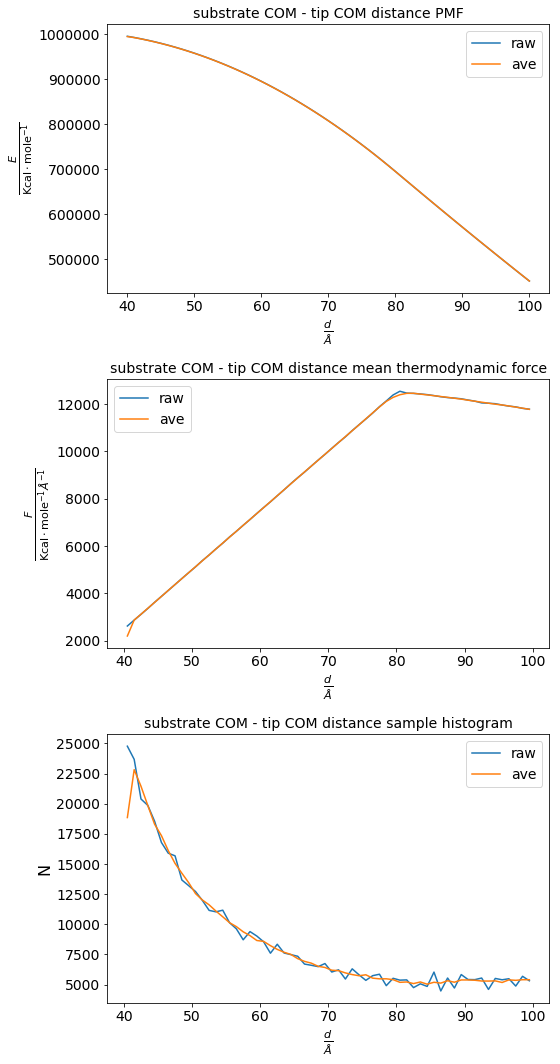

In [662]:
fig

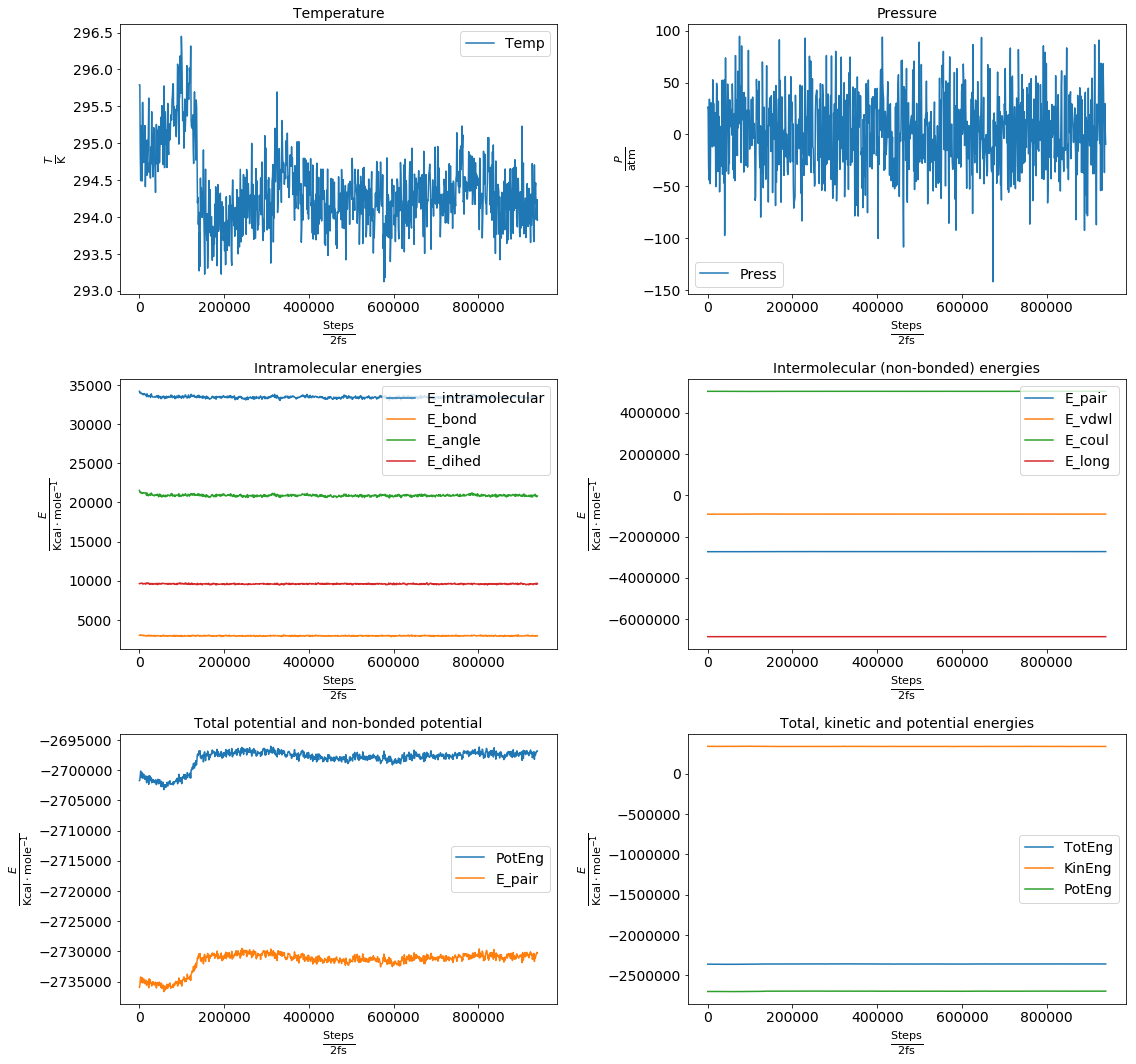

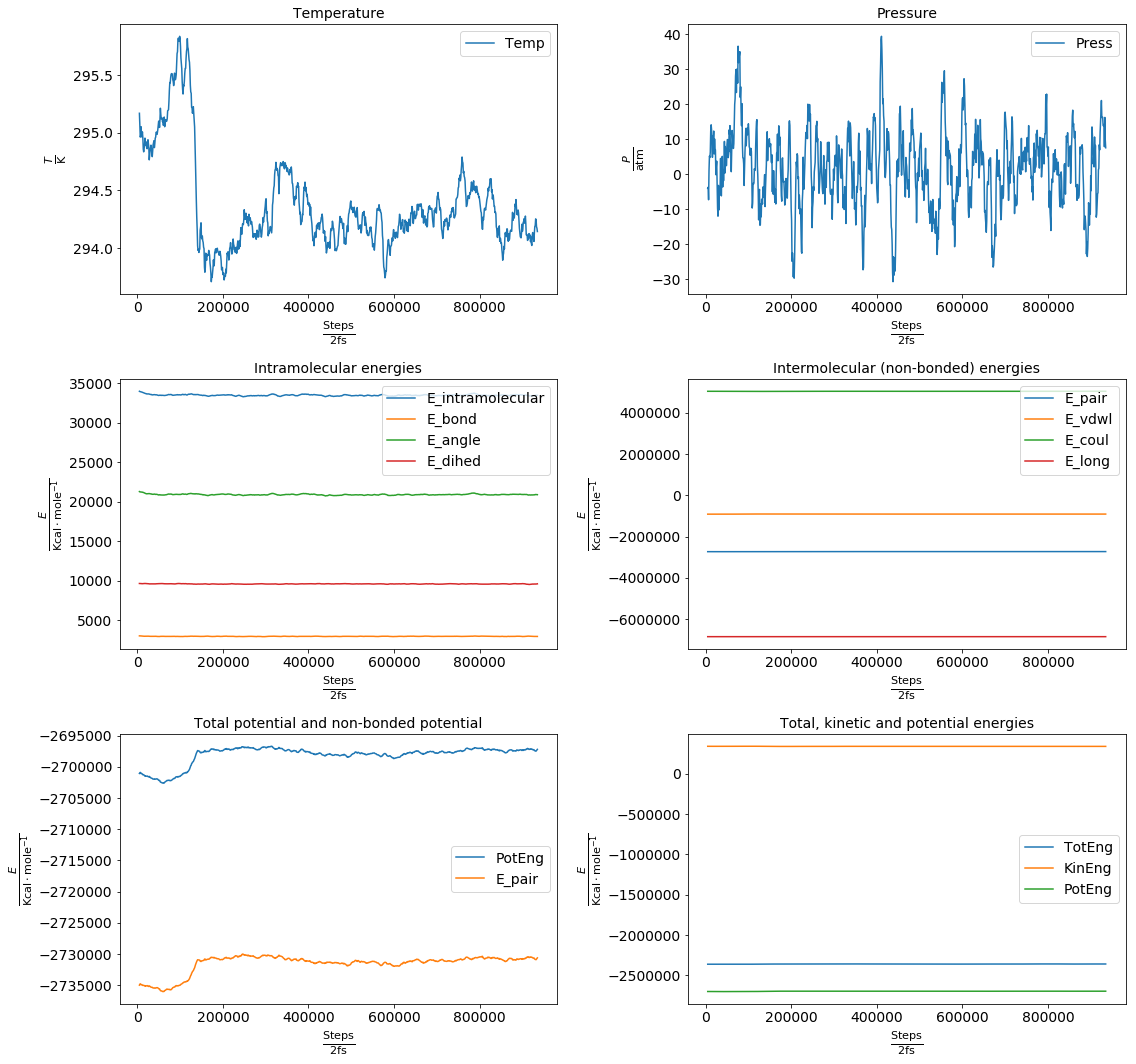

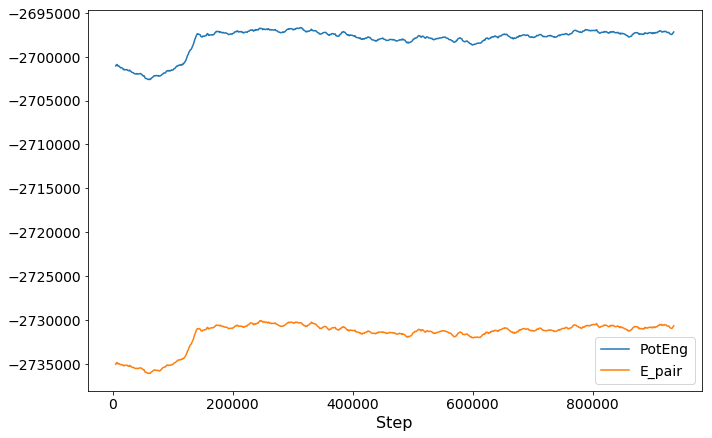

In [139]:
thermo_df = postprocessing.evaluate_production();

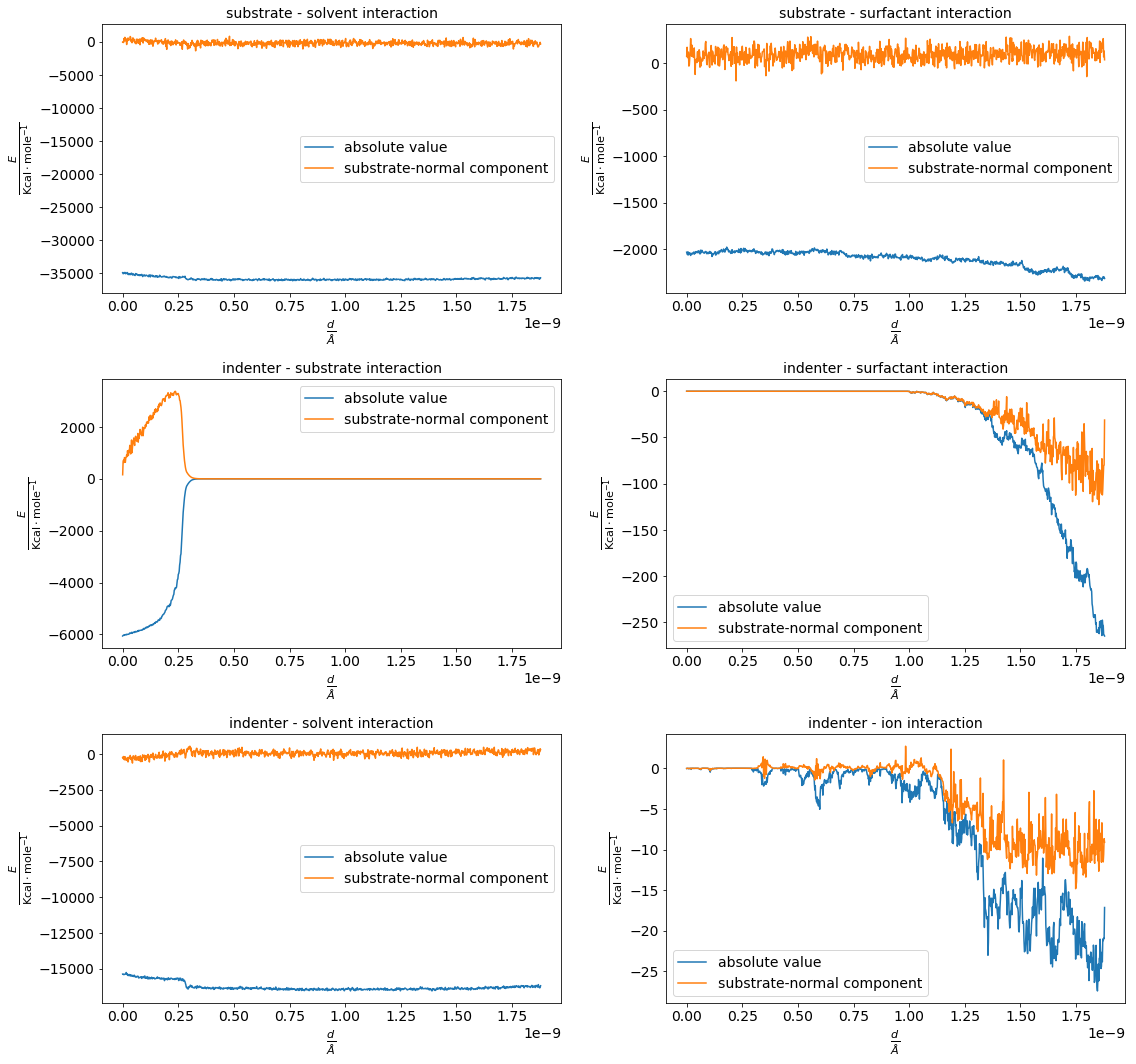

In [142]:
postprocessing.evaluate_group_group_interactions(thermo_df);

In [15]:
for dirname, dirnames, filenames in os.walk('.'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print(os.path.join(dirname, filename))

    # Advanced usage:
    # editing the 'dirnames' list will stop os.walk() from recursing into there.
    if '.git' in dirnames:
        # don't go into any .git directories.
        dirnames.remove('.git')

./1298_CTAB_on_AU_111_63x36x2_cylinders_with_counterion
./1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped
./1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion_50Ang_stepped
./1010_CTAB_on_AU_111_63x36x2_bilayer_with_counterion_50Ang_stepped
./1298_CTAB_on_AU_111_63x36x2_monolayer_with_counterion
./515_CTAB_on_AU_111_63x36x2_bilayer_with_counterion
./653_CTAB_on_AU_111_63x36x2_inverse_monolayer_with_counterion
./367_CTAB_on_AU_111_63x36x2_cylinders_with_counterion
./1010_CTAB_on_AU_111_63x36x2_monolayer_with_counterion
./653_CTAB_on_AU_111_63x36x2_cylinders_with_counterion
./415_CTAB_on_AU_111_63x36x2_inverse_monolayer_with_counterion
./415_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped
./653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped
./1010_CTAB_on_AU_111_63x36x2_inverse_monolayer_with_counterion
./367_CTAB_on_AU_111_63x36x2_monolayer_with_counterion
./1298_CTAB_on_AU_111_63x36x2_bilayer_with_counterion
./653_CTAB_on_AU_1

In [111]:
!cat  653_CTAB_on_AU_111_63x36x2_hemicylinders_with_counterion_50Ang_stepped.indenter_pulled.ti.pmf

#       xi            A(xi)
        20       997560.15932667
        21       997560.15932667
        22       997560.15932667
        23       997560.15932667
        24       997560.15932667
        25       997560.15932667
        26       997560.15932667
        27       997560.15932667
        28       997560.15932667
        29       997560.15932667
        30       997560.15932667
        31       997560.15932667
        32       997560.15932667
        33       997560.15932667
        34       997560.15932667
        35       997560.15932667
        36       997560.15932667
        37       997560.15932667
        38       997560.15932667
        39       997560.15932667
        40       995166.05066242
        41        992543.4926676
        42       989671.05778106
        43       986554.80492018
        44       983190.35200818
        45       979565.30376182
        46       975691.27294107
        47       971567.58012446
        48       967192.38019571
        49     

## netcdf evaluation

### Forces

$ [F_{LMP}] = \frac{ \mathrm{kcal}}{ \mathrm{mol} \cdot \mathrm{\mathring{A}}} $

$ [F_{PLT}] = \mathrm{nm}$

$ \mathrm{kcal} = 4.184 \mathrm{kJ} = 4.184 \cdot 10^{3} \mathrm{J}$

$ J = N \cdot m$

$ N = J m^{-1} = \frac{ \mathrm{kcal}}{ 4.184 \cdot 10^3 \mathrm{m} }
    = \frac{ \mathrm{kcal}}{ 4.184 \cdot 10^{13} \mathrm{\mathring{A}} }$
    
$ [F_{PLT}] = \mathrm{nN} 
    = \frac{ 10^9 \cdot N_A^{-1}}{ 4.184 \cdot 10^{13} } 
        \frac{\mathrm{kcal}}{\mathrm{mol} \cdot \mathrm{\mathring{A}}}
    = \frac{ 10^{-4} \cdot N_A^{-1}}{ 4.184 } [F_{LMP}]
    = 0.239 \cdot 10^{-4} N_A^{-1} [F_{LMP}] $

In [314]:
system_names

['646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_50Ang_stepped',
 '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped']

In [159]:
system_name

'646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped'

In [163]:
production_absolute_prefix = os.sep.join((
    system_absolute_prefix_dict[system_name],
    production_dict[500000]))

In [164]:
production_absolute_prefix

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped/production_500000'

In [165]:
netcdf_glob_pattern = os.sep.join((
    production_absolute_prefix, '*.nc'))

In [475]:
netcdf_glob_pattern

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped/production_500000/*.nc'

In [167]:
netcdf = glob(netcdf_glob_pattern)[0]

In [282]:
netcdf

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201810/sys/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped/production_500000/646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_50Ang_stepped_production_mixed.nc'

In [239]:
postprocessing.sds_t2n_array

array([ 0,  1,  1,  6,  6,  8,  8, 16,  1,  8, 11, 79], dtype=uint64)

In [240]:
tmp_traj = NetCDFTrajectory(
    netcdf, 'r', 
    types_to_numbers = list( postprocessing.sds_t2n_array ),
                        keep_open=True )

In [241]:
len(tmp_traj)

551

In [287]:
f1 = tmp_traj[0]

In [286]:
f2 = tmp_traj[-1]

### select groups

In [290]:
solid_selection = (
    f.get_atomic_numbers() == ase.data.atomic_numbers['Au'])

In [293]:
indenter_selection = (
    solid_selection & (f.get_positions()[:,2] > 20) )

In [300]:
np.count_nonzero(indenter_selection)

3541

In [301]:
tmp_traj[0][ indenter_selection ]

Atoms(symbols='Au3541', pbc=True, cell=[147.53766532813174, 150.29686998263395, 169.97117870911075], f_storeAnteSHAKEForces=..., f_storeAnteSHAKEForcesAve=..., f_storeAnteStatForces=..., f_storeAnteStatForcesAve=..., f_storeUnconstrainedForces=..., f_storeUnconstrainedForcesAve=..., forces=..., masses=..., mol=...)

In [302]:
tmp_traj[-1][ indenter_selection]

Atoms(symbols='Au3541', pbc=True, cell=[146.28029880699086, 147.31903563329237, 174.42972818989477], f_storeAnteSHAKEForces=..., f_storeAnteSHAKEForcesAve=..., f_storeAnteStatForces=..., f_storeAnteStatForcesAve=..., f_storeUnconstrainedForces=..., f_storeUnconstrainedForcesAve=..., forces=..., masses=..., mol=...)

In [306]:
len(tmp_traj[0][ solid_selection ]) # 21901

21901

In [307]:
len(tmp_traj[0][ indenter_selection ]) # 3541

3541

In [308]:
tmp_traj[0][ indenter_selection ].get_positions().max(axis=0)

array([ 125.9885788 ,  127.94010925,  153.44935608])

In [309]:
for key in force_keys:
    force_sum_dict[key] = f_indenter.arrays[key].sum(axis=0)

In [273]:
force_keys = [
    'forces', 
    'f_storeAnteSHAKEForces', 
    'f_storeAnteStatForces', 
    'f_storeUnconstrainedForces', 
    'f_storeAnteSHAKEForcesAve', 
    'f_storeAnteStatForcesAve', 
    'f_storeUnconstrainedForcesAve' ]

In [310]:
force_sum_dict = { key: [] for key in force_keys }

In [ ]:
df = pd.DataFrame()

In [361]:
tmp_traj[100][indenter_selection].arrays.keys()

dict_keys(['numbers', 'positions', 'masses', 'mol', 'forces', 'f_storeAnteSHAKEForces', 'f_storeAnteStatForces', 'f_storeUnconstrainedForces', 'f_storeAnteSHAKEForcesAve', 'f_storeAnteStatForcesAve', 'f_storeUnconstrainedForcesAve'])

In [351]:
# sum forces on all indenter atoms for all frames
indenter_force_sum_dict = { key: [] for key in force_keys }
nonindenter_force_sum_dict = { key: [] for key in force_keys }
for key in force_keys:    
    indenter_force_sum_dict[key] = np.array(
        [ f[indenter_selection].arrays[key].sum(axis=0) 
             for f in tmp_traj ] )
    nonindenter_force_sum_dict[key] = np.array(
        [ f[~indenter_selection].arrays[key].sum(axis=0) 
             for f in tmp_traj ] )

In [352]:
data_prefix = '/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants/data/forces'

In [353]:
indenter_force_z_sum_dict = { key: value[:,2] for key, value 
                        in indenter_force_sum_dict.items() }

In [354]:
nonindenter_force_z_sum_dict = { key: value[:,2] for key, value 
                        in nonindenter_force_sum_dict.items() }

In [355]:
indenter_force_z_sum_df = pd.DataFrame.from_dict(indenter_force_z_sum_dict, dtype=float)

In [356]:
nonindenter_force_z_sum_df = pd.DataFrame.from_dict(nonindenter_force_z_sum_dict, dtype=float)

In [398]:
production_steps = 500000

In [399]:
production_dict[production_steps]

'production_500000'

In [400]:
system_prefix = system_name + '_' + production_dict[production_steps]

In [389]:
indenter_z_forces_json_name = system_prefix + '_indenter_z_forces.json'

In [391]:
nonindenter_z_forces_json_name = system_prefix + '_nonindenter_z_forces.json'

In [382]:
# indenter_z_forces_csv_name = system_name + '_' + production_dict[500000] + '_indenter_z_forces.csv'

In [386]:
indenter_force_z_sum_df.to_json(
    os.sep.join((data_prefix, indenter_z_forces_json_name)),  orient='index')

In [392]:
nonindenter_force_z_sum_df.to_json(
    os.sep.join((data_prefix, nonindenter_z_forces_json_name)),  orient='index')

In [404]:
pmf_df = df_dict[system_name][production_steps]['ti.pmf']

In [407]:
colvars_traj_df = df_dict[system_name][production_steps]['colvars']

In [416]:
thermo_df = df_dict[system_name][production_steps]['thermo']

In [450]:
# initial apex position at frame 0:
apex_z0 = tmp_traj[0][indenter_selection].get_positions()[:,2].min()

In [453]:
# initial substrate surface position at frame 0:
surface_z0 = tmp_traj[0][solid_selection & ~indenter_selection].get_positions()[:,2].max()

In [454]:
extents_dist_0 = apex_z0 - surface_z0

In [456]:
extents_dist_0

98.177323341369629

In [461]:
com_com_dist_0 = colvars_traj_df.loc[0,'com_com_dist_z']

In [462]:
com_com_dist_0

127.232566602432

In [463]:
dist_offset = com_com_dist_0 - extents_dist_0

In [464]:
dist_offset

29.055243261062373

In [406]:
df_dict[system_name][production_steps].keys()

dict_keys(['colvars', 'ti.pmf', 'ti.grad', 'ti.count', 'thermo'])

In [420]:
len(thermo_df.index)

55001

In [429]:
thermo_df.index

Int64Index([     0,     10,     20,     30,     40,     50,     60,     70,
                80,     90,
            ...
            549910, 549920, 549930, 549940, 549950, 549960, 549970, 549980,
            549990, 550000],
           dtype='int64', name='Step', length=55001)

In [428]:
len(colvars_traj_df)

550001

In [421]:
colvar_freq = 1 # every step

In [422]:
netcdf_freq = 1e-3 # every 1000 steps

In [434]:
indenter_force_z_sum_df.set_index(
    (indenter_force_z_sum_df.index/netcdf_freq*colvar_freq).astype(int),
    inplace=True )

In [438]:
colvars_traj_df_dist_column = "com_com_dist_z"

In [440]:
#colvars_traj_df[colvars_traj_df_dist_column]

In [468]:
d_interval = slice(25,80)

(<matplotlib.figure.Figure at 0x7f4517d807b8>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f4517969c88>])

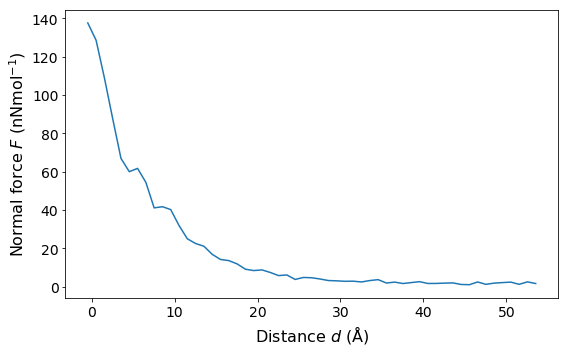

In [812]:
postprocessing.makeVariableByDistPlot(
    indenter_force_z_sum_df[['f_storeUnconstrainedForcesAve']]*force_conversion_factor, 
    colvars_traj_df, pmf_df,
    x_offset = dist_offset,
    interval=d_interval, window=1,
    x_label=r'Distance $ d \ \left( \mathrm{\AA} \right)$',
    y_label=r'Normal force $ F \ \left( \mathrm{nN} \mathrm{mol}^{-1} \right)$')

In [445]:
indenter_force_z_sum_df

f_storeAnteSHAKEForces  f_storeAnteSHAKEForcesAve  \
0                          0.0                        0.0   
1000                       0.0                        0.0   
2000                       0.0                        0.0   
3000                       0.0                        0.0   
4000                       0.0                        0.0   
5000                       0.0                        0.0   
6000                       0.0                        0.0   
7000                       0.0                        0.0   
8000                       0.0                        0.0   
9000                       0.0                        0.0   
10000                      0.0                        0.0   
11000                      0.0                        0.0   
12000                      0.0                        0.0   
13000                      0.0                        0.0   
14000                      0.0                        0.0   
15000                      0.0                        0.0   
16000                      0.0                        0.0   
17000                      0.0                        0.0   
18000                      0.0                        0.0   
19000                      0.0                        0.0   
20000                      0.0                        0.0   
21000                      0.0                        0.0   
22000                      0.0                        0.0   
23000                      0.0                        0.0   
24000                      0.0                        0.0   
25000                      0.0                        0.0   
26000                      0.0                        0.0   
27000                      0.0                        0.0   
28000                      0.0                        0.0   
29000                      0.0                        0.0   
...                        ...                        ...   
521000                     0.0                        0.0   
522000                     0.0                        0.0   
523000                     0.0                        0.0   
524000                     0.0                        0.0   
525000                     0.0                        0.0   
526000                     0.0                        0.0   
527000                     0.0                        0.0   
528000                     0.0                        0.0   
529000                     0.0                        0.0   
530000                     0.0                        0.0   
531000                     0.0                        0.0   
532000                     0.0                        0.0   
533000                     0.0                        0.0   
534000                     0.0                        0.0   
535000                     0.0                        0.0   
536000                     0.0                        0.0   
537000                     0.0                        0.0   
538000                     0.0                        0.0   
539000                     0.0                        0.0   
540000                     0.0                        0.0   
541000                     0.0                        0.0   
542000                     0.0                        0.0   
543000                     0.0                        0.0   
544000                     0.0                        0.0   
545000                     0.0                        0.0   
546000                     0.0                        0.0   
547000                     0.0                        0.0   
548000                     0.0                        0.0   
549000                     0.0                        0.0   
550000                     0.0                        0.0   

        f_storeAnteStatForces  f_storeAnteStatForcesAve  \
0                         0.0                       0.0   
1000                      0.0                       0.0   
2000                      0.0                   

In [366]:
interval = slice(100,400)

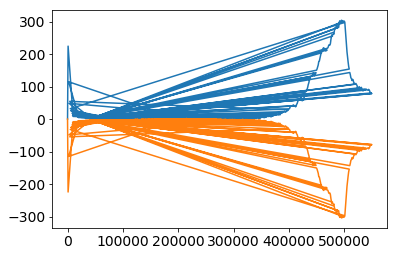

In [813]:
plt.plot(indenter_force_z_sum_df['f_storeUnconstrainedForcesAve']*force_conversion_factor)
plt.plot(nonindenter_force_z_sum_df['f_storeUnconstrainedForcesAve']*force_conversion_factor)

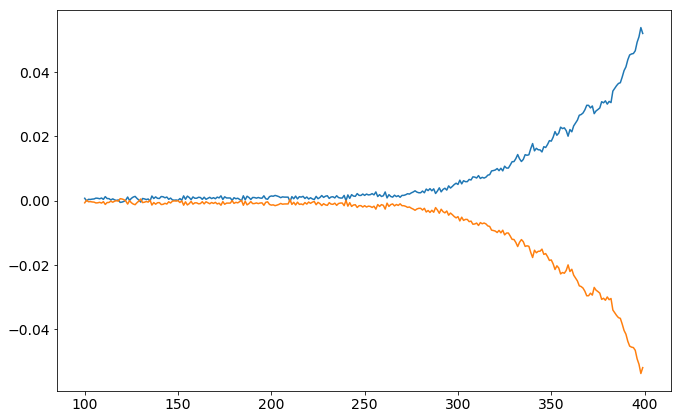

In [367]:
plt.plot(indenter_force_z_sum_df['f_storeUnconstrainedForcesAve'][interval]*force_conversion_factor_per_mole)
plt.plot(nonindenter_force_z_sum_df['f_storeUnconstrainedForcesAve'][interval]*force_conversion_factor_per_mole)

In [ ]:
'f_storeAnteSHAKEForcesAve', 
'f_storeAnteStatForcesAve', 
'f_storeUnconstrainedForcesAve' 

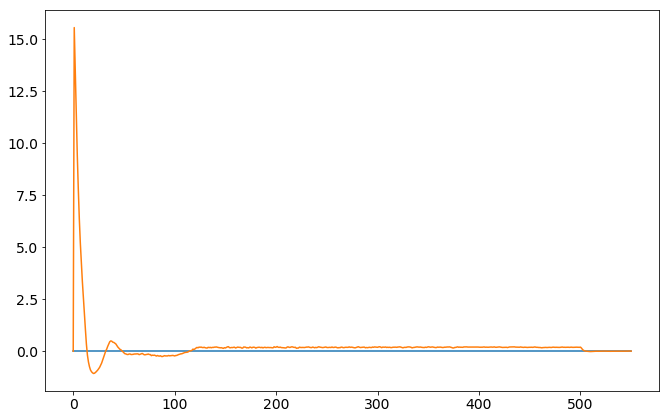

In [362]:
plt.plot(indenter_force_z_sum_df['f_storeAnteStatForcesAve']*force_conversion_factor_per_mole)
plt.plot(nonindenter_force_z_sum_df['f_storeAnteStatForcesAve']*force_conversion_factor_per_mole)

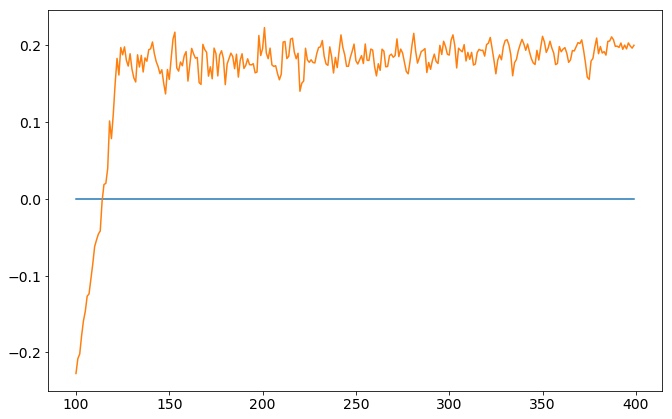

In [368]:
plt.plot(indenter_force_z_sum_df['f_storeAnteStatForcesAve'][interval]*force_conversion_factor_per_mole)
plt.plot(nonindenter_force_z_sum_df['f_storeAnteStatForcesAve'][interval]*force_conversion_factor_per_mole)

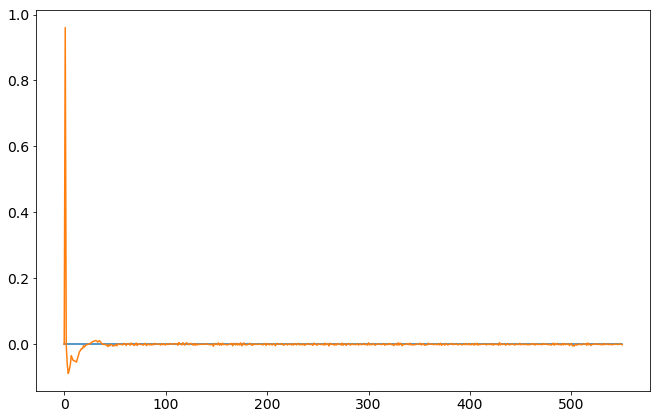

In [369]:
plt.plot(indenter_force_z_sum_df['f_storeAnteSHAKEForcesAve']*force_conversion_factor_per_mole)
plt.plot(nonindenter_force_z_sum_df['f_storeAnteSHAKEForcesAve']*force_conversion_factor_per_mole)

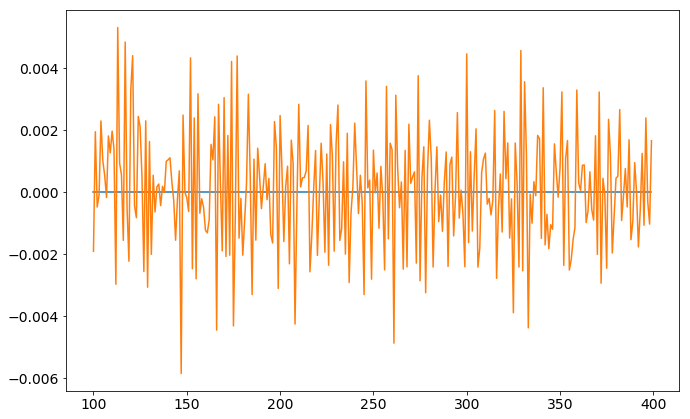

In [370]:
plt.plot(indenter_force_z_sum_df['f_storeAnteSHAKEForcesAve'][interval]*force_conversion_factor_per_mole)
plt.plot(nonindenter_force_z_sum_df['f_storeAnteSHAKEForcesAve'][interval]*force_conversion_factor_per_mole)

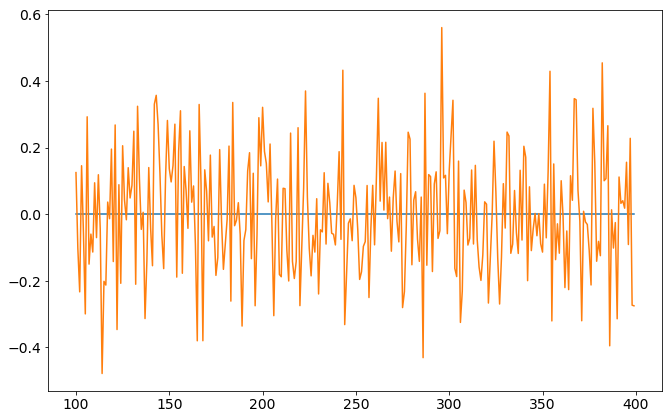

In [371]:
plt.plot(indenter_force_z_sum_df['forces'][interval]*force_conversion_factor_per_mole)
plt.plot(nonindenter_force_z_sum_df['forces'][interval]*force_conversion_factor_per_mole)

In [331]:
force_sum_dict['f_storeUnconstrainedForcesAve'][:,2]

551

In [ ]:
# 3541 in indenter, 18360 in substrate

In [264]:
f_indenter.arrays.keys()

dict_keys(['numbers', 'positions', 'masses', 'mol', 'forces', 'f_storeAnteSHAKEForces', 'f_storeAnteStatForces', 'f_storeUnconstrainedForces', 'f_storeAnteSHAKEForcesAve', 'f_storeAnteStatForcesAve', 'f_storeUnconstrainedForcesAve'])

In [279]:
force_sum_dict = {}

In [280]:
for key in force_keys:
    force_sum_dict[key] = f_indenter.arrays[key].sum(axis=0)

In [281]:
force_sum_dict

{'f_storeAnteSHAKEForces': masked_array(data = [0.0 0.0 0.0],
              mask = [False False False],
        fill_value = 1e+20),
 'f_storeAnteSHAKEForcesAve': masked_array(data = [0.0 0.0 0.0],
              mask = [False False False],
        fill_value = 1e+20),
 'f_storeAnteStatForces': masked_array(data = [0.0 0.0 0.0],
              mask = [False False False],
        fill_value = 1e+20),
 'f_storeAnteStatForcesAve': masked_array(data = [0.0 0.0 0.0],
              mask = [False False False],
        fill_value = 1e+20),
 'f_storeUnconstrainedForces': masked_array(data = [-18.106060028076172 -35.41413497924805 73.9581298828125],
              mask = [False False False],
        fill_value = 1e+20),
 'f_storeUnconstrainedForcesAve': masked_array(data = [0.0 0.0 0.0],
              mask = [False False False],
        fill_value = 1e+20),
 'forces': masked_array(data = [0.0 0.0 0.0],
              mask = [False False False],
        fill_value = 1e+20)}

In [180]:
NetCDFTrajectory?

In [181]:
traj = ase.io.read(netcdf,index=0,format='netcdftrajectory')

ValueError: File format not recognized: netcdftrajectory

In [182]:
ase.__version__

'3.15.0'

In [491]:
data_df

NameError: name 'data_df' is not defined